In [65]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore")
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import resample
from sklearn.impute import KNNImputer
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier, HistGradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [67]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic' # ÏòàÏãú: ÎßëÏùÄ Í≥†ÎîïÏúºÎ°ú ÏÑ§Ï†ï (Windows ÌôòÍ≤Ω Ïãú)
plt.rcParams['axes.unicode_minus'] = False

In [13]:
data = pd.read_csv("C:/semi_project/health_checkup/JDM/ÏÑ†ÌÉùÏª¨Îüº_Í±¥Í∞ïÎç∞Ïù¥ÌÑ∞.csv") # ÎãπÎá® ÏπòÎ£å

In [66]:
data = pd.read_csv("C:/semi_project/health_checkup/JDM/2022ÎÖÑ~2023ÎÖÑ/Í±¥Í∞ïÎç∞Ïù¥ÌÑ∞_2022_2023_Ìï©Î≥∏.csv")

EDA

In [4]:
data.head()

ID    year  region  town_t  sex   age  incm  ho_incm  edu  occp  \
0  YA01220302  2022.0     1.0     1.0  2.0  56.0   3.0      4.0  3.0   7.0   
1  YA01220303  2022.0     1.0     1.0  1.0  30.0   3.0      4.0  4.0   3.0   
2  YA01220304  2022.0     1.0     1.0  2.0  25.0   3.0      4.0  4.0   7.0   
3  YA01236501  2022.0     1.0     1.0  1.0  66.0   3.0      3.0  4.0   7.0   
4  YA01236502  2022.0     1.0     1.0  2.0  62.0   3.0      3.0  3.0   6.0   

   cfam  genertn  D_1_1  DI1_dg  DI1_ag  DI1_pr  DI1_pt  DI1_2  DI2_dg  \
0   4.0      4.0    3.0     1.0    48.0     1.0     1.0    1.0     0.0   
1   4.0      4.0    2.0     0.0   888.0     8.0     8.0    8.0     0.0   
2   4.0      4.0    2.0     0.0   888.0     8.0     8.0    8.0     0.0   
3   2.0      2.0    2.0     0.0   888.0     8.0     8.0    8.0     1.0   
4   2.0      2.0    2.0     0.0   888.0     8.0     8.0    8.0     1.0   

   DI2_ag  DI2_pr  DI2_pt  DI2_2  DE1_dg  DE1_ag  DE1_pr  DE1_pt  DE1_3  \
0   888.0     8.0     8.0    8.0     0.0   888.0     8.0     8.0    8.0   
1   888.0     8.0     8.0    8.0     0.0   888.0     8.0     8.0    8.0   
2   888.0     8.0     8.0    8.0     0.0   888.0     8.0     8.0    8.0   
3    56.0     1.0     1.0    1.0     0.0   888.0     8.0     8.0    8.0   
4    53.0     1.0     1.0    1.0     0.0   888.0     8.0     8.0    8.0   

   DE1_31  DE1_32  DE1_33  DE1_34  DE1_4  DN1_dg  DN1_ag  BH1  BO1  BO1_1  \
0     8.0     8.0     8.0     8.0    8.0     0.0   888.0  1.0  4.0    1.0   
1     8.0     8.0     8.0     8.0    8.0     0.0   888.0  1.0  4.0    3.0   
2     8.0     8.0     8.0     8.0    8.0     0.0   888.0  2.0  4.0    2.0   
3     8.0     8.0     8.0     8.0    8.0     0.0   888.0  1.0  3.0    1.0   
4     8.0     8.0     8.0     8.0    8.0     0.0   888.0  1.0  3.0    1.0   

   BO2_1  BD1  BD1_11  BD2_1  BP16_1  BP16_2  BP1  BP5  BS1_1  BS3_1  BS3_2  \
0    1.0  2.0     1.0    8.0     8.0    10.0  2.0  8.0    3.0    8.0  888.0   
1    1.0  2.0     3.0    2.0     7.0     7.0  3.0  8.0    3.0    8.0  888.0   
2    1.0  2.0     4.0    1.0     6.0     8.0  2.0  8.0    3.0    8.0  888.0   
3    2.0  2.0     3.0    2.0     9.0     9.0  4.0  8.0    2.0    3.0  888.0   
4    1.0  2.0     2.0    1.0     7.0     9.0  3.0  8.0    3.0    8.0  888.0   

   BS12_37  BS12_47  BS12_47_1  BS12_1  BS12_2  BE3_31  BE3_32  BE3_33  BE5_1  \
0      2.0      8.0      888.0     2.0     8.0     5.0     1.0    30.0    1.0   
1      2.0      8.0      888.0     2.0     8.0     8.0     3.0     0.0    6.0   
2      2.0      8.0      888.0     2.0     8.0     8.0     0.0    20.0    6.0   
3      2.0      8.0      888.0     2.0     8.0     8.0     1.0    30.0    1.0   
4      2.0      8.0      888.0     2.0     8.0     8.0     1.0     0.0    4.0   

    BE9  HE_fh  HE_HPfh1  HE_HPfh2  HE_HLfh1  HE_HLfh2  HE_DMfh1  HE_DMfh2  \
0  88.0    1.0       0.0       1.0       0.0       0.0       0.0       0.0   
1  88.0    1.0       1.0       1.0       1.0       0.0       1.0       0.0   
2  88.0    1.0       1.0       1.0       1.0       1.0       1.0       0.0   
3  88.0    1.0       0.0       1.0       0.0       0.0       0.0       0.0   
4  88.0    1.0       1.0       0.0       0.0       0.0       0.0       0.0   

   HE_sbp1  HE_dbp1  HE_sbp2  HE_dbp2  HE_HP  HE_ht  HE_wt  HE_wc     HE_BMI  \
0    135.0     90.0    138.0     89.0    4.0  151.2   60.6   84.3  26.507517   
1    145.0     77.0    128.0     78.0    3.0  174.1   82.3   86.2  27.152029   
2    103.0     64.0    104.0     63.0    1.0  166.4   59.0   69.4  21.308131   
3    116.0     80.0    120.0     78.0    2.0  168.7   67.1   83.5  23.577207   
4    145.0     89.0    131.0     87.0    3.0  157.1   53.9   77.5  21.839183   

   HE_obe  HE_glu  HE_HbA1c  HE_DM_HbA1c  HE_chol  HE_HDL_st2  HE_TG  \
0     4.0    94.0       5.6          1.0    199.0        56.0  181.0   
1     4.0    84.0       5.3          1.0    122.0        48.0   63.0   
2     2.0    87.0       5.0          1.0    202.0      

In [5]:
data.shape

(13194, 98)

- **BP1** : ÌèâÏÜå Ïä§Ìä∏Î†àÏä§ Ïù∏ÏßÄ Ï†ïÎèÑ  
- **BD1_11** : 1ÎÖÑÍ∞Ñ ÏùåÏ£ºÎπàÎèÑ  
- **BS3_2** : ÌïòÎ£®ÌèâÍ∑† ÏùºÎ∞òÎã¥Î∞∞(Í∂êÎ†®) Ìù°Ïó∞Îüâ  
- **BE5_1** : 1Ï£ºÏùºÍ∞Ñ Ïö¥Îèô ÌöåÏàò  

In [54]:
import pandas as pd

# ÎÇ®Í∏∞Í≥† Ïã∂ÏùÄ Ïª¨Îüº Î¶¨Ïä§Ìä∏
columns_to_keep = [
    'ID','year','age','sex','HE_ht', 'HE_wt', 'HE_wc', 'HE_BMI',
    'HE_sbp1', 'HE_dbp1',
    'HE_Upro', 'HE_glu', 'HE_chol', 'HE_HDL_st2',
    'HE_TG', 'HE_LDL_drct', 'HE_crea', 'HE_ast', 'HE_alt',
    'L_OUT_FQ', 
    'BP1','BD1_11', 'BS3_2', 'BE5_1', 
    'HE_obe', 'HE_HP', 'HE_DM_HbA1c',
    'DE1_dg', 'DI1_dg'
]

# ÏõêÎûò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏù¥ dfÏùº Îïå
data = data[columns_to_keep]


Ïª¨Îüº **98Í∞ú Ï§ë 31Í∞ú**Îßå Ï∂îÏ∂ú

In [22]:
data.shape

(13194, 32)

Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ ÌïúÍ∏ÄÎ°ú Ï∂úÎ†•

In [44]:
column_mapping = {
    'ID': 'ID',
    'year': 'Ï°∞ÏÇ¨Ïó∞ÎèÑ',
    'age': 'Ïó∞Î†π',
    'sex': 'ÏÑ±Î≥Ñ',
    'HE_ht': 'Ïã†Ïû•(cm)',
    'HE_wt': 'Ï≤¥Ï§ë(kg)',
    'HE_wc': 'ÌóàÎ¶¨ÎëòÎ†à(cm)',
    'HE_BMI': 'Ï≤¥ÏßàÎüâÏßÄÏàò(BMI)',
    'HE_sbp1': 'ÏàòÏ∂ïÍ∏∞ ÌòàÏïï',
    'HE_dbp1': 'Ïù¥ÏôÑÍ∏∞ ÌòàÏïï',
    'HE_Upro': 'ÏÜåÎ≥Ä Îã®Î∞±',
    'HE_glu': 'Í≥µÎ≥µÌòàÎãπ',
    'HE_chol': 'Ï¥ù ÏΩúÎ†àÏä§ÌÖåÎ°§',
    'HE_HDL_st2': 'HDL ÏΩúÎ†àÏä§ÌÖåÎ°§',
    'HE_TG': 'Ï§ëÏÑ±ÏßÄÎ∞©',
    'HE_LDL_drct': 'LDL ÏΩúÎ†àÏä§ÌÖåÎ°§',
    'HE_crea': 'ÌÅ¨Î†àÏïÑÌã∞Îãå',
    'HE_ast': 'AST (Í∞ÑÍ∏∞Îä•)',
    'HE_alt': 'ALT (Í∞ÑÍ∏∞Îä•)',
    'L_OUT_FQ': 'ÏµúÍ∑º 1ÎÖÑ Ïô∏Ïãù ÎπàÎèÑ',
    'BP1': '1ÎÖÑÍ∞Ñ ÏùåÏ£º ÎπàÎèÑ',
    'BD1_11': 'ÌïòÎ£® ÌèâÍ∑† Îã¥Î∞∞ Ìù°Ïó∞Îüâ',
    'BS3_2': '1Ï£ºÏùºÍ∞Ñ Ïö¥Îèô ÌöüÏàò',
    'BE5_1': 'Ïä§Ìä∏Î†àÏä§ Ïù∏ÏßÄ Ï†ïÎèÑ',
    'HE_obe': 'ÎπÑÎßå Ïó¨Î∂Ä',
    'HE_HP': 'Í≥†ÌòàÏïï Ïó¨Î∂Ä',
    'DI1_dg': 'Í≥†ÌòàÏïï ÏùòÏÇ¨ÏßÑÎã® Ïó¨Î∂Ä',
    'HE_DM_HbA1c': 'ÎãπÎá® Ïó¨Î∂Ä (HbA1c)',
    'DE1_dg': 'ÎãπÎá®Î≥ë ÏùòÏÇ¨ÏßÑÎã® Ïó¨Î∂Ä'
}

# 1. ÏòÅÏñ¥ Ïª¨Îüº ÏàúÏÑú (ÏõêÌïòÎäî ÏàúÏÑú)
original_columns = [
    'ID','year','age','sex','HE_ht', 'HE_wt', 'HE_wc', 'HE_BMI',
    'HE_sbp1', 'HE_dbp1','HE_Upro', 'HE_glu', 'HE_chol', 'HE_HDL_st2',
    'HE_TG', 'HE_LDL_drct', 'HE_crea', 'HE_ast', 'HE_alt',
     'L_OUT_FQ',
    'BP1','BD1_11', 'BS3_2', 'BE5_1', 
    'HE_obe', 'HE_HP', 'DI1_dg', 'HE_DM_HbA1c','DE1_dg'
]

# 2. ÌïúÍ∏Ä Îß§ÌïëÎêú Ïª¨Îüº Î¶¨Ïä§Ìä∏ ÎßåÎì§Í∏∞
kor_columns = [column_mapping[col] for col in original_columns]

# 3. Ïª¨ÎüºÎ™Ö ÌïúÍ∏ÄÎ°ú Î∞îÍæ∏Í∏∞
data = data.rename(columns=column_mapping)

# 4. ÏõêÌïòÎäî ÏàúÏÑúÎ°ú Ïû¨Ï†ïÎ†¨
data = data[kor_columns]

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13194 entries, 0 to 13193
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             13194 non-null  object 
 1   Ï°∞ÏÇ¨Ïó∞ÎèÑ           13194 non-null  float64
 2   Ïó∞Î†π             13194 non-null  float64
 3   ÏÑ±Î≥Ñ             13194 non-null  float64
 4   Ïã†Ïû•(cm)         12964 non-null  float64
 5   Ï≤¥Ï§ë(kg)         13104 non-null  float64
 6   ÌóàÎ¶¨ÎëòÎ†à(cm)       12285 non-null  float64
 7   Ï≤¥ÏßàÎüâÏßÄÏàò(BMI)     12959 non-null  float64
 8   ÏàòÏ∂ïÍ∏∞ ÌòàÏïï         12490 non-null  float64
 9   Ïù¥ÏôÑÍ∏∞ ÌòàÏïï         12490 non-null  float64
 10  ÏÜåÎ≥Ä Îã®Î∞±          11828 non-null  float64
 11  Í≥µÎ≥µÌòàÎãπ           11744 non-null  float64
 12  Ï¥ù ÏΩúÎ†àÏä§ÌÖåÎ°§        11744 non-null  float64
 13  HDL ÏΩúÎ†àÏä§ÌÖåÎ°§      11744 non-null  float64
 14  Ï§ëÏÑ±ÏßÄÎ∞©           11744 non-null  float64
 15  LDL ÏΩúÎ†àÏä§ÌÖåÎ°§      11744

In [34]:
data.describe()

Ï°∞ÏÇ¨Ïó∞ÎèÑ            Ïó∞Î†π            ÏÑ±Î≥Ñ        Ïã†Ïû•(cm)        Ï≤¥Ï§ë(kg)  \
count  13194.000000  13194.000000  13194.000000  12964.000000  13104.000000   
mean    2022.525163     47.122177      1.553964    159.769091     60.824657   
std        0.499385     22.177893      0.497098     15.949337     16.858421   
min     2022.000000      1.000000      1.000000     73.300000      8.500000   
25%     2022.000000     30.000000      1.000000    154.700000     52.200000   
50%     2023.000000     51.000000      2.000000    161.800000     60.900000   
75%     2023.000000     65.000000      2.000000    169.200000     70.700000   
max     2023.000000     80.000000      2.000000    193.000000    141.800000   

           ÌóàÎ¶¨ÎëòÎ†à(cm)    Ï≤¥ÏßàÎüâÏßÄÏàò(BMI)        ÏàòÏ∂ïÍ∏∞ ÌòàÏïï        Ïù¥ÏôÑÍ∏∞ ÌòàÏïï         ÏÜåÎ≥Ä Îã®Î∞±  \
count  12285.000000  12959.000000  12490.000000  12490.000000  11828.000000   
mean      81.966854     23.296455    120.531305     73.915132      0.192002   
std       12.313630      4.202148     17.085942     10.542230      0.505567   
min       43.400000     11.894753     72.000000     31.000000      0.000000   
25%       73.700000     20.594094    108.000000     66.000000      0.000000   
50%       82.500000     23.195867    118.000000     73.000000      0.000000   
75%       90.200000     25.764555    130.000000     80.000000      0.000000   
max      132.700000     47.956734    243.000000    152.000000      5.000000   

               Í≥µÎ≥µÌòàÎãπ       Ï¥ù ÏΩúÎ†àÏä§ÌÖåÎ°§     HDL ÏΩúÎ†àÏä§ÌÖåÎ°§          Ï§ëÏÑ±ÏßÄÎ∞©     LDL ÏΩúÎ†àÏä§ÌÖåÎ°§  \
count  11744.000000  11744.000000  11744.000000  11744.000000  11744.000000   
mean     100.483566    184.564118     57.135473    123.888709    111.774183   
std       22.492904     40.124506     15.271038     93.952699     36.247556   
min       47.000000     70.000000      6.000000     18.000000     10.000000   
25%       89.000000    156.000000     46.000000     73.000000     86.000000   
50%       95.000000    183.000000     55.000000    101.000000    109.000000   
75%      104.000000    210.000000     66.000000    146.000000    136.000000   
max      460.000000    489.000000    142.000000   3367.000000    394.000000   

              ÌÅ¨Î†àÏïÑÌã∞Îãå     AST (Í∞ÑÍ∏∞Îä•)     ALT (Í∞ÑÍ∏∞Îä•)   ÏµúÍ∑º 1ÎÖÑ Ïô∏Ïãù ÎπàÎèÑ     1ÎÖÑÍ∞Ñ ÏùåÏ£º ÎπàÎèÑ  \
count  11744.000000  11743.000000  11719.000000  12629.000000  13185.000000   
mean       0.788002     22.671804     21.562505      4.157970      3.468032   
std        0.238124     15.129282     21.365243      1.709683      1.783588   
min        0.330000      8.000000      5.000000      1.000000      1.000000   
25%        0.650000     17.000000     12.000000      3.000000      3.000000   
50%        0.750000     20.000000     17.000000      4.000000      3.000000   
75%        0.900000     25.000000     24.000000      6.000000      4.000000   
max       10.190000    722.000000    861.000000      7.000000      9.000000   

       ÌïòÎ£® ÌèâÍ∑† Îã¥Î∞∞ Ìù°Ïó∞Îüâ    1Ï£ºÏùºÍ∞Ñ Ïö¥Îèô ÌöüÏàò    Ïä§Ìä∏Î†àÏä§ Ïù∏ÏßÄ Ï†ïÎèÑ         ÎπÑÎßå Ïó¨Î∂Ä        Í≥†ÌòàÏïï Ïó¨Î∂Ä  \
count  13185.000000  13185.000000  13185.000000  10977.000000  11009.000000   
mean       4.326735    776.664088      3.016610      2.972943      2.398401   
std        2.550736    294.616132      2.864578      1.071470      1.340767   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%        2.000000    888.000000      1.000000      2.000000      1.000000   
50%        4.000000    888.000000      1.000000      3.000000      2.000000   
75%        6.000000    888.000000      5.000000      4.000000      4.000000   
max        9.000000    999.000000      9.000000      6.000000      4.000000   

        Í≥†ÌòàÏïï ÏùòÏÇ¨ÏßÑÎã® Ïó¨Î∂Ä  ÎãπÎá® Ïó¨Î∂Ä (HbA1c)   ÎãπÎá®Î≥ë ÏùòÏÇ¨ÏßÑÎã® Ïó¨Î∂Ä  
count  13185.000000   10511.000000  13185.000000  
mean       1.432461       1.625059      1.293364  
std        2.776135       

Îç∞Ïù¥ÌÑ∞ **ÌÜµÍ≥Ñ** ÌôïÏù∏

In [46]:
# 3Ô∏è‚É£ EDA ÏöîÏïΩ (Í≤∞Ï∏°Ïπò, ÌÜµÍ≥ÑÍ∞í, Ïù¥ÏÉÅÏπò)


# Ïù¥ÏÉÅÏπò ÎπÑÏú® Í≥ÑÏÇ∞ Ìï®Ïàò
def detect_outlier_ratio(series):
    if series.dtype.kind in 'biufc':
        q1 = series.quantile(0.25)
        q3 = series.quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        outlier_ratio = ((series < lower) | (series > upper)).mean() * 100
        return outlier_ratio
    else:
        return np.nan
    
eda = pd.DataFrame(index=data.columns)
eda['Í≥†Ïú†Í∞í Í∞úÏàò'] = data.nunique()
eda['Í≤∞Ï∏°Ïπò ÎπÑÏú® (%)'] = data.isnull().mean() * 100
eda['Ïù¥ÏÉÅÏπò ÎπÑÏú® (%)'] = data.apply(detect_outlier_ratio)
eda['ÏµúÏÜåÍ∞í'] = data.min(numeric_only=True)
eda['ÏµúÎåÄÍ∞í'] = data.max(numeric_only=True)
eda['ÌèâÍ∑†'] = data.mean(numeric_only=True)
eda['ÌëúÏ§ÄÌé∏Ï∞®'] = data.std(numeric_only=True)

eda

Í≥†Ïú†Í∞í Í∞úÏàò  Í≤∞Ï∏°Ïπò ÎπÑÏú® (%)  Ïù¥ÏÉÅÏπò ÎπÑÏú® (%)          ÏµúÏÜåÍ∞í          ÏµúÎåÄÍ∞í  \
ID              13194    0.000000         NaN          NaN          NaN   
Ï°∞ÏÇ¨Ïó∞ÎèÑ                2    0.000000    0.000000  2022.000000  2023.000000   
Ïó∞Î†π                 80    0.000000    0.000000     1.000000    80.000000   
ÏÑ±Î≥Ñ                  2    0.000000    0.000000     1.000000     2.000000   
Ïã†Ïû•(cm)            957    1.743217    5.676823    73.300000   193.000000   
Ï≤¥Ï§ë(kg)           1008    0.682128    5.775352     8.500000   141.800000   
ÌóàÎ¶¨ÎëòÎ†à(cm)          712    6.889495    0.788237    43.400000   132.700000   
Ï≤¥ÏßàÎüâÏßÄÏàò(BMI)      12302    1.781113    1.750796    11.894753    47.956734   
ÏàòÏ∂ïÍ∏∞ ÌòàÏïï            127    5.335759    2.144914    72.000000   243.000000   
Ïù¥ÏôÑÍ∏∞ ÌòàÏïï             88    5.335759    1.083826    31.000000   152.000000   
ÏÜåÎ≥Ä Îã®Î∞±               6   10.353191   13.544035     0.000000     5.000000   
Í≥µÎ≥µÌòàÎãπ              207   10.989844    6.775807    47.000000   460.000000   
Ï¥ù ÏΩúÎ†àÏä§ÌÖåÎ°§           264   10.989844    0.727603    70.000000   489.000000   
HDL ÏΩúÎ†àÏä§ÌÖåÎ°§         113   10.989844    1.235410     6.000000   142.000000   
Ï§ëÏÑ±ÏßÄÎ∞©              494   10.989844    4.850690    18.000000  3367.000000   
LDL ÏΩúÎ†àÏä§ÌÖåÎ°§         230   10.989844    0.492648    10.000000   394.000000   
ÌÅ¨Î†àÏïÑÌã∞Îãå             172   10.989844    1.621949     0.330000    10.190000   
AST (Í∞ÑÍ∏∞Îä•)         120   10.997423    4.949219     8.000000   722.000000   
ALT (Í∞ÑÍ∏∞Îä•)         159   11.179324    6.146733     5.000000   861.000000   
ÏµúÍ∑º 1ÎÖÑ Ïô∏Ïãù ÎπàÎèÑ         7    4.282250    0.000000     1.000000     7.000000   
1ÎÖÑÍ∞Ñ ÏùåÏ£º ÎπàÎèÑ           6    0.068213   14.961346     1.000000     9.000000   
ÌïòÎ£® ÌèâÍ∑† Îã¥Î∞∞ Ìù°Ïó∞Îüâ        8    0.068213    0.000000     1.000000     9.000000   
1Ï£ºÏùºÍ∞Ñ Ïö¥Îèô ÌöüÏàò         30    0.068213   14.506594     1.000000   999.000000   
Ïä§Ìä∏Î†àÏä§ Ïù∏ÏßÄ Ï†ïÎèÑ          8    0.068213    0.000000     1.000000     9.000000   
ÎπÑÎßå Ïó¨Î∂Ä               6   16.803092    0.000000     1.000000     6.000000   
Í≥†ÌòàÏïï Ïó¨Î∂Ä              4   16.560558    0.000000     1.000000     4.000000   
Í≥†ÌòàÏïï ÏùòÏÇ¨ÏßÑÎã® Ïó¨Î∂Ä         4    0.068213   14.855237     0.000000     9.000000   
ÎãπÎá® Ïó¨Î∂Ä (HbA1c)       3   20.335001    0.000000     1.000000     3.000000   
ÎãπÎá®Î≥ë ÏùòÏÇ¨ÏßÑÎã® Ïó¨Î∂Ä         4    0.068213   14.855237     0.000000     9.000000   

                        ÌèâÍ∑†        ÌëúÏ§ÄÌé∏Ï∞®  
ID                     NaN         NaN  
Ï°∞ÏÇ¨Ïó∞ÎèÑ           2022.525163    0.499385  
Ïó∞Î†π               47.122177   22.177893  
ÏÑ±Î≥Ñ                1.553964    0.497098  
Ïã†Ïû•(cm)          159.769091   15.949337  
Ï≤¥Ï§ë(kg)           60.824657   16.858421  
ÌóàÎ¶¨ÎëòÎ†à(cm)         81.966854   12.313630  
Ï≤¥ÏßàÎüâÏßÄÏàò(BMI)       23.296455    4.202148  
ÏàòÏ∂ïÍ∏∞ ÌòàÏïï          120.531305   17.085942  
Ïù¥ÏôÑÍ∏∞ ÌòàÏïï           73.915132   10.542230  
ÏÜåÎ≥Ä Îã®Î∞±             0.192002    0.505567  
Í≥µÎ≥µÌòàÎãπ            100.483566   22.492904  
Ï¥ù ÏΩúÎ†àÏä§ÌÖåÎ°§         184.564118   40.124506  
HDL ÏΩúÎ†àÏä§ÌÖåÎ°§        57.135473   15.271038  
Ï§ëÏÑ±ÏßÄÎ∞©            123.888709   93.952699  
LDL ÏΩúÎ†àÏä§ÌÖåÎ°§       111.774183   36.247556  
ÌÅ¨Î†àÏïÑÌã∞Îãå             0.788002    0.238124  
AST (Í∞ÑÍ∏∞Îä•)        22.671804   15.129282  
ALT (Í∞ÑÍ∏∞Îä•)        21.562505   21.365243  
ÏµúÍ∑º 1ÎÖÑ Ïô∏Ïãù ÎπàÎèÑ       4.157970    1.709683  
1ÎÖÑÍ∞Ñ ÏùåÏ£º ÎπàÎèÑ         3.468032    1.783588  
ÌïòÎ£® ÌèâÍ∑† Îã¥Î∞∞ Ìù°Ïó∞Îüâ      4.326735    2.550736  
1Ï£ºÏùºÍ∞Ñ Ïö¥Îèô ÌöüÏàò      776.664088  294.616132  
Ïä§Ìä∏Î†àÏä§ Ïù∏ÏßÄ Ï†ïÎèÑ        3.016610    2.864578  
ÎπÑÎßå Ïó¨Î∂Ä             2.972943    1.071470  
Í≥†ÌòàÏïï Ïó¨Î∂Ä            2.398401    1.340767  
Í≥†ÌòàÏïï ÏùòÏÇ¨ÏßÑÎã® Ïó¨Î∂Ä       1.432461    2.776135  
ÎãπÎá® Ïó¨Î∂Ä (HbA1c)     1.625059  

**Ïù¥ÏÉÅÏπò ÌôïÏù∏**
- Ï≤¥Ï§ë, Ïã†Ïû•

In [49]:
set(sorted(data["HE_ht"]))

{178.3,
 178.8,
 130.9,
 nan,
 nan,
 nan,
 134.6,
 nan,
 179.3,
 179.8,
 nan,
 nan,
 nan,
 131.4,
 nan,
 nan,
 nan,
 nan,
 180.3,
 nan,
 180.8,
 nan,
 nan,
 nan,
 73.3,
 74.9,
 75.5,
 76.5,
 77.3,
 78.2,
 78.0,
 79.8,
 76.6,
 181.8,
 83.6,
 84.0,
 84.4,
 85.0,
 86.5,
 86.7,
 89.9,
 89.4,
 90.9,
 92.2,
 92.6,
 91.0,
 92.1,
 94.0,
 94.1,
 94.3,
 95.3,
 96.6,
 97.2,
 102.2,
 103.1,
 104.1,
 102.4,
 106.5,
 107.4,
 108.9,
 102.6,
 110.3,
 102.9,
 112.2,
 113.9,
 110.8,
 115.6,
 115.9,
 116.6,
 117.2,
 111.1,
 111.6,
 112.3,
 122.6,
 116.7,
 116.8,
 119.2,
 121.1,
 121.6,
 123.9,
 123.3,
 125.1,
 124.3,
 124.8,
 124.6,
 126.4,
 126.0,
 127.4,
 128.1,
 129.6,
 132.2,
 133.3,
 137.2,
 138.1,
 142.0,
 143.0,
 144.2,
 145.4,
 146.0,
 147.0,
 148.0,
 150.9,
 151.9,
 152.9,
 150.7,
 149.0,
 155.9,
 156.6,
 157.6,
 158.8,
 159.9,
 159.8,
 161.9,
 155.6,
 163.5,
 163.6,
 161.8,
 160.8,
 158.6,
 159.6,
 162.0,
 163.0,
 162.6,
 163.1,
 164.0,
 165.0,
 166.0,
 167.0,
 168.0,
 169.0,
 170.0,
 171.0,
 1

In [50]:
set(sorted(data["HE_wt"]))

{8.7,
 9.1,
 10.6,
 11.1,
 10.9,
 13.4,
 13.7,
 13.8,
 9.7,
 11.4,
 11.7,
 12.0,
 12.2,
 12.4,
 13.3,
 14.2,
 15.3,
 16.2,
 26.6,
 26.7,
 27.2,
 20.0,
 21.0,
 22.0,
 23.0,
 24.2,
 25.0,
 26.3,
 27.0,
 28.6,
 29.7,
 30.0,
 31.4,
 32.2,
 33.3,
 34.0,
 35.4,
 36.2,
 37.4,
 38.3,
 39.0,
 49.9,
 41.3,
 42.1,
 43.0,
 53.6,
 45.0,
 55.7,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 61.5,
 12.5,
 54.0,
 55.0,
 58.0,
 59.0,
 60.0,
 61.0,
 60.8,
 61.8,
 14.5,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 16.5,
 73.0,
 74.0,
 75.0,
 76.0,
 17.5,
 78.0,
 79.1,
 80.1,
 81.0,
 82.0,
 83.1,
 84.1,
 85.3,
 86.0,
 87.2,
 88.0,
 89.1,
 90.2,
 91.4,
 92.1,
 93.0,
 94.6,
 95.5,
 96.6,
 21.5,
 98.1,
 99.1,
 100.4,
 101.5,
 22.5,
 nan,
 111.2,
 114.1,
 114.0,
 107.6,
 109.9,
 110.4,
 119.0,
 111.0,
 24.5,
 24.0,
 114.3,
 115.4,
 117.4,
 25.5,
 118.2,
 121.6,
 129.3,
 122.2,
 26.0,
 124.0,
 127.1,
 129.2,
 nan,
 136.8,
 135.3,
 137.0,
 132.7,
 26.5,
 28.0,
 27.5,
 141.8,
 29.5,
 29.0,
 nan,
 nan,
 3

In [56]:
data

ID    year   age  sex  HE_ht  HE_wt  HE_wc     HE_BMI  HE_sbp1  \
0      YA01220302  2022.0  56.0  2.0  151.2   60.6   84.3  26.507517    135.0   
1      YA01220303  2022.0  30.0  1.0  174.1   82.3   86.2  27.152029    145.0   
2      YA01220304  2022.0  25.0  2.0  166.4   59.0   69.4  21.308131    103.0   
3      YA01236501  2022.0  66.0  1.0  168.7   67.1   83.5  23.577207    116.0   
4      YA01236502  2022.0  62.0  2.0  157.1   53.9   77.5  21.839183    145.0   
...           ...     ...   ...  ...    ...    ...    ...        ...      ...   
13189  YR62368101  2023.0  80.0  1.0  162.4   63.3   97.0  24.001128    117.0   
13190  YR62368102  2023.0  78.0  2.0  157.3   71.7   97.0  28.977553    136.0   
13191  YR62370201  2023.0  61.0  2.0  145.1   40.2   66.3  19.093750    127.0   
13192  YR62394401  2023.0  57.0  1.0  172.8   74.4   87.6  24.916409    142.0   
13193  YR62432901  2023.0  49.0  1.0  176.9   63.4   75.7  20.259727    127.0   

       HE_dbp1  HE_Upro  HE_glu  HE_chol  HE_HDL_st2  HE_TG  HE_LDL_drct  \
0         90.0      0.0    94.0    199.0        56.0  181.0        122.0   
1         77.0      0.0    84.0    122.0        48.0   63.0         63.0   
2         64.0      0.0    87.0    202.0        75.0   53.0        124.0   
3         80.0      0.0    87.0    136.0        47.0  123.0         74.0   
4         89.0      0.0    91.0    149.0        53.0  110.0         82.0   
...        ...      ...     ...      ...         ...    ...          ...   
13189     68.0      0.0   101.0    193.0        38.0  188.0        124.0   
13190     82.0      0.0   104.0    223.0        71.0  110.0        150.0   
13191     81.0      0.0    90.0    178.0        46.0   91.0        123.0   
13192     87.0      0.0   111.0    261.0        36.0  167.0        201.0   
13193     84.0      0.0    87.0    209.0        60.0  443.0         98.0   

       HE_crea  HE_ast  HE_alt  L_OUT_FQ  BP1  BD1_11  BS3_2  BE5_1  HE_obe  \
0         0.61    22.0    16.0       5.0  2.0     1.0  888.0    1.0     4.0   
1         0.86    28.0    18.0       4.0  3.0     3.0  888.0    6.0     4.0   
2         0.60    17.0    15.0       3.0  2.0     4.0  888.0    6.0     2.0   
3         0.90    20.0    15.0       4.0  4.0     3.0  888.0    1.0     3.0   
4         0.67    26.0    23.0       6.0  3.0     2.0  888.0    4.0     2.0   
...        ...     ...     ...       ...  ...     ...    ...    ...     ...   
13189     1.44    18.0    12.0       5.0  3.0     3.0  888.0    1.0     3.0   
13190     0.68    17.0    13.0       5.0  3.0     2.0  888.0    5.0     4.0   
13191     0.60    18.0    11.0       6.0  3.0     3.0  888.0    1.0     2.0   
13192     1.03    22.0    19.0       2.0  3.0     3.0  888.0    6.0     3.0   
13193     0.69    96.0   112.0       3.0  3.0     6.0   10.0    1.0     2.0   

       HE_HP  HE_DM_HbA1c  DE1_dg  DI1_dg  
0        4.0          1.0     0.0     1.0  
1        3.0          1.0     0.0     0.0  
2        1.0          1.0     0.0     0.0  
3        2.0          1.0     0.0     0.0  
4        3.0          1.0     0.0     0.0  
...      ...          ...     ...     ...  
13189    4.0          3.0     1.0     1.0  
13190    4.0          2.0     0.0     1.0  
13191    3.0          2.0     0.0     0.0  
13192    3.0          2.0     0.0     0.0  
13193    3.0          1.0     0.0     0.0  

[13194 rows x 29 columns]

Ïù¥ÏÉÅÏπò ÌôïÏù∏
- **ÎπÑÏú® 5% Ïù¥ÏÉÅ Ïª¨ÎüºÎì§**

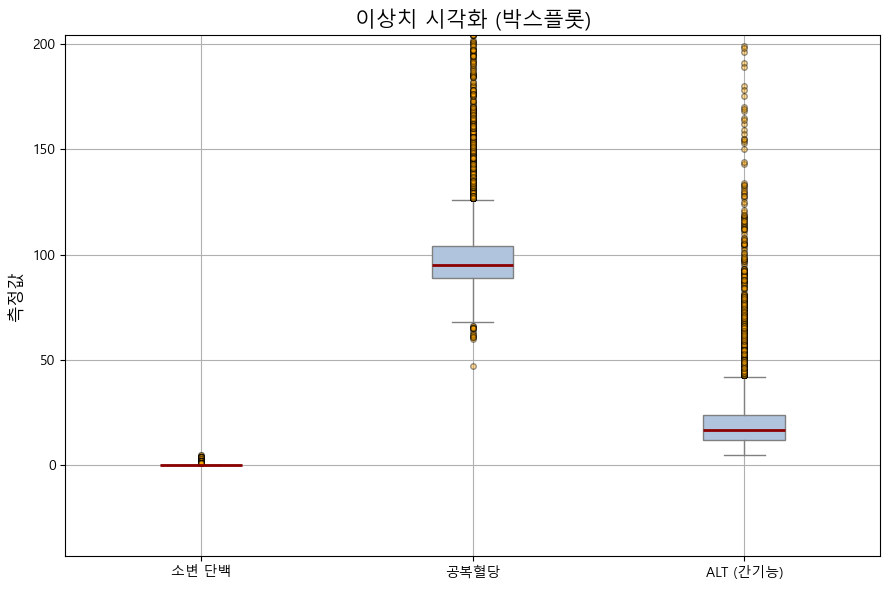

In [60]:
import matplotlib.pyplot as plt

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï (Windows ÏÇ¨Ïö©Ïûê Í∏∞Ï§Ä, ÌïÑÏöîÏãú Ï£ºÏÑù Ìï¥Ï†ú)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  # ÎßàÏù¥ÎÑàÏä§ Íπ®Ïßê Î∞©ÏßÄ

# ÏãúÍ∞ÅÌôîÏö© Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
columns_to_plot = ['HE_Upro', 'HE_glu', 'HE_alt']
column_labels = {
    'HE_Upro': 'ÏÜåÎ≥Ä Îã®Î∞±',
    'HE_glu': 'Í≥µÎ≥µÌòàÎãπ',
    'HE_alt': 'ALT (Í∞ÑÍ∏∞Îä•)'
}
data_boxplot = data[columns_to_plot].copy()
data_boxplot.columns = [column_labels[col] for col in columns_to_plot]

# Î∞ïÏä§ÌîåÎ°Ø
plt.figure(figsize=(9, 6))
box = data_boxplot.boxplot(
    grid=True,
    patch_artist=True,
    boxprops=dict(facecolor='lightsteelblue', color='gray'),
    medianprops=dict(color='darkred', linewidth=2),
    flierprops=dict(marker='o', markerfacecolor='orange', markersize=4, alpha=0.4),
    whiskerprops=dict(color='gray'),
    capprops=dict(color='gray')
)

# Ï†úÎ™© Î∞è ÎùºÎ≤®
plt.title('Ïù¥ÏÉÅÏπò ÏãúÍ∞ÅÌôî (Î∞ïÏä§ÌîåÎ°Ø)', fontsize=15)
plt.ylabel('Ï∏°Ï†ïÍ∞í', fontsize=12)

# YÏ∂ï ÏÉÅÌïú ÏÑ§Ï†ï (ÎÑàÎ¨¥ ÎÜíÏùÄ Ïù¥ÏÉÅÏπòÍ∞Ä ÏãúÏïº Í∞ÄÎ¶¨Îäî Í≤ΩÏö∞)
plt.ylim(top=data_boxplot.quantile(0.95).max() * 1.5)

plt.tight_layout()
plt.show()


**ÌÉÄÍ≤ü Î≥ÄÏàò** Î∂ÑÌè¨ ÌôïÏù∏

In [38]:
data['ÎãπÎá® Ïó¨Î∂Ä (HbA1c)'].value_counts()

ÎãπÎá® Ïó¨Î∂Ä (HbA1c)
1.0    5539
2.0    3374
3.0    1598
Name: count, dtype: int64

In [39]:
data['ÎπÑÎßå Ïó¨Î∂Ä'].value_counts()

ÎπÑÎßå Ïó¨Î∂Ä
2.0    4106
4.0    3228
3.0    2468
5.0     589
1.0     471
6.0     115
Name: count, dtype: int64

In [40]:
data['Í≥†ÌòàÏïï Ïó¨Î∂Ä'].value_counts()

Í≥†ÌòàÏïï Ïó¨Î∂Ä
1.0    4772
4.0    3803
3.0    1552
2.0     882
Name: count, dtype: int64

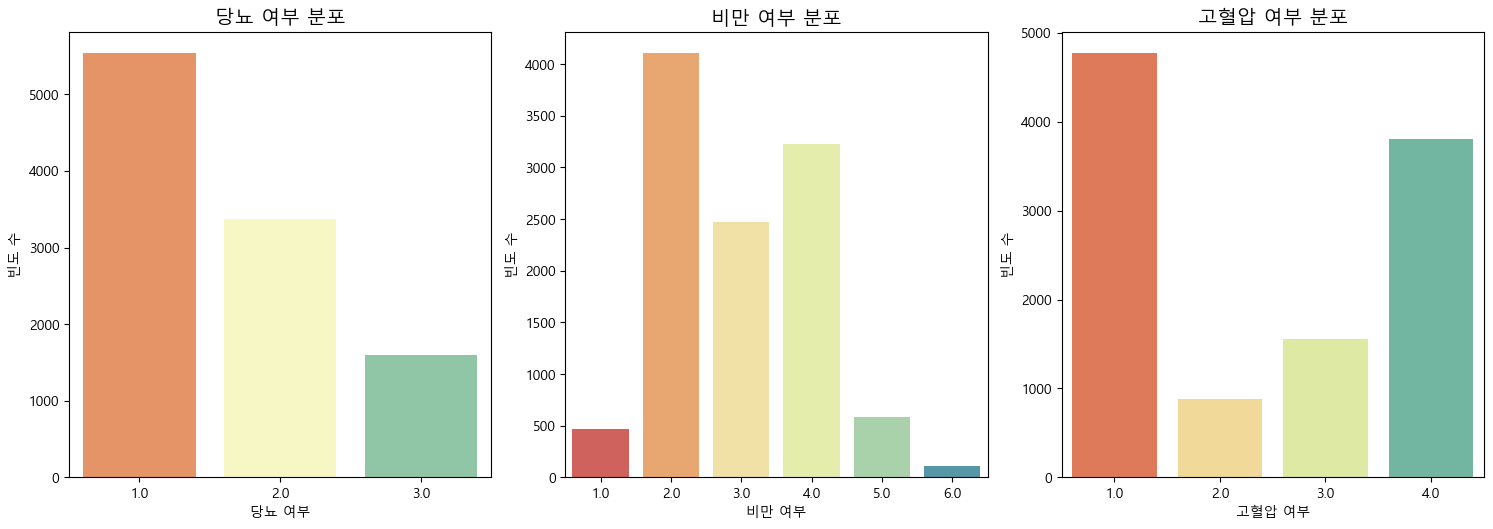

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# ÏãúÍ∞ÅÌôîÌï† Î≥ÄÏàò Î¶¨Ïä§Ìä∏
targets = ['HE_DM_HbA1c', 'HE_obe', 'HE_HP']
column_labels = {
    'HE_DM_HbA1c': 'ÎãπÎá® Ïó¨Î∂Ä',
    'HE_obe': 'ÎπÑÎßå Ïó¨Î∂Ä',
    'HE_HP': 'Í≥†ÌòàÏïï Ïó¨Î∂Ä'
}

# ÏÑúÎ∏åÌîåÎ°Ø ÏÑ§Ï†ï (2Ìñâ 4Ïó¥: 8Í∞úÏùò Ïπ∏ Ï§ë 3Í∞ú ÏÇ¨Ïö©)
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()  # 2Ï∞®Ïõê ‚Üí 1Ï∞®Ïõê ÌèâÌÉÑÌôî

# Í∞Å Î≥ÄÏàòÏóê ÎåÄÌï¥ countplot Í∑∏Î¶¨Í∏∞
for i, var in enumerate(targets):
    sns.countplot(x=var, data=data, palette="Spectral", ax=axes[i])
    axes[i].set_title(f"{column_labels[var]} Î∂ÑÌè¨", fontsize=14)
    axes[i].set_xlabel(column_labels[var])
    axes[i].set_ylabel('ÎπàÎèÑ Ïàò')

# ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÎäî subplot Ïà®Í∏∞Í∏∞
for j in range(len(targets), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [69]:
data = pd.read_csv("C:/semi_project/health_checkup/JDM/2022ÎÖÑ~2023ÎÖÑ/Í±¥Í∞ïÎç∞Ïù¥ÌÑ∞_2022_2023_Ìï©Î≥∏.csv")

In [ ]:
#data = pd.read_csv("C:/semi_project/health_checkup/JDM/ÏÑ†ÌÉùÏª¨Îüº_Í±¥Í∞ïÎç∞Ïù¥ÌÑ∞.csv") # ÎãπÎá® ÏπòÎ£å

Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨

In [70]:
def iqr_clip(series, lower_quantile=0.25, upper_quantile=0.75, clip_range=1.5):
    q1 = series.quantile(lower_quantile)
    q3 = series.quantile(upper_quantile)
    iqr = q3 - q1
    lower_bound = q1 - clip_range * iqr
    upper_bound = q3 + clip_range * iqr
    return series.clip(lower=lower_bound, upper=upper_bound)

# Ï†ÅÏö©
data['HE_glu'] = iqr_clip(data['HE_glu'])
data['HE_alt'] = iqr_clip(data['HE_alt'])

Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨

In [71]:
import pandas as pd

# ÎÇ®Í∏∞Í≥† Ïã∂ÏùÄ Ïª¨Îüº Î¶¨Ïä§Ìä∏
columns_to_keep = [
    'ID','year','age','sex','HE_ht', 'HE_wt', 'HE_wc', 'HE_BMI',
    'HE_sbp1', 'HE_dbp1',
    'HE_Upro', 'HE_glu', 'HE_chol', 'HE_HDL_st2',
    'HE_TG', 'HE_LDL_drct', 'HE_crea', 'HE_ast', 'HE_alt',
    # 'L_OUT_FQ', 
    # 'BP1','BD1_11', 'BS3_2', 'BE5_1', 
    'HE_obe', 'HE_HP', 'HE_DM_HbA1c',
    'DE1_dg', 'DI1_dg'
]

# ÏõêÎûò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏù¥ dfÏùº Îïå
data = data[columns_to_keep]


In [ ]:
# data = data[data['DE1_3'].isin([1, 2])]

In [ ]:
# data = data[data['DI1_pt'].isin([0, 1])]

In [ ]:
# set(data['DE1_3'])

{1.0, 2.0}

In [ ]:
# import pandas as pd
# #ÎãπÎá® ÌÖåÏä§Ìä∏
# # ÎÇ®Í∏∞Í≥† Ïã∂ÏùÄ Ïª¨Îüº Î¶¨Ïä§Ìä∏
# columns_to_keep = [
#     'ID','year','age','sex','HE_ht', 'HE_wt', 'HE_wc', 'HE_BMI',
#     'HE_sbp1', 'HE_dbp1',
#     'HE_Upro', 'HE_glu', 'HE_chol', 'HE_HDL_st2',
#     'HE_TG', 'HE_LDL_drct', 'HE_crea', 'HE_ast', 'HE_alt',
#     # 'L_OUT_FQ', 
#     # 'BP1','BD1_11', 'BS3_2', 'BE5_1', 
#     'HE_obe', 'HE_HP', 'HE_DM_HbA1c',
#     'DE1_dg', 'DI1_dg', 'DE1_3', 'DI1_pt'
# ]

# # ÏõêÎûò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏù¥ dfÏùº Îïå
# data = data[columns_to_keep]


In [ ]:
# HE_DM_HbA1c
if 'HE_DM_HbA1c' in data.columns:
    data['HE_DM_HbA1c'] = data['HE_DM_HbA1c'].replace([9, 99, 999, 888, 9.0, 99.0, 999.0, 888.0], np.nan)
    if 'DE1_dg' in data.columns:
        print(f"DE1_dg missing ratio: {data['DE1_dg'].isnull().mean()}")
        data['HE_DM_HbA1c'] = data['HE_DM_HbA1c'].fillna(data['DE1_dg'].map({0: 1, 1: 3}))
    # ÎÇ®ÏùÄ Í≤∞Ï∏°ÏπòÎäî ÌÅ¥ÎûòÏä§ ÎπÑÏú® Í∏∞Î∞ò ÎûúÎç§ ÏÉòÌîåÎßÅ
    if data['HE_DM_HbA1c'].isnull().any():
        class_probs = data['HE_DM_HbA1c'].value_counts(normalize=True)
        data['HE_DM_HbA1c'] = data['HE_DM_HbA1c'].apply(
            lambda x: np.random.choice(class_probs.index, p=class_probs.values) if pd.isna(x) else x
        )
    print(f"HE_DM_HbA1c NaN count after: {data['HE_DM_HbA1c'].isnull().sum()}")

# HE_obe
if 'HE_obe' in data.columns:
    data['HE_obe'] = data['HE_obe'].replace([9, 99, 999, 888, 9.0, 99.0, 999.0, 888.0], np.nan)
    if 'HE_BMI' in data.columns:
        # BMIÍ∞Ä KNN ÎåÄÏ≤¥Îêú Í≤ΩÏö∞ ÌëúÏãú
        data['HE_BMI_imputed'] = data['HE_BMI'].isnull().astype(int)
        data['HE_obe'] = data.apply(
            lambda row: row['HE_obe'] if pd.notna(row['HE_obe']) else (
                1 if row['HE_BMI'] < 18.5 else
                2 if row['HE_BMI'] < 25 else
                3 if row['HE_BMI'] < 30 else
                4 if row['HE_BMI'] < 35 else
                5 if row['HE_BMI'] < 40 else
                6
            ),
            axis=1
        )
    # ÎÇ®ÏùÄ Í≤∞Ï∏°ÏπòÎäî ÌÅ¥ÎûòÏä§ ÎπÑÏú® Í∏∞Î∞ò ÎûúÎç§ ÏÉòÌîåÎßÅ
    if data['HE_obe'].isnull().any():
        class_probs = data['HE_obe'].value_counts(normalize=True)
        data['HE_obe'] = data['HE_obe'].apply(
            lambda x: np.random.choice(class_probs.index, p=class_probs.values) if pd.isna(x) else x
        )
    print(f"HE_obe NaN count after: {data['HE_obe'].isnull().sum()}")

# HE_HP
if 'HE_HP' in data.columns:
    data['HE_HP'] = data['HE_HP'].replace([9, 99, 999, 888, 9.0, 99.0, 999.0, 888.0], np.nan)
    if 'DI1_dg' in data.columns:
        print(f"DI1_dg missing ratio: {data['DI1_dg'].isnull().mean()}")
        data['HE_HP'] = data['HE_HP'].fillna(data['DI1_dg'].map({0: 1, 1: 4}))
    # ÎÇ®ÏùÄ Í≤∞Ï∏°ÏπòÎäî ÌÅ¥ÎûòÏä§ ÎπÑÏú® Í∏∞Î∞ò ÎûúÎç§ ÏÉòÌîåÎßÅ
    if data['HE_HP'].isnull().any():
        class_probs = data['HE_HP'].value_counts(normalize=True)
        data['HE_HP'] = data['HE_HP'].apply(
            lambda x: np.random.choice(class_probs.index, p=class_probs.values) if pd.isna(x) else x
        )
    print(f"HE_HP NaN count after: {data['HE_HP'].isnull().sum()}")


#Í≤∞Ï∏°Ïπò ÎπÑÏú® ÎÇÆÏùÄ Î≥ÄÏàò Ï≤òÎ¶¨
# low_missing_columns = [
#     'DI1_dg', 
#     'DE1_dg', 
 ]
continuous_columns = ['HE_wt', 'HE_ht', 'HE_BMI']  # Ïó∞ÏÜçÌòï Î≥ÄÏàò

#for col in low_missing_columns + continuous_columns:
for col in continuous_columns:
    if col in data.columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')
        data[col] = data[col].replace([9, 99, 999, 88, 888, 9.0, 99.0, 999.0, 88.0, 888.0], np.nan)
        if not data[col].isnull().all():
            if col in continuous_columns:
                median_value = data[col].median()
                data[col] = data[col].fillna(median_value)
                print(f"Median for {col}: {median_value}")
            else:
                mode_series = data[col].mode(dropna=True)
                if not mode_series.empty:
                    mode_value = mode_series[0]
                    data[col] = data[col].fillna(mode_value)
                    print(f"Mode for {col}: {mode_value}")
                else:
                    print(f"No valid mode for {col}, leaving as is.")
        else:
            print(f"Column {col} is all NaN, skipping.")

# data = data[data['DE1_3'].isin([1, 2])]

#ÏÉùÏ≤¥ ÏßÄÌëú Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
knn_columns = [
    'HE_sbp1', 'HE_dbp1',  'HE_wc', 'HE_glu', 'HE_chol',
    'HE_HDL_st2', 'HE_TG', 'HE_LDL_drct',  'HE_crea', 'HE_Upro',
    'HE_ast', 'HE_alt', 'HE_wt', 'HE_ht', 'HE_BMI'
]
knn_data = data[knn_columns].copy()
knn_data = knn_data.replace([888, 999, 888.0, 999.0], np.nan)

# Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
knn_data_scaled = scaler.fit_transform(knn_data)
knn_data_scaled = pd.DataFrame(knn_data_scaled, columns=knn_columns, index=knn_data.index)

# KNN Imputation
imputer_knn = KNNImputer(n_neighbors=5, weights="distance")
knn_imputed = imputer_knn.fit_transform(knn_data_scaled)

# Ïó≠Ïä§ÏºÄÏùºÎßÅ
knn_imputed = scaler.inverse_transform(knn_imputed)
knn_imputed_data = pd.DataFrame(knn_imputed, columns=knn_columns, index=knn_data.index)
data[knn_columns] = knn_imputed_data

# knn_scaler_filename = 'HE_DM_HbA1c_knn_scaler.pkl'
# knn_imputer_filename = 'HE_DM_HbA1c_knn_imputer.pkl'
# joblib.dump(knn_data_scaled, knn_scaler_filename)
# joblib.dump(imputer_knn, knn_imputer_filename)
# knn_scaler_filename = 'HE_obe_knn_scaler.pkl'
# knn_imputer_filename = 'HE_obe_knn_imputer.pkl'
# joblib.dump(knn_data_scaled, knn_scaler_filename)
# joblib.dump(imputer_knn, knn_imputer_filename)
# knn_scaler_filename = 'HE_HP_knn_scaler.pkl'
# knn_imputer_filename = 'HE_HP_knn_imputer.pkl'
# joblib.dump(knn_data_scaled, knn_scaler_filename)
# joblib.dump(imputer_knn, knn_imputer_filename)

print("Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ ÌõÑ Îç∞Ïù¥ÌÑ∞ ÏÉÅÌÉú:")
print(data.isnull().sum())
print("\nÌÉÄÍ≤ü Î≥ÄÏàò ÌÅ¥ÎûòÏä§ ÎπÑÏú®:")
for target in ['HE_DM_HbA1c', 'HE_obe', 'HE_HP']:
    if target in data.columns:
        print(f"\n{target}:\n{data[target].value_counts(normalize=True)}")
print("\nÍ∏∞Î≥∏ ÌÜµÍ≥ÑÎüâ:")
print(data.describe())

DE1_dg missing ratio: 0.0
HE_DM_HbA1c NaN count after: 0
HE_obe NaN count after: 0
DI1_dg missing ratio: 0.0
HE_HP NaN count after: 0
Mode for DI1_dg: 1.0
Mode for DE1_dg: 1.0
Median for HE_wt: 65.65
Median for HE_ht: 161.64999999999998
Median for HE_BMI: 25.011973327866066
Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ ÌõÑ Îç∞Ïù¥ÌÑ∞ ÏÉÅÌÉú:
ID                0
year              0
age               0
sex               0
HE_ht             0
HE_wt             0
HE_wc             0
HE_BMI            0
HE_sbp1           0
HE_dbp1           0
HE_Upro           0
HE_glu            0
HE_chol           0
HE_HDL_st2        0
HE_TG             0
HE_LDL_drct       0
HE_crea           0
HE_ast            0
HE_alt            0
HE_obe            0
HE_HP             0
HE_DM_HbA1c       0
DE1_dg            0
DI1_dg            0
DE1_3             0
DI1_pt            0
HE_BMI_imputed    0
dtype: int64

ÌÉÄÍ≤ü Î≥ÄÏàò ÌÅ¥ÎûòÏä§ ÎπÑÏú®:

HE_DM_HbA1c:
HE_DM_HbA1c
3.0    1.0
Name: proportion, dtype: float64

HE_obe:
HE_obe
4.0    0.36942

In [74]:
# HE_DM_HbA1c
if 'HE_DM_HbA1c' in data.columns:
    data['HE_DM_HbA1c'] = data['HE_DM_HbA1c'].replace([9, 99, 999, 888, 9.0, 99.0, 999.0, 888.0], np.nan)
    if 'DE1_dg' in data.columns:
        print(f"DE1_dg missing ratio: {data['DE1_dg'].isnull().mean()}")
        data['HE_DM_HbA1c'] = data['HE_DM_HbA1c'].fillna(data['DE1_dg'].map({0: 1, 1: 3}))
    # ÎÇ®ÏùÄ Í≤∞Ï∏°ÏπòÎäî ÌÅ¥ÎûòÏä§ ÎπÑÏú® Í∏∞Î∞ò ÎûúÎç§ ÏÉòÌîåÎßÅ
    if data['HE_DM_HbA1c'].isnull().any():
        data = data[data['HE_DM_HbA1c'].notnull()]
    print(f"HE_DM_HbA1c NaN count after: {data['HE_DM_HbA1c'].isnull().sum()}")

# HE_obe
if 'HE_obe' in data.columns:
    data['HE_obe'] = data['HE_obe'].replace([9, 99, 999, 888, 9.0, 99.0, 999.0, 888.0], np.nan)
    if 'HE_BMI' in data.columns:
        # BMIÍ∞Ä KNN ÎåÄÏ≤¥Îêú Í≤ΩÏö∞ ÌëúÏãú
        data['HE_BMI_imputed'] = data['HE_BMI'].isnull().astype(int)
        data['HE_obe'] = data.apply(
            lambda row: row['HE_obe'] if pd.notna(row['HE_obe']) else (
                1 if row['HE_BMI'] < 18.5 else
                2 if row['HE_BMI'] < 25 else
                3 if row['HE_BMI'] < 30 else
                4 if row['HE_BMI'] < 35 else
                5 if row['HE_BMI'] < 40 else
                6
            ),
            axis=1
        )
    # ÎÇ®ÏùÄ Í≤∞Ï∏°ÏπòÎäî ÌÅ¥ÎûòÏä§ ÎπÑÏú® Í∏∞Î∞ò ÎûúÎç§ ÏÉòÌîåÎßÅ
    if data['HE_obe'].isnull().any():
        data = data[data['HE_obe'].notnull()]
    print(f"HE_obe NaN count after: {data['HE_obe'].isnull().sum()}")

# HE_HP
if 'HE_HP' in data.columns:
    data['HE_HP'] = data['HE_HP'].replace([9, 99, 999, 888, 9.0, 99.0, 999.0, 888.0], np.nan)
    if 'DI1_dg' in data.columns:
        print(f"DI1_dg missing ratio: {data['DI1_dg'].isnull().mean()}")
        data['HE_HP'] = data['HE_HP'].fillna(data['DI1_dg'].map({0: 1, 1: 4}))
    # ÎÇ®ÏùÄ Í≤∞Ï∏°ÏπòÎäî ÌÅ¥ÎûòÏä§ ÎπÑÏú® Í∏∞Î∞ò ÎûúÎç§ ÏÉòÌîåÎßÅ
    if data['HE_HP'].isnull().any():
        data = data[data['HE_HP'].notnull()]
    print(f"HE_HP NaN count after: {data['HE_HP'].isnull().sum()}")


#Í≤∞Ï∏°Ïπò ÎπÑÏú® ÎÇÆÏùÄ Î≥ÄÏàò Ï≤òÎ¶¨
# low_missing_columns = [
#     'DI1_dg', 
#     'DE1_dg', 
# ]
continuous_columns = ['HE_wt', 'HE_ht', 'HE_BMI']  # Ïó∞ÏÜçÌòï Î≥ÄÏàò

#for col in low_missing_columns + continuous_columns:
for col in continuous_columns:
    if col in data.columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')
        data[col] = data[col].replace([9, 99, 999, 88, 888, 9.0, 99.0, 999.0, 88.0, 888.0], np.nan)
        if not data[col].isnull().all():
            if col in continuous_columns:
                median_value = data[col].median()
                data[col] = data[col].fillna(median_value)
                print(f"Median for {col}: {median_value}")
            else:
                mode_series = data[col].mode(dropna=True)
                if not mode_series.empty:
                    mode_value = mode_series[0]
                    data[col] = data[col].fillna(mode_value)
                    print(f"Mode for {col}: {mode_value}")
                else:
                    print(f"No valid mode for {col}, leaving as is.")
        else:
            print(f"Column {col} is all NaN, skipping.")

# data = data[data['DE1_3'].isin([1, 2])]

#ÏÉùÏ≤¥ ÏßÄÌëú Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
knn_columns = [
    'HE_sbp1', 'HE_dbp1',  'HE_wc', 'HE_glu', 'HE_chol',
    'HE_HDL_st2', 'HE_TG', 'HE_LDL_drct',  'HE_crea', 'HE_Upro',
    'HE_ast', 'HE_alt', 'HE_wt', 'HE_ht', 'HE_BMI'
]
knn_data = data[knn_columns].copy()
knn_data = knn_data.replace([888, 999, 888.0, 999.0], np.nan)

# Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
knn_data_scaled = scaler.fit_transform(knn_data)
knn_data_scaled = pd.DataFrame(knn_data_scaled, columns=knn_columns, index=knn_data.index)

# KNN Imputation
imputer_knn = KNNImputer(n_neighbors=5, weights="distance")
knn_imputed = imputer_knn.fit_transform(knn_data_scaled)

# Ïó≠Ïä§ÏºÄÏùºÎßÅ
knn_imputed = scaler.inverse_transform(knn_imputed)
knn_imputed_data = pd.DataFrame(knn_imputed, columns=knn_columns, index=knn_data.index)
data[knn_columns] = knn_imputed_data

# knn_scaler_filename = 'HE_DM_HbA1c_knn_scaler.pkl'
# knn_imputer_filename = 'HE_DM_HbA1c_knn_imputer.pkl'
# joblib.dump(knn_data_scaled, knn_scaler_filename)
# joblib.dump(imputer_knn, knn_imputer_filename)
# knn_scaler_filename = 'HE_obe_knn_scaler.pkl'
# knn_imputer_filename = 'HE_obe_knn_imputer.pkl'
# joblib.dump(knn_data_scaled, knn_scaler_filename)
# joblib.dump(imputer_knn, knn_imputer_filename)
# knn_scaler_filename = 'HE_HP_knn_scaler.pkl'
# knn_imputer_filename = 'HE_HP_knn_imputer.pkl'
# joblib.dump(knn_data_scaled, knn_scaler_filename)
# joblib.dump(imputer_knn, knn_imputer_filename)

print("Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ ÌõÑ Îç∞Ïù¥ÌÑ∞ ÏÉÅÌÉú:")
print(data.isnull().sum())
print("\nÌÉÄÍ≤ü Î≥ÄÏàò ÌÅ¥ÎûòÏä§ ÎπÑÏú®:")
for target in ['HE_DM_HbA1c', 'HE_obe', 'HE_HP']:
    if target in data.columns:
        print(f"\n{target}:\n{data[target].value_counts(normalize=True)}")
print("\nÍ∏∞Î≥∏ ÌÜµÍ≥ÑÎüâ:")
print(data.describe())

DE1_dg missing ratio: 0.0006821282401091405
HE_DM_HbA1c NaN count after: 0
HE_obe NaN count after: 0
DI1_dg missing ratio: 0.0
HE_HP NaN count after: 0
Median for HE_wt: 62.7
Median for HE_ht: 163.0
Median for HE_BMI: 23.744212501361336
Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ ÌõÑ Îç∞Ïù¥ÌÑ∞ ÏÉÅÌÉú:
ID                0
year              0
age               0
sex               0
HE_ht             0
HE_wt             0
HE_wc             0
HE_BMI            0
HE_sbp1           0
HE_dbp1           0
HE_Upro           0
HE_glu            0
HE_chol           0
HE_HDL_st2        0
HE_TG             0
HE_LDL_drct       0
HE_crea           0
HE_ast            0
HE_alt            0
HE_obe            0
HE_HP             0
HE_DM_HbA1c       0
DE1_dg            0
DI1_dg            0
HE_BMI_imputed    0
dtype: int64

ÌÉÄÍ≤ü Î≥ÄÏàò ÌÅ¥ÎûòÏä§ ÎπÑÏú®:

HE_DM_HbA1c:
HE_DM_HbA1c
1.0    0.546637
2.0    0.300579
3.0    0.152784
Name: proportion, dtype: float64

HE_obe:
HE_obe
2.0    0.367661
4.0    0.287661
3.0    0.220846
5.0    

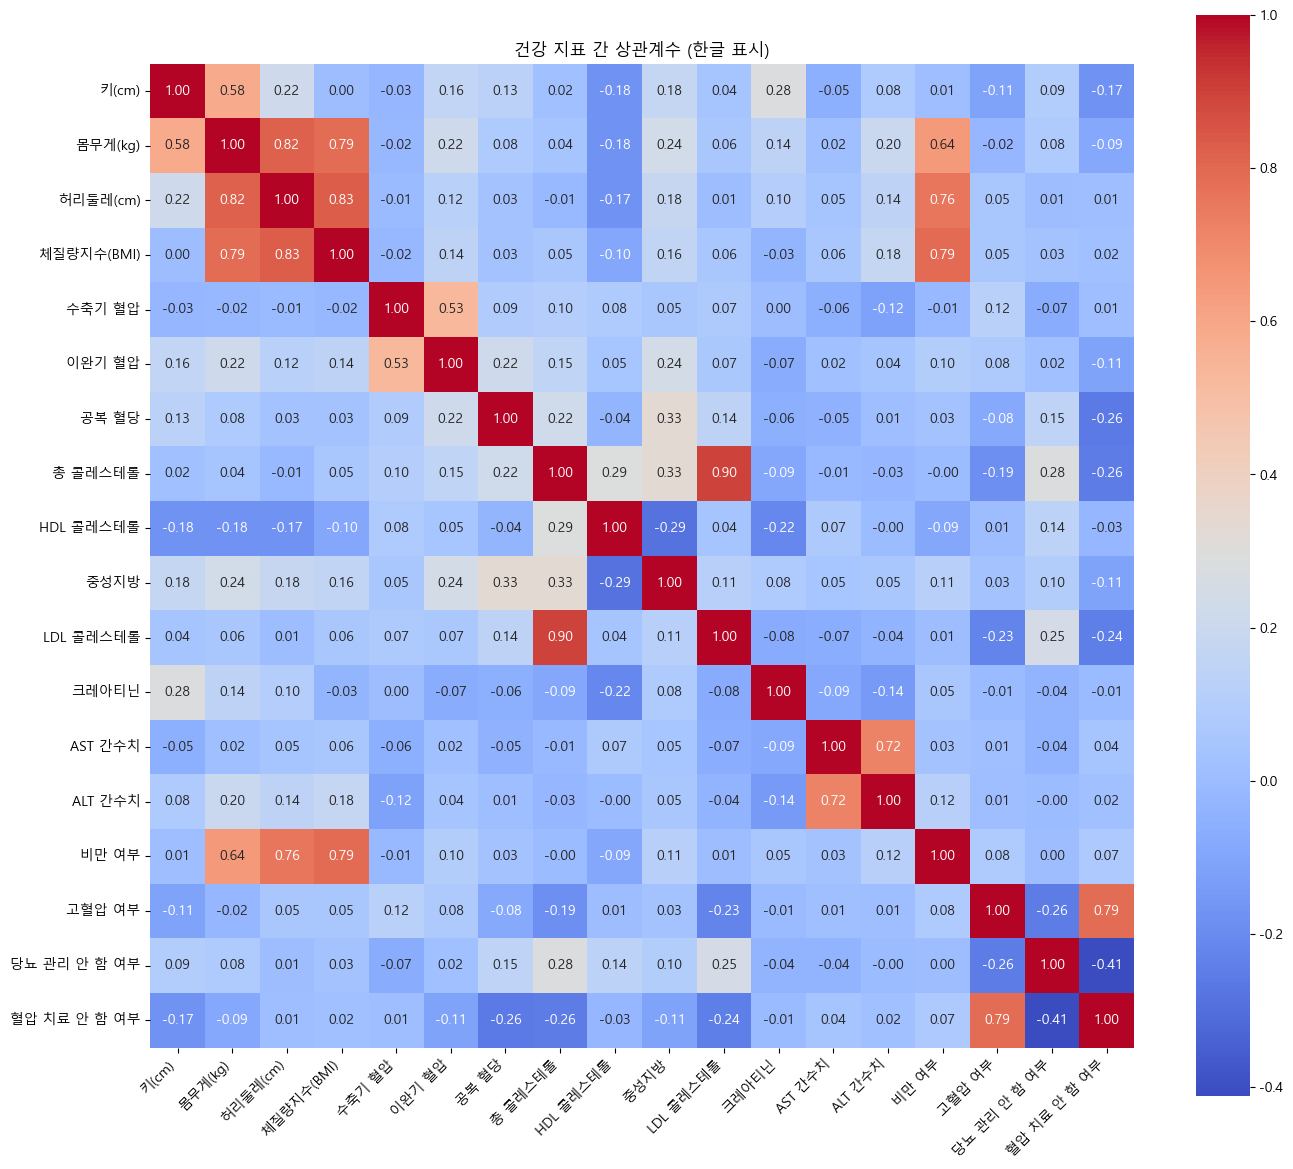

In [ ]:
column_name_map = {
    'HE_ht': 'ÌÇ§(cm)',
    'HE_wt': 'Î™∏Î¨¥Í≤å(kg)',
    'HE_wc': 'ÌóàÎ¶¨ÎëòÎ†à(cm)',
    'HE_BMI': 'Ï≤¥ÏßàÎüâÏßÄÏàò(BMI)',
    'HE_sbp1': 'ÏàòÏ∂ïÍ∏∞ ÌòàÏïï',
    'HE_dbp1': 'Ïù¥ÏôÑÍ∏∞ ÌòàÏïï',
    'HE_glu': 'Í≥µÎ≥µ ÌòàÎãπ',
    'HE_chol': 'Ï¥ù ÏΩúÎ†àÏä§ÌÖåÎ°§',
    'HE_HDL_st2': 'HDL ÏΩúÎ†àÏä§ÌÖåÎ°§',
    'HE_TG': 'Ï§ëÏÑ±ÏßÄÎ∞©',
    'HE_LDL_drct': 'LDL ÏΩúÎ†àÏä§ÌÖåÎ°§',
    'HE_crea': 'ÌÅ¨Î†àÏïÑÌã∞Îãå',
    'HE_ast': 'AST Í∞ÑÏàòÏπò',
    'HE_alt': 'ALT Í∞ÑÏàòÏπò',
    'HE_obe': 'ÎπÑÎßå Ïó¨Î∂Ä',
    'HE_HP': 'Í≥†ÌòàÏïï Ïó¨Î∂Ä',
    'DE1_3': 'ÎãπÎá® Í¥ÄÎ¶¨ Ïïà Ìï® Ïó¨Î∂Ä',
    'DI1_pt' : 'ÌòàÏïï ÏπòÎ£å Ïïà Ìï® Ïó¨Î∂Ä'
}


correlation_columns = [
    'HE_ht', 'HE_wt', 'HE_wc', 'HE_BMI',
    'HE_sbp1', 'HE_dbp1', 'HE_glu', 'HE_chol', 'HE_HDL_st2',
    'HE_TG', 'HE_LDL_drct', 'HE_crea', 'HE_ast', 'HE_alt', 'DE1_3', 'DI1_pt'
]

import seaborn as sns
import matplotlib.pyplot as plt

# Î≥¥Í≥† Ïã∂ÏùÄ Î≥ÄÏàòÎßå Ï∂îÏ∂ú
selected_columns = list(column_name_map.keys())
correlation_matrix = data[selected_columns].corr()

# Ïª¨ÎüºÎ™ÖÏùÑ ÌïúÍ∏ÄÎ°ú Î≥ÄÌôò
correlation_matrix.columns = [column_name_map[col] for col in correlation_matrix.columns]
correlation_matrix.index = [column_name_map[col] for col in correlation_matrix.index]

# ÌûàÌä∏Îßµ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Í±¥Í∞ï ÏßÄÌëú Í∞Ñ ÏÉÅÍ¥ÄÍ≥ÑÏàò (ÌïúÍ∏Ä ÌëúÏãú)")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**ÌÉÄÍ≤üÎ≥ÄÏàòÏôÄ ÎèÖÎ¶ΩÎ≥ÄÏàòÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌôïÏù∏**

üìä ÌÉÄÍ≤ü Î≥ÄÏàò ÏÉÅÍ¥Ä Î∂ÑÏÑù - ÎãπÎá®Î≥ë (HbA1c)


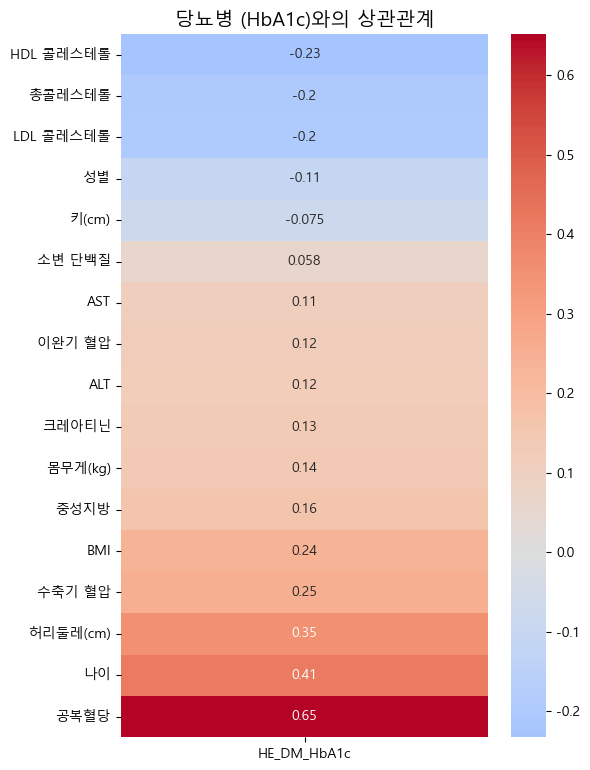

üìä ÌÉÄÍ≤ü Î≥ÄÏàò ÏÉÅÍ¥Ä Î∂ÑÏÑù - ÎπÑÎßåÎèÑ


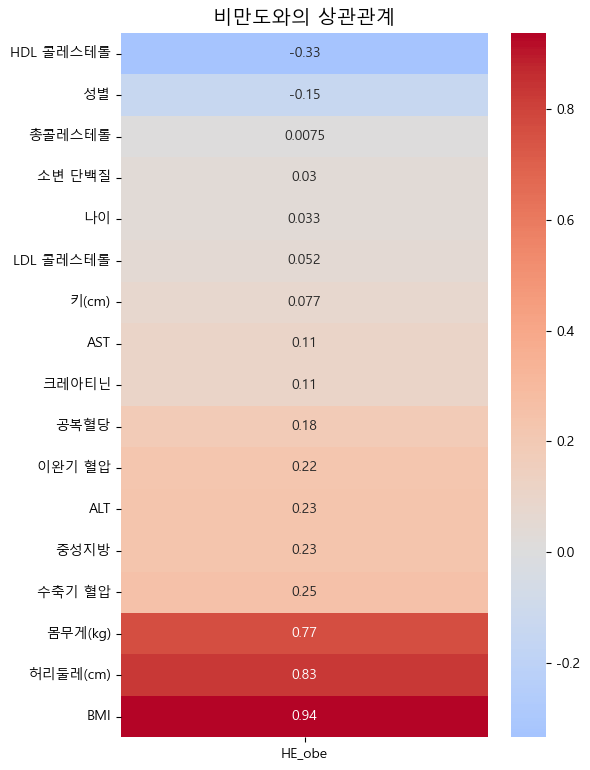

üìä ÌÉÄÍ≤ü Î≥ÄÏàò ÏÉÅÍ¥Ä Î∂ÑÏÑù - Í≥†ÌòàÏïï


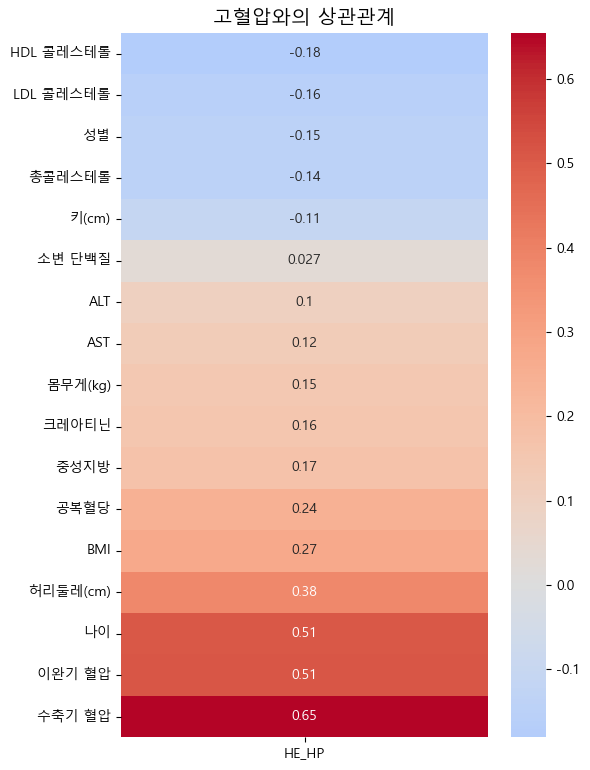

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Î≥ÄÏàò Ïù¥Î¶Ñ -> ÌïúÍ∏Ä Îß§Ìïë ÏÇ¨Ï†Ñ
feature_name_ko = {
    'HE_ht': 'ÌÇ§(cm)', 'HE_wt': 'Î™∏Î¨¥Í≤å(kg)', 'HE_wc': 'ÌóàÎ¶¨ÎëòÎ†à(cm)', 'HE_BMI': 'BMI',
    'HE_sbp1': 'ÏàòÏ∂ïÍ∏∞ ÌòàÏïï', 'HE_dbp1': 'Ïù¥ÏôÑÍ∏∞ ÌòàÏïï',
    'HE_Upro': 'ÏÜåÎ≥Ä Îã®Î∞±Ïßà', 'HE_glu': 'Í≥µÎ≥µÌòàÎãπ', 'HE_chol': 'Ï¥ùÏΩúÎ†àÏä§ÌÖåÎ°§',
    'HE_HDL_st2': 'HDL ÏΩúÎ†àÏä§ÌÖåÎ°§', 'HE_TG': 'Ï§ëÏÑ±ÏßÄÎ∞©', 'HE_LDL_drct': 'LDL ÏΩúÎ†àÏä§ÌÖåÎ°§',
    'HE_crea': 'ÌÅ¨Î†àÏïÑÌã∞Îãå', 'HE_ast': 'AST', 'HE_alt': 'ALT',
    'sex': 'ÏÑ±Î≥Ñ', 'age': 'ÎÇòÏù¥',
    'BS3_2': '1Ï£ºÏùºÍ∞Ñ Ïö¥Îèô ÌöüÏàò',
    'BE5_1': 'Ïä§Ìä∏Î†àÏä§ Ïù∏ÏßÄ Ï†ïÎèÑ',
    'L_OUT_FQ': 'Ïô∏Ïãù ÎπàÎèÑ'
}

# ÌÉÄÍ≤ü Ïù¥Î¶Ñ -> ÌïúÍ∏Ä Îß§Ìïë
target_name_ko = {
    'HE_DM_HbA1c': 'ÎãπÎá®Î≥ë (HbA1c)',
    'HE_obe': 'ÎπÑÎßåÎèÑ',
    'HE_HP': 'Í≥†ÌòàÏïï'
}

# Ï†úÏô∏Ìï† Ïª¨Îüº
exclude_cols = ['year', 'ID', 'DE1_dg', 'DI1_dg'] + list(target_name_ko.keys())

# input features ÏûêÎèô ÏßÄÏ†ï
input_features = [col for col in data.columns if col not in exclude_cols]

for target in target_name_ko.keys():
    print(f"üìä ÌÉÄÍ≤ü Î≥ÄÏàò ÏÉÅÍ¥Ä Î∂ÑÏÑù - {target_name_ko[target]}")
    
    # ÏàòÏπòÌòï Î≥ÄÏàòÎßå Ìè¨Ìï®Ìïú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
    subset = data[input_features + [target]].copy()
    subset = subset.select_dtypes(include='number')

    # ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
    corr_with_target = subset.corr()[[target]].drop(index=target)
    corr_with_target = corr_with_target.sort_values(by=target, ascending=True)

    # ÌïúÍ∏Ä ÎùºÎ≤®Î°ú Ïù∏Îç±Ïä§ Î≥ÄÌôò
    corr_with_target.index = [feature_name_ko.get(col, col) for col in corr_with_target.index]

    # ÏãúÍ∞ÅÌôî
    plt.figure(figsize=(6, len(corr_with_target) * 0.4 + 1))
    sns.heatmap(corr_with_target, annot=True, cmap='coolwarm', center=0)
    plt.title(f"{target_name_ko[target]}ÏôÄÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ", fontsize=14)
    plt.tight_layout()
    plt.show()


üìä ÌÉÄÍ≤ü Î≥ÄÏàò ÏÉÅÍ¥Ä Î∂ÑÏÑù - ÎãπÎá®Î≥ë (HbA1c)


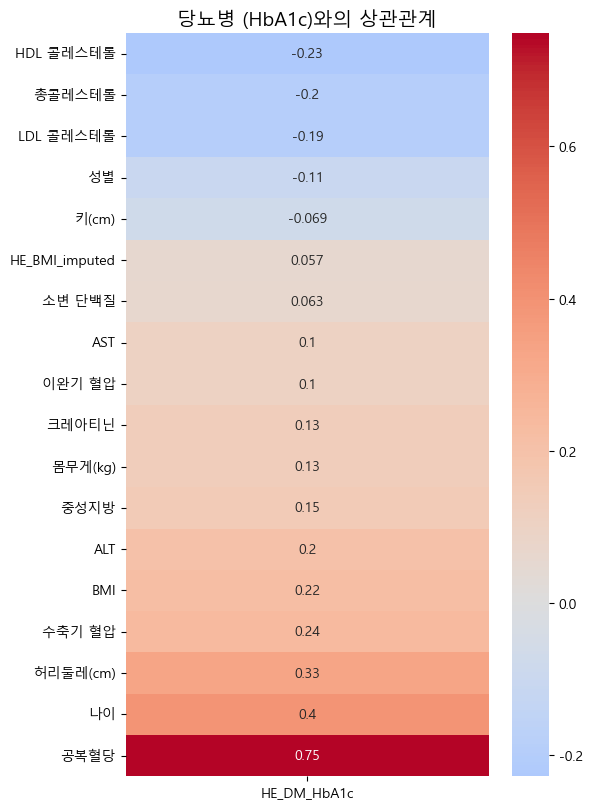

üìä ÌÉÄÍ≤ü Î≥ÄÏàò ÏÉÅÍ¥Ä Î∂ÑÏÑù - ÎπÑÎßåÎèÑ


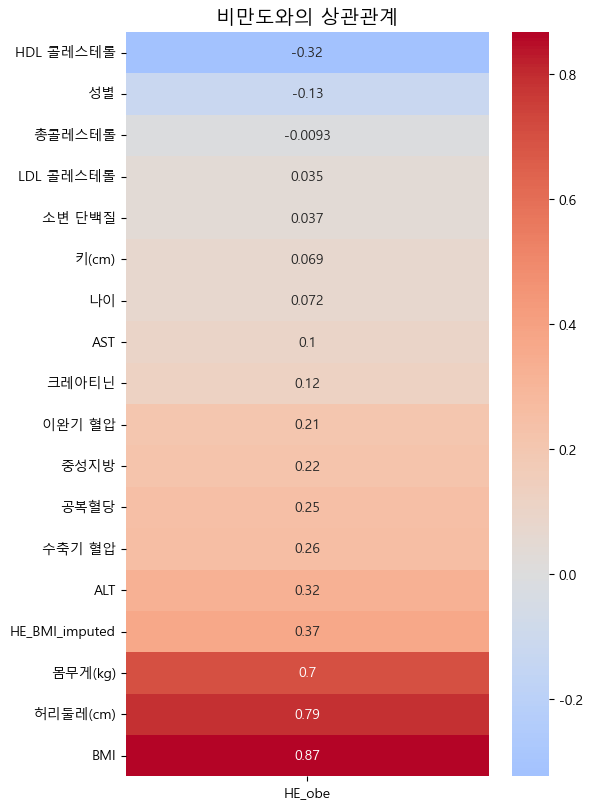

üìä ÌÉÄÍ≤ü Î≥ÄÏàò ÏÉÅÍ¥Ä Î∂ÑÏÑù - Í≥†ÌòàÏïï


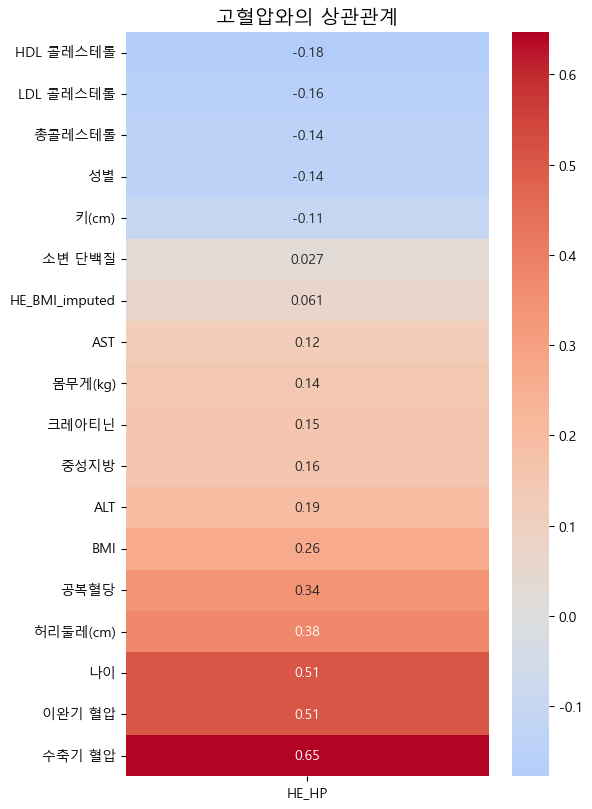

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Î≥ÄÏàò Ïù¥Î¶Ñ -> ÌïúÍ∏Ä Îß§Ìïë ÏÇ¨Ï†Ñ
feature_name_ko = {
    'HE_ht': 'ÌÇ§(cm)', 'HE_wt': 'Î™∏Î¨¥Í≤å(kg)', 'HE_wc': 'ÌóàÎ¶¨ÎëòÎ†à(cm)', 'HE_BMI': 'BMI',
    'HE_sbp1': 'ÏàòÏ∂ïÍ∏∞ ÌòàÏïï', 'HE_dbp1': 'Ïù¥ÏôÑÍ∏∞ ÌòàÏïï',
    'HE_Upro': 'ÏÜåÎ≥Ä Îã®Î∞±Ïßà', 'HE_glu': 'Í≥µÎ≥µÌòàÎãπ', 'HE_chol': 'Ï¥ùÏΩúÎ†àÏä§ÌÖåÎ°§',
    'HE_HDL_st2': 'HDL ÏΩúÎ†àÏä§ÌÖåÎ°§', 'HE_TG': 'Ï§ëÏÑ±ÏßÄÎ∞©', 'HE_LDL_drct': 'LDL ÏΩúÎ†àÏä§ÌÖåÎ°§',
    'HE_crea': 'ÌÅ¨Î†àÏïÑÌã∞Îãå', 'HE_ast': 'AST', 'HE_alt': 'ALT',
    'sex': 'ÏÑ±Î≥Ñ', 'age': 'ÎÇòÏù¥',
    'BS3_2': '1Ï£ºÏùºÍ∞Ñ Ïö¥Îèô ÌöüÏàò',
    'BE5_1': 'Ïä§Ìä∏Î†àÏä§ Ïù∏ÏßÄ Ï†ïÎèÑ',
    'L_OUT_FQ': 'Ïô∏Ïãù ÎπàÎèÑ',
    'DE1_3': 'ÎãπÎá® Í¥ÄÎ¶¨ Ïïà Ìï® Ïó¨Î∂Ä',
    'DI1_pt' : 'ÌòàÏïï ÏπòÎ£å Ïïà Ìï® Ïó¨Î∂Ä'
}

# ÌÉÄÍ≤ü Ïù¥Î¶Ñ -> ÌïúÍ∏Ä Îß§Ìïë
target_name_ko = {
    'HE_DM_HbA1c': 'ÎãπÎá®Î≥ë (HbA1c)',
    'HE_obe': 'ÎπÑÎßåÎèÑ',
    'HE_HP': 'Í≥†ÌòàÏïï'
}

# Ï†úÏô∏Ìï† Ïª¨Îüº
exclude_cols = ['year', 'ID', 'DE1_dg', 'DI1_dg'] + list(target_name_ko.keys())

# input features ÏûêÎèô ÏßÄÏ†ï
input_features = [col for col in data.columns if col not in exclude_cols]

for target in target_name_ko.keys():
    print(f"üìä ÌÉÄÍ≤ü Î≥ÄÏàò ÏÉÅÍ¥Ä Î∂ÑÏÑù - {target_name_ko[target]}")
    
    # ÏàòÏπòÌòï Î≥ÄÏàòÎßå Ìè¨Ìï®Ìïú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
    subset = data[input_features + [target]].copy()
    subset = subset.select_dtypes(include='number')

    # ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
    corr_with_target = subset.corr()[[target]].drop(index=target)
    corr_with_target = corr_with_target.sort_values(by=target, ascending=True)

    # ÌïúÍ∏Ä ÎùºÎ≤®Î°ú Ïù∏Îç±Ïä§ Î≥ÄÌôò
    corr_with_target.index = [feature_name_ko.get(col, col) for col in corr_with_target.index]

    # ÏãúÍ∞ÅÌôî
    plt.figure(figsize=(6, len(corr_with_target) * 0.4 + 1))
    sns.heatmap(corr_with_target, annot=True, cmap='coolwarm', center=0)
    plt.title(f"{target_name_ko[target]}ÏôÄÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ", fontsize=14)
    plt.tight_layout()
    plt.show()


In [50]:
# ÌÉÄÏûÖ ÌôïÏù∏
print(data['HE_DM_HbA1c'].dtype)

# Í≤∞Ï∏°Ïπò ÌôïÏù∏
print(data['HE_DM_HbA1c'].isna().sum())

float64
0


In [51]:
print(data['HE_DM_HbA1c'].value_counts())

HE_DM_HbA1c
3.0    471
Name: count, dtype: int64


In [58]:
import pandas as pd

# Ïòà: 80ÏÑ∏ Ïù¥ÏÉÅÏùÄ 80ÏúºÎ°ú ÌëúÍ∏∞ÎêòÏñ¥ ÏûàÏúºÎØÄÎ°ú Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö© Í∞ÄÎä•
bins = [0, 19, 29, 39, 49, 59, 69, 79, 120]  # 80ÏÑ∏ Ïù¥ÏÉÅ Ìè¨Ìï®
labels = ['10ÎåÄ Ïù¥Ìïò', '20ÎåÄ', '30ÎåÄ', '40ÎåÄ', '50ÎåÄ', '60ÎåÄ', '70ÎåÄ', '80ÏÑ∏ Ïù¥ÏÉÅ']

data['AGE_GROUP'] = pd.cut(data['age'], bins=bins, labels=labels, right=True)

In [59]:
group_stats = data.groupby('AGE_GROUP')['HE_DM_HbA1c'].mean().reset_index()

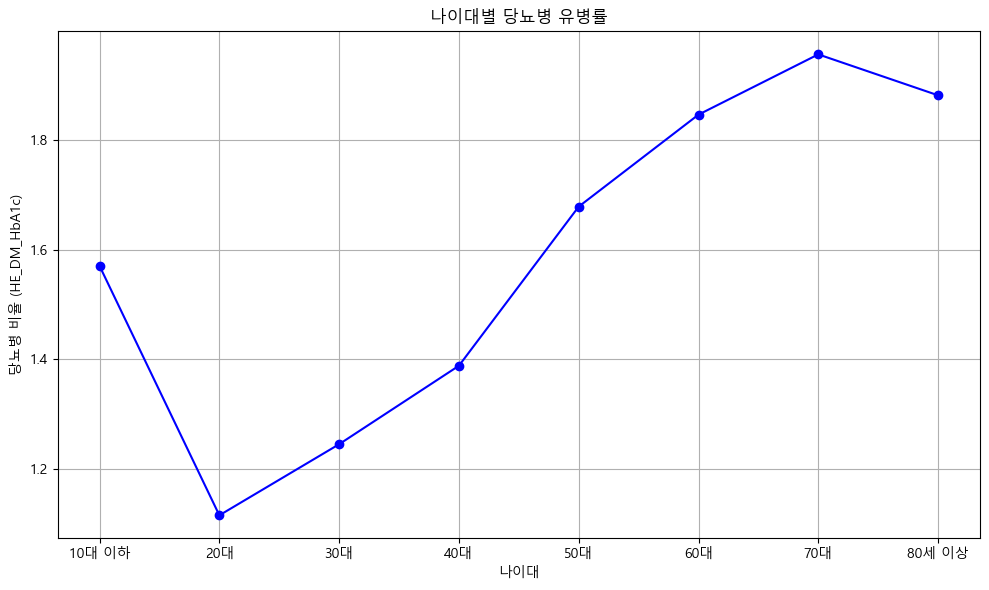

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. ÎÇòÏù¥ Í∑∏Î£π ÏÉùÏÑ± (AGE_GROUP Ïª¨Îüº Ï∂îÍ∞Ä)
bins = [0, 19, 29, 39, 49, 59, 69, 79, 120]  # 80ÏÑ∏ Ïù¥ÏÉÅ Ìè¨Ìï®
labels = ['10ÎåÄ Ïù¥Ìïò', '20ÎåÄ', '30ÎåÄ', '40ÎåÄ', '50ÎåÄ', '60ÎåÄ', '70ÎåÄ', '80ÏÑ∏ Ïù¥ÏÉÅ']

data['AGE_GROUP'] = pd.cut(data['age'], bins=bins, labels=labels, right=True)

# 2. ÎÇòÏù¥Í∑∏Î£πÎ≥Ñ ÎãπÎá®Î≥ë ÌèâÍ∑†Í∞í(= Ïú†Î≥ëÎ•†) Í≥ÑÏÇ∞
group_stats = data.groupby('AGE_GROUP')['HE_DM_HbA1c'].mean().reset_index()

# 3. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
plt.plot(group_stats['AGE_GROUP'], group_stats['HE_DM_HbA1c'], marker='o', color='blue')
plt.xlabel('ÎÇòÏù¥ÎåÄ')
plt.ylabel('ÎãπÎá®Î≥ë ÎπÑÏú® (HE_DM_HbA1c)')
plt.title('ÎÇòÏù¥ÎåÄÎ≥Ñ ÎãπÎá®Î≥ë Ïú†Î≥ëÎ•†')
plt.grid(True)
plt.tight_layout()
plt.show()

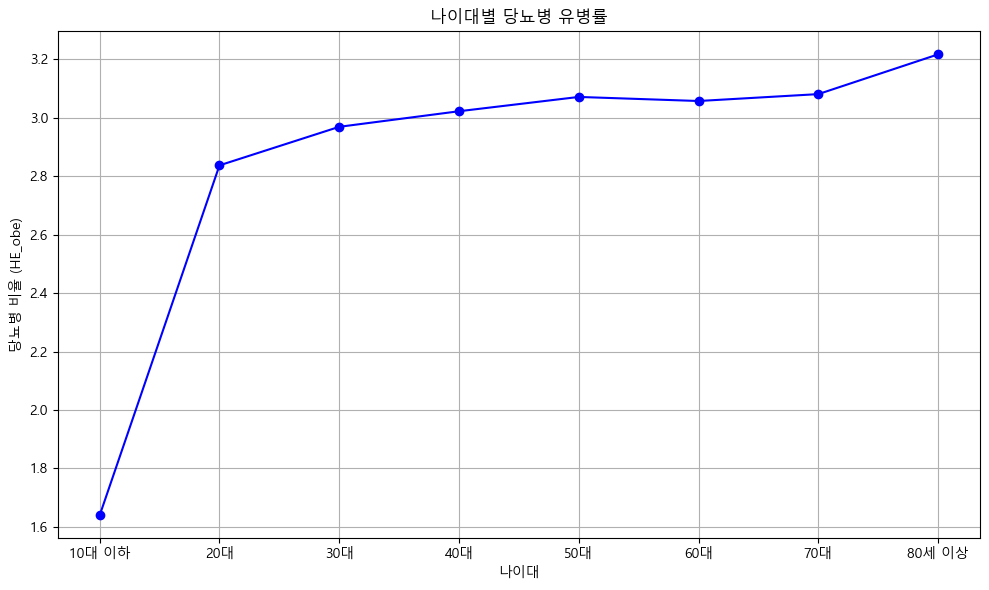

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. ÎÇòÏù¥ Í∑∏Î£π ÏÉùÏÑ± (AGE_GROUP Ïª¨Îüº Ï∂îÍ∞Ä)
bins = [0, 19, 29, 39, 49, 59, 69, 79, 120]  # 80ÏÑ∏ Ïù¥ÏÉÅ Ìè¨Ìï®
labels = ['10ÎåÄ Ïù¥Ìïò', '20ÎåÄ', '30ÎåÄ', '40ÎåÄ', '50ÎåÄ', '60ÎåÄ', '70ÎåÄ', '80ÏÑ∏ Ïù¥ÏÉÅ']

data['AGE_GROUP'] = pd.cut(data['age'], bins=bins, labels=labels, right=True)

# 2. ÎÇòÏù¥Í∑∏Î£πÎ≥Ñ ÎãπÎá®Î≥ë ÌèâÍ∑†Í∞í(= Ïú†Î≥ëÎ•†) Í≥ÑÏÇ∞
group_stats = data.groupby('AGE_GROUP')['HE_obe'].mean().reset_index()

# 3. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
plt.plot(group_stats['AGE_GROUP'], group_stats['HE_obe'], marker='o', color='blue')
plt.xlabel('ÎÇòÏù¥ÎåÄ')
plt.ylabel('ÎãπÎá®Î≥ë ÎπÑÏú® (HE_obe)')
plt.title('ÎÇòÏù¥ÎåÄÎ≥Ñ ÎãπÎá®Î≥ë Ïú†Î≥ëÎ•†')
plt.grid(True)
plt.tight_layout()
plt.show()

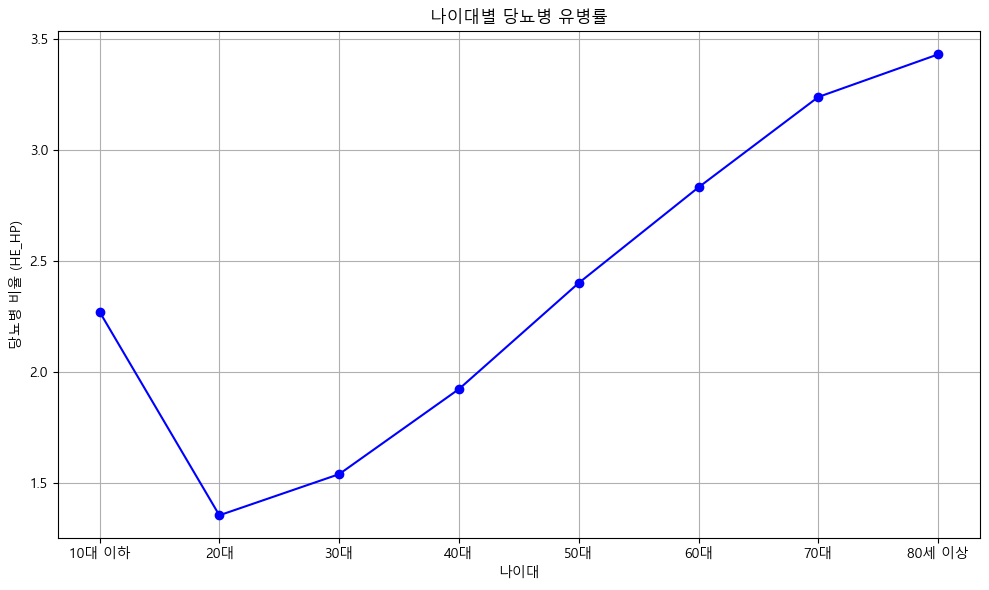

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. ÎÇòÏù¥ Í∑∏Î£π ÏÉùÏÑ± (AGE_GROUP Ïª¨Îüº Ï∂îÍ∞Ä)
bins = [0, 19, 29, 39, 49, 59, 69, 79, 120]  # 80ÏÑ∏ Ïù¥ÏÉÅ Ìè¨Ìï®
labels = ['10ÎåÄ Ïù¥Ìïò', '20ÎåÄ', '30ÎåÄ', '40ÎåÄ', '50ÎåÄ', '60ÎåÄ', '70ÎåÄ', '80ÏÑ∏ Ïù¥ÏÉÅ']

data['AGE_GROUP'] = pd.cut(data['age'], bins=bins, labels=labels, right=True)

# 2. ÎÇòÏù¥Í∑∏Î£πÎ≥Ñ ÎãπÎá®Î≥ë ÌèâÍ∑†Í∞í(= Ïú†Î≥ëÎ•†) Í≥ÑÏÇ∞
group_stats = data.groupby('AGE_GROUP')['HE_HP'].mean().reset_index()

# 3. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
plt.plot(group_stats['AGE_GROUP'], group_stats['HE_HP'], marker='o', color='blue')
plt.xlabel('ÎÇòÏù¥ÎåÄ')
plt.ylabel('ÎãπÎá®Î≥ë ÎπÑÏú® (HE_HP)')
plt.title('ÎÇòÏù¥ÎåÄÎ≥Ñ ÎãπÎá®Î≥ë Ïú†Î≥ëÎ•†')
plt.grid(True)
plt.tight_layout()
plt.show()

In [63]:
# Í∑ºÎ†•Ïö¥Îèô Í∑∏Î£πÌôî
def map_strength_exercise(val):
    if val == 1:
        return 'Ïö¥Îèô Ïïà Ìï®'
    elif val in [2, 3]:
        return 'Ï£º 1~2Ìöå'
    elif val in [4, 5]:
        return 'Ï£º 3~4Ìöå'
    elif val == 6:
        return 'Ï£º 5Ìöå Ïù¥ÏÉÅ'
    else:
        return 'Î™®Î¶Ñ'

data['BE5_1_GROUP'] = data['BE5_1'].apply(map_strength_exercise)

In [64]:
data

HE_ht  HE_wt  HE_wc     HE_BMI  HE_sbp1  HE_dbp1  HE_Upro  HE_glu  \
0      151.2   60.6   84.3  26.507517    135.0     90.0      0.0    94.0   
1      174.1   82.3   86.2  27.152029    145.0     77.0      0.0    84.0   
2      166.4   59.0   69.4  21.308131    103.0     64.0      0.0    87.0   
3      168.7   67.1   83.5  23.577207    116.0     80.0      0.0    87.0   
4      157.1   53.9   77.5  21.839183    145.0     89.0      0.0    91.0   
...      ...    ...    ...        ...      ...      ...      ...     ...   
13189  162.4   63.3   97.0  24.001128    117.0     68.0      0.0   101.0   
13190  157.3   71.7   97.0  28.977553    136.0     82.0      0.0   104.0   
13191  145.1   40.2   66.3  19.093750    127.0     81.0      0.0    90.0   
13192  172.8   74.4   87.6  24.916409    142.0     87.0      0.0   111.0   
13193  176.9   63.4   75.7  20.259727    127.0     84.0      0.0    87.0   

       HE_chol  HE_HDL_st2  HE_TG  HE_LDL_drct  HE_crea  HE_ast  HE_alt  sex  \
0        199.0        56.0  181.0        122.0     0.61    22.0    16.0  2.0   
1        122.0        48.0   63.0         63.0     0.86    28.0    18.0  1.0   
2        202.0        75.0   53.0        124.0     0.60    17.0    15.0  2.0   
3        136.0        47.0  123.0         74.0     0.90    20.0    15.0  1.0   
4        149.0        53.0  110.0         82.0     0.67    26.0    23.0  2.0   
...        ...         ...    ...          ...      ...     ...     ...  ...   
13189    193.0        38.0  188.0        124.0     1.44    18.0    12.0  1.0   
13190    223.0        71.0  110.0        150.0     0.68    17.0    13.0  2.0   
13191    178.0        46.0   91.0        123.0     0.60    18.0    11.0  2.0   
13192    261.0        36.0  167.0        201.0     1.03    22.0    19.0  1.0   
13193    209.0        60.0  443.0         98.0     0.69    96.0   112.0  1.0   

        age    year          ID  L_BR_FQ  L_LN_FQ  L_DN_FQ  L_OUT_FQ  BE5_1  \
0      56.0  2022.0  YA01220302      3.0      1.0      1.0       5.0    1.0   
1      30.0  2022.0  YA01220303      1.0      1.0      1.0       4.0    6.0   
2      25.0  2022.0  YA01220304      4.0      1.0      2.0       3.0    6.0   
3      66.0  2022.0  YA01236501      1.0      1.0      1.0       4.0    1.0   
4      62.0  2022.0  YA01236502      1.0      1.0      1.0       6.0    4.0   
...     ...     ...         ...      ...      ...      ...       ...    ...   
13189  80.0  2023.0  YR62368101      1.0      1.0      1.0       5.0    1.0   
13190  78.0  2023.0  YR62368102      1.0      1.0      1.0       5.0    5.0   
13191  61.0  2023.0  YR62370201      1.0      2.0      1.0       6.0    1.0   
13192  57.0  2023.0  YR62394401      1.0      1.0      1.0       2.0    6.0   
13193  49.0  2023.0  YR62432901      4.0      1.0      3.0       3.0    1.0   

       LS_VEG1  LS_FRUIT  HE_obe  HE_HP  HE_DM_HbA1c  DE1_dg  DI1_dg  \
0          2.0       2.0     4.0    4.0          1.0     0.0     1.0   
1          2.0       3.0     4.0    3.0          1.0     0.0     0.0   
2          2.0       2.0     2.0    1.0          1.0     0.0     0.0   
3          1.0       2.0     3.0    2.0          1.0     0.0     0.0   
4          1.0       2.0     2.0    3.0          1.0     0.0     0.0   
...        ...       ...     ...    ...          ...     ...     ...   
13189      1.0       5.0     3.0    4.0          3.0     1.0     1.0   
13190      1.0       3.0     4.0    4.0          2.0     0.0     1.0   
13191      2.0       2.0     2.0    3.0          2.0     0.0     0.0   
13192      1.0       3.0     3.0    3.0          2.0     0.0     0.0   
13193      2.0       7.0     2.0    3.0          1.0     0.0     0.0   

       HE_BMI_imputed BE5_1_GROUP AGE_GROUP  
0                   0      Ïö¥Îèô Ïïà Ìï®       50ÎåÄ  
1                   0     Ï£º 5Ìöå Ïù¥ÏÉÅ       30ÎåÄ  
2                   0     Ï£º 5Ìöå Ïù¥ÏÉÅ       20ÎåÄ  
3                   0      Ïö¥Îèô Ïïà Ìï®       60ÎåÄ  
4                   0      Ï£º 3~4Ìöå       60ÎåÄ

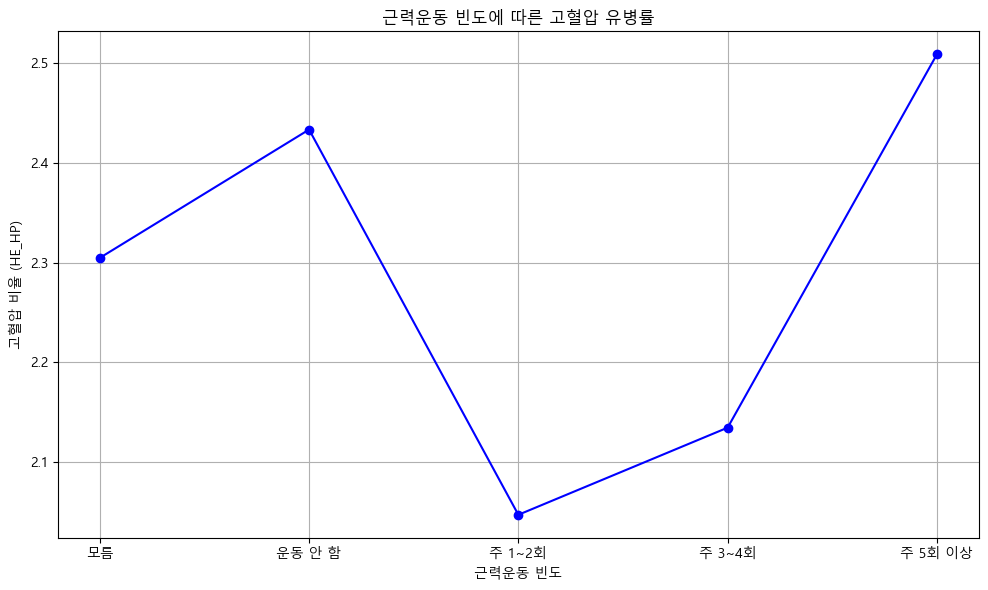

In [65]:
# BE5_1 Í∑∏Î£πÌôî (Î∞©Î≤ï 1 ÏòàÏãú ÏÇ¨Ïö©)
def map_strength_exercise(val):
    if val == 1:
        return 'Ïö¥Îèô Ïïà Ìï®'
    elif val in [2, 3]:
        return 'Ï£º 1~2Ìöå'
    elif val in [4, 5]:
        return 'Ï£º 3~4Ìöå'
    elif val == 6:
        return 'Ï£º 5Ìöå Ïù¥ÏÉÅ'
    else:
        return 'Î™®Î¶Ñ'

data['BE5_1_GROUP'] = data['BE5_1'].apply(map_strength_exercise)

# Ïö¥Îèô Í∑∏Î£πÎ≥Ñ Í≥†ÌòàÏïï ÎπÑÏú® ÌèâÍ∑† Í≥ÑÏÇ∞ (Ïòà: HE_HP Î≥ÄÏàò)
group_stats = data.groupby('BE5_1_GROUP')['HE_HP'].mean().reset_index()

# ÏÑ† Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
plt.plot(group_stats['BE5_1_GROUP'], group_stats['HE_HP'], marker='o', color='blue')
plt.xlabel('Í∑ºÎ†•Ïö¥Îèô ÎπàÎèÑ')
plt.ylabel('Í≥†ÌòàÏïï ÎπÑÏú® (HE_HP)')
plt.title('Í∑ºÎ†•Ïö¥Îèô ÎπàÎèÑÏóê Îî∞Î•∏ Í≥†ÌòàÏïï Ïú†Î≥ëÎ•†')
plt.grid(True)
plt.tight_layout()
plt.show()


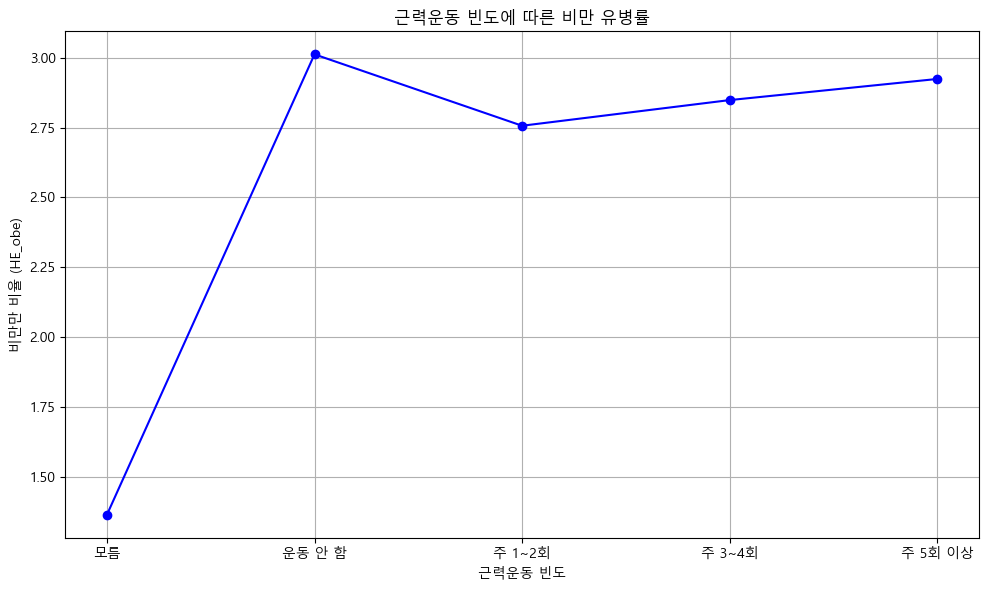

In [66]:
# BE5_1 Í∑∏Î£πÌôî (Î∞©Î≤ï 1 ÏòàÏãú ÏÇ¨Ïö©)
def map_strength_exercise(val):
    if val == 1:
        return 'Ïö¥Îèô Ïïà Ìï®'
    elif val in [2, 3]:
        return 'Ï£º 1~2Ìöå'
    elif val in [4, 5]:
        return 'Ï£º 3~4Ìöå'
    elif val == 6:
        return 'Ï£º 5Ìöå Ïù¥ÏÉÅ'
    else:
        return 'Î™®Î¶Ñ'

data['BE5_1_GROUP'] = data['BE5_1'].apply(map_strength_exercise)

# Ïö¥Îèô Í∑∏Î£πÎ≥Ñ Í≥†ÌòàÏïï ÎπÑÏú® ÌèâÍ∑† Í≥ÑÏÇ∞ (Ïòà: HE_HP Î≥ÄÏàò)
group_stats = data.groupby('BE5_1_GROUP')['HE_obe'].mean().reset_index()

# ÏÑ† Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
plt.plot(group_stats['BE5_1_GROUP'], group_stats['HE_obe'], marker='o', color='blue')
plt.xlabel('Í∑ºÎ†•Ïö¥Îèô ÎπàÎèÑ')
plt.ylabel('ÎπÑÎßåÎßå ÎπÑÏú® (HE_obe)')
plt.title('Í∑ºÎ†•Ïö¥Îèô ÎπàÎèÑÏóê Îî∞Î•∏ ÎπÑÎßå Ïú†Î≥ëÎ•†')
plt.grid(True)
plt.tight_layout()
plt.show()


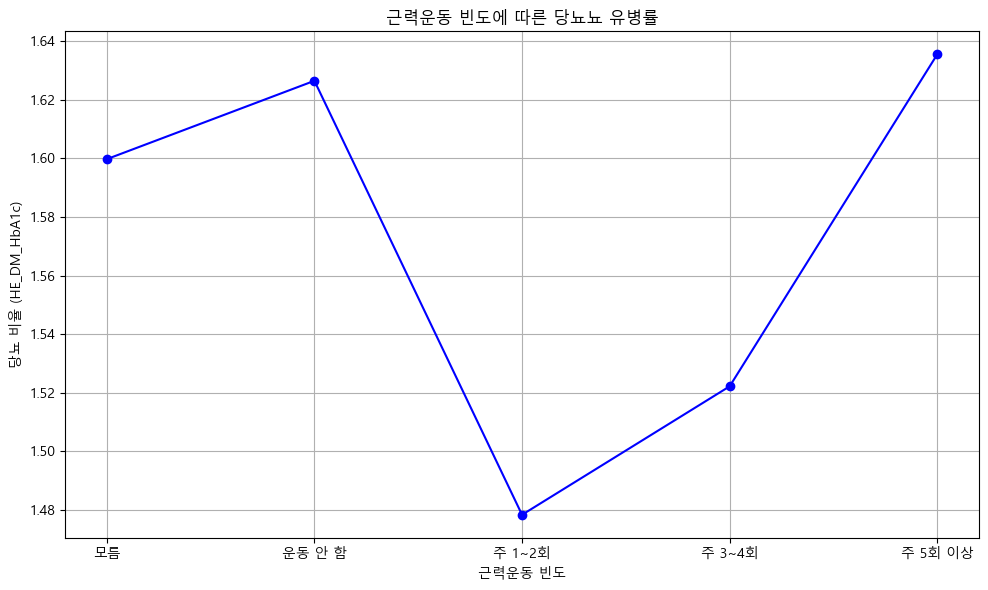

In [67]:
# BE5_1 Í∑∏Î£πÌôî (Î∞©Î≤ï 1 ÏòàÏãú ÏÇ¨Ïö©)
def map_strength_exercise(val):
    if val == 1:
        return 'Ïö¥Îèô Ïïà Ìï®'
    elif val in [2, 3]:
        return 'Ï£º 1~2Ìöå'
    elif val in [4, 5]:
        return 'Ï£º 3~4Ìöå'
    elif val == 6:
        return 'Ï£º 5Ìöå Ïù¥ÏÉÅ'
    else:
        return 'Î™®Î¶Ñ'

data['BE5_1_GROUP'] = data['BE5_1'].apply(map_strength_exercise)

# Ïö¥Îèô Í∑∏Î£πÎ≥Ñ Í≥†ÌòàÏïï ÎπÑÏú® ÌèâÍ∑† Í≥ÑÏÇ∞ (Ïòà: HE_HP Î≥ÄÏàò)
group_stats = data.groupby('BE5_1_GROUP')['HE_DM_HbA1c'].mean().reset_index()

# ÏÑ† Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
plt.plot(group_stats['BE5_1_GROUP'], group_stats['HE_DM_HbA1c'], marker='o', color='blue')
plt.xlabel('Í∑ºÎ†•Ïö¥Îèô ÎπàÎèÑ')
plt.ylabel('ÎãπÎá® ÎπÑÏú® (HE_DM_HbA1c)')
plt.title('Í∑ºÎ†•Ïö¥Îèô ÎπàÎèÑÏóê Îî∞Î•∏ ÎãπÎá®Îá® Ïú†Î≥ëÎ•†')
plt.grid(True)
plt.tight_layout()
plt.show()


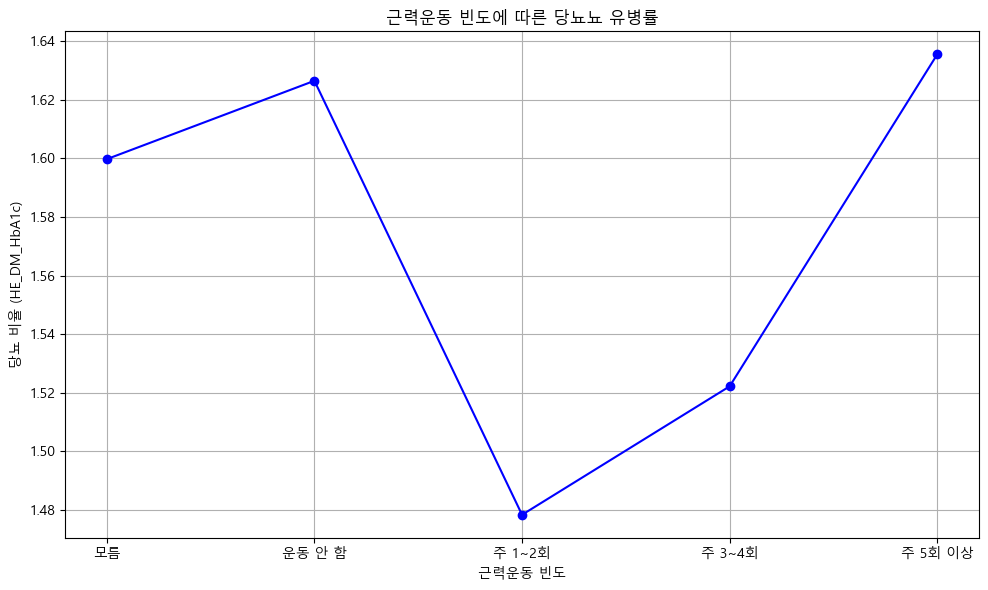

In [68]:
# BE5_1 Í∑∏Î£πÌôî (Î∞©Î≤ï 1 ÏòàÏãú ÏÇ¨Ïö©)
def map_strength_exercise(val):
    if val == 1:
        return 'Ïö¥Îèô Ïïà Ìï®'
    elif val in [2, 3]:
        return 'Ï£º 1~2Ìöå'
    elif val in [4, 5]:
        return 'Ï£º 3~4Ìöå'
    elif val == 6:
        return 'Ï£º 5Ìöå Ïù¥ÏÉÅ'
    else:
        return 'Î™®Î¶Ñ'

data['BE5_1_GROUP'] = data['BE5_1'].apply(map_strength_exercise)

# Ïö¥Îèô Í∑∏Î£πÎ≥Ñ Í≥†ÌòàÏïï ÎπÑÏú® ÌèâÍ∑† Í≥ÑÏÇ∞ (Ïòà: HE_HP Î≥ÄÏàò)
group_stats = data.groupby('BE5_1_GROUP')['HE_DM_HbA1c'].mean().reset_index()

# ÏÑ† Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
plt.plot(group_stats['BE5_1_GROUP'], group_stats['HE_DM_HbA1c'], marker='o', color='blue')
plt.xlabel('Í∑ºÎ†•Ïö¥Îèô ÎπàÎèÑ')
plt.ylabel('ÎãπÎá® ÎπÑÏú® (HE_DM_HbA1c)')
plt.title('Í∑ºÎ†•Ïö¥Îèô ÎπàÎèÑÏóê Îî∞Î•∏ ÎãπÎá®Îá® Ïú†Î≥ëÎ•†')
plt.grid(True)
plt.tight_layout()
plt.show()


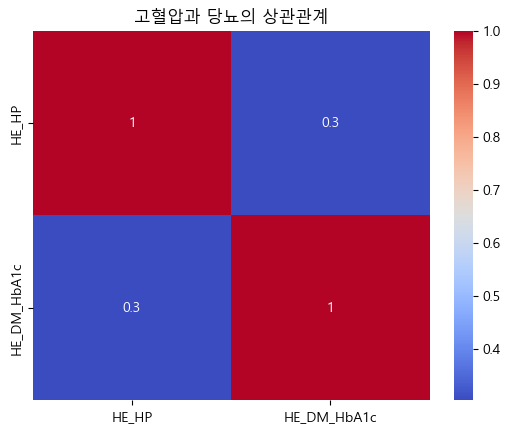

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Í≥†ÌòàÏïï Ïó¨Î∂ÄÏôÄ ÎãπÎá® Ïó¨Î∂ÄÍ∞Ä Í∞ÅÍ∞Å 0/1Î°ú ÏûàÎäî Í≤ΩÏö∞
sns.heatmap(data[['HE_HP', 'HE_DM_HbA1c']].corr(), annot=True, cmap='coolwarm')
plt.title('Í≥†ÌòàÏïïÍ≥º ÎãπÎá®Ïùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ')
plt.show()


In [27]:
# Í≥†ÌòàÏïï Ïó¨Î∂ÄÏóê Îî∞Î•∏ ÎãπÎá®Ïú® ÌôïÏù∏
pd.crosstab(data['HE_HP'], data['HE_DM_HbA1c'], normalize='index') * 100


HE_DM_HbA1c        1.0        2.0        3.0
HE_HP                                       
1.0          69.119918  22.782639   8.097444
2.0          54.258373  31.866029  13.875598
3.0          52.550741  35.271530  12.177729
4.0          36.713364  36.624416  26.662219

**ÎãπÎá®Î≥ë ÏòàÏ∏° Î™®Îç∏ ÏÑ†Ï†ï**

In [72]:
!pip install lightgbm

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
    --------------------------------------- 0.0/1.5 MB 435.7 kB/s eta 0:00:04
   --- ------------------------------------ 0.1/1.5 MB 1.2 MB/s eta 0:00:02
   ------------ --------------------------- 0.5/1.5 MB 3.0 MB/s eta 0:00:01
   ------------------------ --------------- 0.9/1.5 MB 4.3 MB/s eta 0:00:01
   ---------------------------------------  1.4/1.5 MB 5.7 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 4.9 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\Ïû•ÎèôÎØº\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



‚ñ∂ Mean F1 score (CV) of D_tree: 76.05%
‚ñ∂ Test F1 score of D_tree: 71.17%
‚ñ∂ Test Accuracy of D_tree: 71.09%

‚ñ∂ Mean F1 score (CV) of RF: 76.78%
‚ñ∂ Test F1 score of RF: 75.31%
‚ñ∂ Test Accuracy of RF: 75.79%

‚ñ∂ Mean F1 score (CV) of HistGB: 77.04%
‚ñ∂ Test F1 score of HistGB: 74.33%
‚ñ∂ Test Accuracy of HistGB: 74.54%

‚ñ∂ Mean F1 score (CV) of XGB: 77.27%
‚ñ∂ Test F1 score of XGB: 75.24%
‚ñ∂ Test Accuracy of XGB: 75.41%
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000517 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2095
[LightGBM] [Info] Number of data points in the train set: 8444, number of used features: 10
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000549 seconds.
You can set

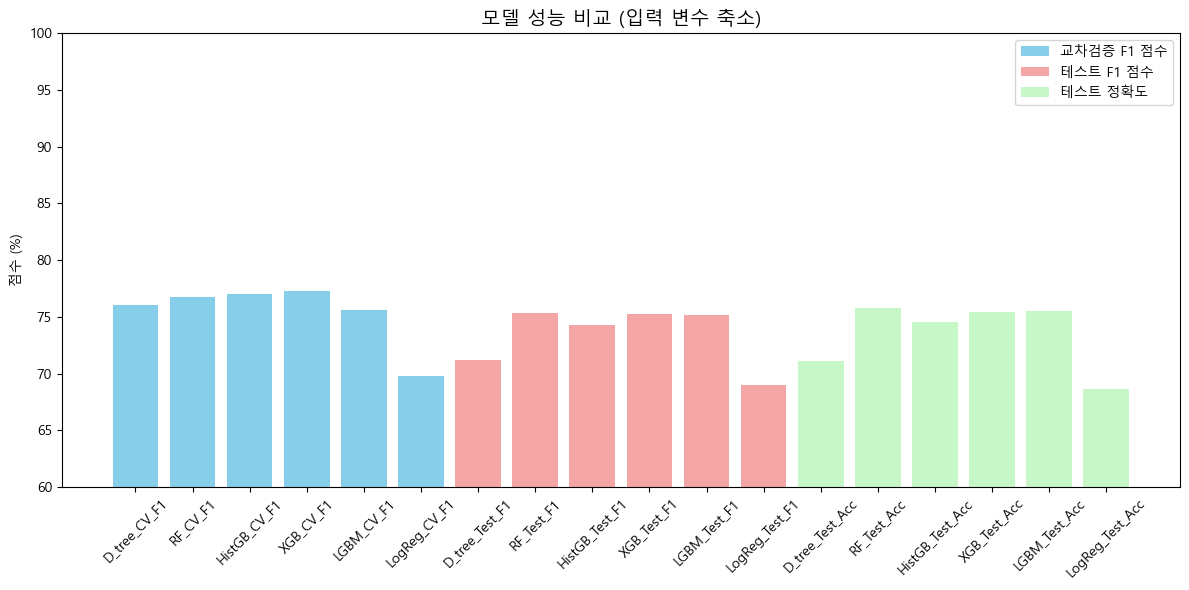

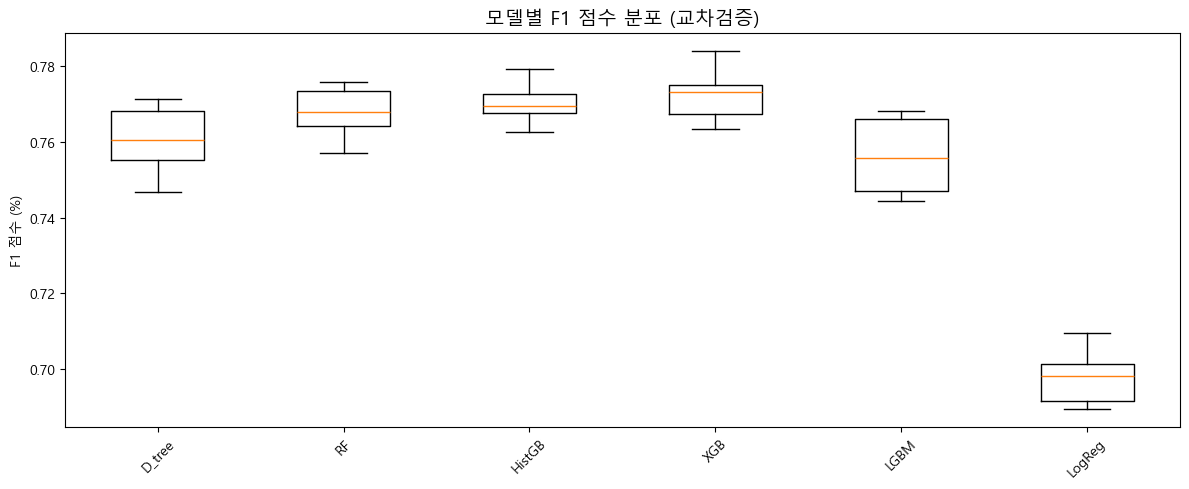

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# ÏûÖÎ†• ÌîºÏ≤ò Î∞è ÌÉÄÍ≤ü ÏÑ§Ï†ï
HE_DM_HbA1c_input_features = ['HE_glu', 'HE_wc',  'HE_sbp1', 'HE_BMI', 'HE_TG', 'HE_chol', 'HE_LDL_drct', 'HE_HDL_st2', 'sex', 'age']
X = data[HE_DM_HbA1c_input_features]
y = data['HE_DM_HbA1c'].astype(int) - 1

# ÌõàÎ†®/ÌÖåÏä§Ìä∏ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# SMOTEÎ°ú Ïò§Î≤ÑÏÉòÌîåÎßÅ
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Î∂ÑÎ•òÍ∏∞ Ï†ïÏùò
classifiers = [
    ('D_tree', DecisionTreeClassifier(max_depth=3, min_samples_split=10, random_state=0, class_weight='balanced')),
    ('RF', RandomForestClassifier(n_estimators=50, max_depth=5, random_state=0, class_weight='balanced')),
    ('HistGB', HistGradientBoostingClassifier(learning_rate=0.1, max_iter=100, random_state=0)),
    ('XGB', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0)),
    ('LGBM', LGBMClassifier(random_state=0, class_weight='balanced')),
    ('LogReg', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=0))
]

classifier_names = [name for name, _ in classifiers]
classifiers = [clf for _, clf in classifiers]

# Í≤∞Í≥º Ï†ÄÏû•Ïö© Î¶¨Ïä§Ìä∏
modelaccuracies = []
modelmeans = []
modelnames = []
modeltest_f1 = []
modeltest_acc = []

# Î™®Îç∏ ÌõàÎ†® Î∞è ÌèâÍ∞Ä
for classifier_name, classifier in zip(classifier_names, classifiers):
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    accuracies = cross_val_score(classifier, X_train, y_train, cv=skf, scoring='f1_weighted')
    print(f"\n‚ñ∂ Mean F1 score (CV) of {classifier_name}: {accuracies.mean()*100:.2f}%")
    modelaccuracies.append(accuracies)
    modelnames.append(classifier_name)
    modelmeans.append(accuracies.mean()*100)

    classifier.fit(X_train_smote, y_train_smote)
    y_pred = classifier.predict(X_test)
    test_f1 = f1_score(y_test, y_pred, average='weighted')
    test_acc = accuracy_score(y_test, y_pred)
    modeltest_f1.append(test_f1*100)
    modeltest_acc.append(test_acc*100)
    print(f"‚ñ∂ Test F1 score of {classifier_name}: {test_f1*100:.2f}%")
    print(f"‚ñ∂ Test Accuracy of {classifier_name}: {test_acc*100:.2f}%")

# ÏÑ±Îä• Î∞î Ï∞®Ìä∏ (CV, Test F1, Test Accuracy)
plt.figure(figsize=(12, 6))
plt.ylim([60, 100])
plt.bar([name + "_CV_F1" for name in modelnames], modelmeans, color='skyblue', label='ÍµêÏ∞®Í≤ÄÏ¶ù F1 Ï†êÏàò')
plt.bar([name + "_Test_F1" for name in modelnames], modeltest_f1, color='lightcoral', label='ÌÖåÏä§Ìä∏ F1 Ï†êÏàò', alpha=0.7)
plt.bar([name + "_Test_Acc" for name in modelnames], modeltest_acc, color='lightgreen', label='ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑ', alpha=0.5)

plt.xticks(rotation=45)
plt.ylabel('Ï†êÏàò (%)')
plt.title('Î™®Îç∏ ÏÑ±Îä• ÎπÑÍµê (ÏûÖÎ†• Î≥ÄÏàò Ï∂ïÏÜå)', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

# Boxplot (CV F1 Î∂ÑÌè¨)
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)
ax.boxplot(modelaccuracies)
ax.set_xticklabels(modelnames, rotation=45)
ax.set_ylabel('F1 Ï†êÏàò (%)')
ax.set_title('Î™®Îç∏Î≥Ñ F1 Ï†êÏàò Î∂ÑÌè¨ (ÍµêÏ∞®Í≤ÄÏ¶ù)', fontsize=14)
plt.tight_layout()
plt.show()


        
| Model   | CV F1(ÍµêÏ∞® Í≤ÄÏ¶ù) (%) | Test F1 (%) | Test Accuracy (%)  |
| ------- |      ---------      | ----------- | ----------------- |
| D_tree  |        75.17        |   75.60     |     76.77         |
| RF      |        76.26        |   74.83     |     75.41         |
| HistGB  |        77.58        |   74.31     |     74.50         |
| XGB     |        77.78        |   74.44     |     74.69         |
| LGBM    |        76.42        |   74.71     |     75.14         |
| LogReg  |        69.58        |   67.66     |     67.41         |


- CV F1 vs Test F1: Í≥ºÎåÄÏ†ÅÌï© Ï†ïÎèÑ ÌååÏïÖ. CV F1Ïù¥ ÎÜíÍ≥† Test F1Ïù¥ ÎÇÆÏúºÎ©¥ Í≥ºÎåÄÏ†ÅÌï© ÏùòÏã¨.
- Test F1 vs Test Accuracy: ÌÅ¥ÎûòÏä§ Î∂àÍ∑†Ìòï Î¨∏Ï†úÏùò ÏòÅÌñ• Ï†ïÎèÑ ÌååÏïÖ. AccuracyÍ∞Ä F1Î≥¥Îã§ ÌòÑÏ†ÄÌûà ÎÜíÏúºÎ©¥ Î∂àÍ∑†Ìòï ÏòÅÌñ• ÌÅ¨Í≥†, Î™®Îç∏Ïù¥ ÏÜåÏàò ÌÅ¥ÎûòÏä§Î•º Ïûò Î™ª ÎßûÏ∂îÍ≥† ÏûàÏùÑ Í∞ÄÎä•ÏÑ± ÎÜíÏùå.
- Í∞Å Î™®Îç∏Ïùò CV F1: Ïó¨Îü¨ Î™®Îç∏ Ï§ë Ïñ¥Îñ§ Î™®Îç∏Ïù¥ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥ Ï†ÑÎ∞òÏ†ÅÏù∏ ÏùºÎ∞òÌôî Ïû†Ïû¨Î†•Ïù¥ ÎÜíÏùÄÏßÄ ÎπÑÍµê.
- Í∞Å Î™®Îç∏Ïùò Test F1: Î∂àÍ∑†Ìòï ÏÉÅÌô©ÏùÑ Í≥†Î†§ÌñàÏùÑ Îïå, ÏµúÏ¢ÖÏ†ÅÏúºÎ°ú Ïñ¥Îñ§ Î™®Îç∏Ïù¥ Ïã§Ï†ú Î≥¥ÏßÄ Î™ªÌïú Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥ Í∞ÄÏû• Ï¢ãÏùÄ Ï¢ÖÌï©Ï†ÅÏù∏ ÏòàÏ∏° ÏÑ±Îä•ÏùÑ Î≥¥Ïù¥ÎäîÏßÄ ÎπÑÍµê.
- Í∞Å Î™®Îç∏Ïùò Test Accuracy: Î™®Îç∏Î≥Ñ Ï†ÑÎ∞òÏ†ÅÏù∏ ÏòàÏ∏° ÏÑ±Í≥µÎ•† ÎπÑÍµê (F1Í≥º Ìï®Íªò Î≥¥Î©∞ Î∂àÍ∑†Ìòï ÏòÅÌñ• Í≥†Î†§).

‚úÖ Ï†ÑÎ∞òÏ†ÅÏù∏ Í≤∞Î°†
XGBÏôÄ HistGBÍ∞Ä CV(ÍµêÏ∞®Í≤ÄÏ¶ù) ÏÑ±Îä•ÏóêÏÑúÎäî Í∞ÄÏû• ÎÜíÏùå, 
ÌïòÏßÄÎßå ÌÖåÏä§Ìä∏ F1ÏóêÏÑúÎäî ÏÜåÌè≠ ÌïòÎùΩÌïòÏó¨, Ïã§Ï†ú ÏùºÎ∞òÌôî ÏÑ±Îä•ÏóêÏÑúÎäî D_treeÏôÄ ÌÅ∞ Ï∞®Ïù¥Îäî ÏóÜÏùå.

D_treeÎäî Í∞ÄÏû• Îã®ÏàúÌïòÏßÄÎßå, ÌÖåÏä§Ìä∏ ÏÑ±Îä•Ïù¥ Í∞ÄÏû• Ï¢ãÏùå (F1, Accuracy Î™®Îëê).

LogRegÏùÄ ÏÑ±Îä•Ïù¥ Í∞ÄÏû• ÎÇÆÏùå, Î≥µÏû°Ìïú ÎπÑÏÑ†Ìòï Î∂ÑÌè¨Î•º Ï∂©Î∂ÑÌûà ÏÑ§Î™ÖÌïòÏßÄ Î™ªÌï®ÏùÑ ÏãúÏÇ¨.

üìå Î™®Îç∏Î≥Ñ Í∞ÑÎã® ÌèâÍ∞Ä
- **D_tree (Í≤∞Ï†ïÌä∏Î¶¨)**

üéØ ÌÖåÏä§Ìä∏ÏóêÏÑú Í∞ÄÏû• ÎÜíÏùÄ F1 (75.60%) Î∞è Ï†ïÌôïÎèÑ (76.77%)

Î™®Îç∏Ïù¥ Îã®ÏàúÌïòÏßÄÎßå SMOTE Î∞è Ï†ÅÏ†àÌïú ÌååÎùºÎØ∏ÌÑ∞ ÏÑ§Ï†ï ÎçïÏóê Ïûò ÏûëÎèôÌï®.

ÏùºÎ∞òÌôî ÏûòÎê®, Ïò§ÌûàÎ†§ Î≥µÏû°Ìïú Î™®Îç∏Î≥¥Îã§ ÏïàÏ†ïÏ†ÅÏùº Ïàò ÏûàÏùå.

- **RF (ÎûúÎç§Ìè¨Î†àÏä§Ìä∏)**

ÏùºÎ∞òÌôî ÏÑ±Îä•ÏùÄ Ï¢ãÏïòÏúºÎÇò ÌÖåÏä§Ìä∏ÏóêÏÑú ÏïΩÍ∞Ñ ÎÇÆÏïÑÏßê.

ÏïôÏÉÅÎ∏î ÌäπÏÑ±ÏÉÅ Î≥µÏû°ÌïòÏßÄÎßå Ïò§Î≤ÑÌîºÌåÖÏùÄ ÌÅ¨Í≤å ÏóÜÏùå.

- **HistGB / XGB / LGBM**

Î™®Îëê Gradient Boosting Í≥ÑÏó¥. CVÏóêÏÑúÎäî Í∞ÄÏû• Ï¢ãÏßÄÎßå ÌÖåÏä§Ìä∏ÏóêÏÑúÎäî ÏÜåÌè≠ ÌïòÎùΩ.

Îç∞Ïù¥ÌÑ∞Ïùò ÏûëÏùÄ Î≥ÄÎèôÏóê ÎØºÍ∞êÌï† Ïàò ÏûàÏùå.

Í≥ºÏ†ÅÌï© Í∞ÄÎä•ÏÑ± ÏïΩÍ∞Ñ ÏûàÏùå (CV ÏÑ±Îä• ÎåÄÎπÑ ÌÖåÏä§Ìä∏ ÏÑ±Îä• ÌïòÎùΩ).

- **LogReg (Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä)**

Í∞ÄÏû• Îã®ÏàúÌïú Î™®Îç∏. ÎπÑÏÑ†Ìòï Í¥ÄÍ≥ÑÎ•º Ï∂©Î∂ÑÌûà ÏÑ§Î™ÖÌïòÏßÄ Î™ªÌï®.

Îç∞Ïù¥ÌÑ∞ Î≥µÏû°ÎèÑ ÎåÄÎπÑ Î∂ÄÏ°±Ìïú ÌëúÌòÑÎ†• ‚Üí ÏÑ±Îä• Ï†ÄÏ°∞.

**HistGBÎ°ú Î™®Îç∏ ÏÑ†Ï†ï**

              precision    recall  f1-score   support

          Ï†ïÏÉÅ       0.83      0.81      0.82      1442
      Í≤ΩÍ≥ÑÌòï ÎãπÎá®       0.66      0.65      0.66       796
          ÎãπÎá®       0.58      0.62      0.60       401

    accuracy                           0.74      2639
   macro avg       0.69      0.70      0.69      2639
weighted avg       0.74      0.74      0.74      2639



<Figure size 600x600 with 0 Axes>

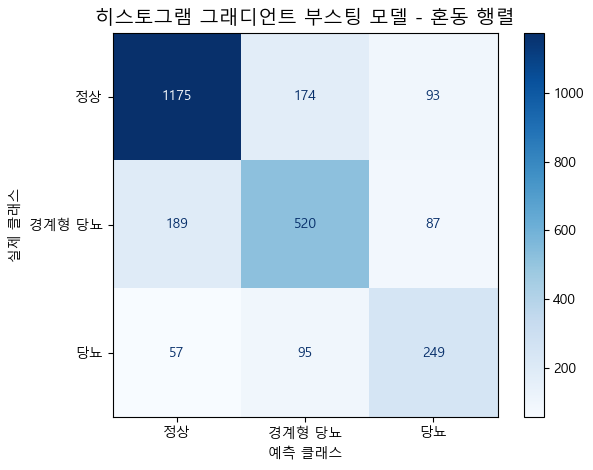

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, f1_score, accuracy_score
from imblearn.over_sampling import SMOTE
import shap
import matplotlib.pyplot as plt

HE_DM_HbA1c_input_features = ['HE_glu', 'HE_wc',  'HE_sbp1', 'HE_BMI', 'HE_TG', 'HE_chol', 'HE_LDL_drct', 'HE_HDL_st2', 'sex', 'age']

# XÏôÄ y Ï†ïÏùò
X = data[HE_DM_HbA1c_input_features]
y = data['HE_DM_HbA1c'].astype(int) - 1

# ÌõàÎ†®/ÌÖåÏä§Ìä∏ Î∂ÑÌï† Î®ºÏ†Ä ÏàòÌñâ
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏóêÎßå fit_transform
X_test_scaled = scaler.transform(X_test)  # ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏóêÎäî transformÎßå Ï†ÅÏö©

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
# SMOTEÎ•º Ïä§ÏºÄÏùºÎßÅÎêú ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïóê Ï†ÅÏö©
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)


from sklearn.metrics import classification_report

# HistGradientBoostingClassifierÎ°ú ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏°
best_model = HistGradientBoostingClassifier(learning_rate=0.1, max_iter=100, random_state=42)
best_model.fit(X_train_smote, y_train_smote)
y_pred = best_model.predict(X_test_scaled)

# ÌÅ¥ÎûòÏä§ Ïù¥Î¶Ñ ÌïúÍ∏ÄÎ°ú Ï†ïÏùò
target_names_kor = ['Ï†ïÏÉÅ', 'Í≤ΩÍ≥ÑÌòï ÎãπÎá®', 'ÎãπÎá®']

# ÌèâÍ∞Ä ÏßÄÌëú Ï∂úÎ†• (ÌïúÍ∏Ä ÌÅ¥ÎûòÏä§Î™Ö)
print(classification_report(y_test, y_pred, target_names=target_names_kor))

# ÌèâÍ∞Ä ÏßÄÌëú Î∞è ÌòºÎèôÌñâÎ†¨
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(class_report).transpose()

# ÌòºÎèô ÌñâÎ†¨ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(6, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=target_names_kor)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("ÌûàÏä§ÌÜ†Í∑∏Îû® Í∑∏ÎûòÎîîÏñ∏Ìä∏ Î∂ÄÏä§ÌåÖ Î™®Îç∏ - ÌòºÎèô ÌñâÎ†¨", fontsize=14)
plt.xlabel("ÏòàÏ∏° ÌÅ¥ÎûòÏä§")
plt.ylabel("Ïã§Ï†ú ÌÅ¥ÎûòÏä§")
plt.tight_layout()
plt.show()

# classification_report DataFrame Î≥ÄÌôò (ÏÑ†ÌÉù)
class_report = classification_report(y_test, y_pred, target_names=target_names_kor, output_dict=True)
report_df = pd.DataFrame(class_report).transpose()

**ÌÅ¥ÎûòÏä§ Î∂àÍ∑†Ìòï Ìï¥Í≤∞ÌïòÍ∏∞**

In [102]:
!pip uninstall imbalanced-learn

^C


In [91]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, f1_score, accuracy_score
from imblearn.over_sampling import SMOTE
import shap
import matplotlib.pyplot as plt


HE_DM_HbA1c_input_features = ['HE_glu', 'HE_wc',  'HE_sbp1', 'HE_BMI', 'HE_TG', 'HE_chol', 'HE_LDL_drct', 'HE_HDL_st2']
#  'sex', 'age'
# XÏôÄ y Ï†ïÏùò
X = data[HE_DM_HbA1c_input_features]
y = data['HE_DM_HbA1c'].astype(int) - 1

# ÌõàÎ†®/ÌÖåÏä§Ìä∏ Î∂ÑÌï† Î®ºÏ†Ä ÏàòÌñâ
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏóêÎßå fit_transform
X_test_scaled = scaler.transform(X_test)  # ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏóêÎäî transformÎßå Ï†ÅÏö©


from sklearn.metrics import classification_report

from sklearn.utils.class_weight import compute_class_weight

# ÌÅ¥ÎûòÏä§ Í∞ÄÏ§ëÏπò Í≥ÑÏÇ∞ ('balanced'Îäî ÎπàÎèÑÏàòÏóê Î∞òÎπÑÎ°ÄÌïòÏó¨ ÏûêÎèô Í≥ÑÏÇ∞)
# compute_class_weight Ìï®ÏàòÏóê ÏõêÎ≥∏ ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïùò y Í∞íÏùÑ Ï†ÑÎã¨Ìï¥Ïïº Ìï©ÎãàÎã§.
# ÎßåÏïΩ SMOTE Ï†ÅÏö© ÌõÑÏùò Îç∞Ïù¥ÌÑ∞Î°ú Í∞ÄÏ§ëÏπòÎ•º Í≥ÑÏÇ∞ÌïòÍ≥† Ïã∂Îã§Î©¥ y_train_smoteÎ•º Ï†ÑÎã¨Ìï©ÎãàÎã§.
classes = np.unique(y_train) # ÏõêÎ≥∏ ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïùò ÌÅ¥ÎûòÏä§ Î†àÏù¥Î∏î
weights = compute_class_weight('balanced', classes=classes, y=y_train)

# Í≥ÑÏÇ∞Îêú Í∞ÄÏ§ëÏπòÎ•º ÎîïÏÖîÎÑàÎ¶¨ ÌòïÌÉúÎ°ú Î≥ÄÌôò {ÌÅ¥ÎûòÏä§_ÎùºÎ≤®: Í∞ÄÏ§ëÏπò}
class_weights_dict = dict(zip(classes, weights))

print(f"Í≥ÑÏÇ∞Îêú ÌÅ¥ÎûòÏä§ Í∞ÄÏ§ëÏπò: {class_weights_dict}")


# HistGradientBoostingClassifier Î™®Îç∏ ÌïôÏäµ (class_weight Ï†ÅÏö©)
# best_model = HistGradientBoostingClassifier(learning_rate=0.1, max_iter=100, random_state=42) # Í∏∞Ï°¥ Î™®Îç∏
# class_weight Îß§Í∞úÎ≥ÄÏàò Ï∂îÍ∞Ä
best_model_weighted = HistGradientBoostingClassifier(
    learning_rate=0.1,
    max_iter=100,
    random_state=42,
    class_weight=class_weights_dict # ÎòêÎäî 'balanced' Î¨∏ÏûêÏó¥ ÏÇ¨Ïö© Í∞ÄÎä•
)

# Ïä§ÏºÄÏùºÎßÅÎêú ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Î°ú ÌïôÏäµ (SMOTE ÎØ∏Ï†ÅÏö© Ïãú X_train_scaled ÏÇ¨Ïö©)
# ÎßåÏïΩ SMOTE Í≤∞Í≥ºÎ•º ÏÇ¨Ïö©ÌïúÎã§Î©¥ X_train_smote_scaled (SMOTE ÌõÑ Ïä§ÏºÄÏùºÎßÅÎêú Îç∞Ïù¥ÌÑ∞) ÏÇ¨Ïö©
best_model_weighted.fit(X_train_scaled, y_train)

# Ïä§ÏºÄÏùºÎßÅÎêú ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î°ú ÏòàÏ∏°
y_pred_weighted = best_model_weighted.predict(X_test_scaled)

# ÏÑ±Îä• ÌèâÍ∞Ä
print("\nClass Weight Ï†ÅÏö© ÌõÑ Classification Report:")
# y_testÎäî ÏõêÎ≥∏ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò ÎùºÎ≤®ÏûÖÎãàÎã§. ÏòàÏ∏° Í≤∞Í≥ºÏôÄ ÎπÑÍµêÌï©ÎãàÎã§.
print(classification_report(y_test, y_pred_weighted))

# Ï∂îÍ∞ÄÏ†ÅÏúºÎ°ú F1 Ïä§ÏΩîÏñ¥Î•º Í∞Å ÌÅ¥ÎûòÏä§Î≥ÑÎ°ú ÌôïÏù∏ÌïòÏó¨ Í∞úÏÑ†ÎêòÏóàÎäîÏßÄ ÎπÑÍµêÌï©ÎãàÎã§.
f1_weighted = f1_score(y_test, y_pred_weighted, average=None)
print(f"\nClass Weight Ï†ÅÏö© ÌõÑ ÌÅ¥ÎûòÏä§Î≥Ñ F1-score: {f1_weighted}")

Í≥ÑÏÇ∞Îêú ÌÅ¥ÎûòÏä§ Í∞ÄÏ§ëÏπò: {np.int64(0): np.float64(0.6097643783526856), np.int64(1): np.float64(1.1090527355810793), np.int64(2): np.float64(2.181729834791059)}

Class Weight Ï†ÅÏö© ÌõÑ Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1227
           1       0.78      0.68      0.72       675
           2       0.71      0.71      0.71       343

    accuracy                           0.81      2245
   macro avg       0.78      0.77      0.77      2245
weighted avg       0.81      0.81      0.81      2245


Class Weight Ï†ÅÏö© ÌõÑ ÌÅ¥ÎûòÏä§Î≥Ñ F1-score: [0.8836478  0.72209026 0.70863836]


ShapÎ°ú Feature importance ÌôïÏù∏

ÏÉÅÍ¥Ä ÌñâÎ†¨ ÏÉòÌîå:
           HE_glu     HE_wc   HE_sbp1    HE_BMI     HE_TG   HE_chol  \
HE_glu   1.000000 -0.140642 -0.008619 -0.075297  0.013952 -0.177513   
HE_wc   -0.140642  1.000000  0.207662  0.202314  0.069464 -0.208419   
HE_sbp1 -0.008619  0.207662  1.000000 -0.020210  0.030679 -0.100094   
HE_BMI  -0.075297  0.202314 -0.020210  1.000000  0.099556  0.028767   
HE_TG    0.013952  0.069464  0.030679  0.099556  1.000000  0.008065   

         HE_LDL_drct  HE_HDL_st2  
HE_glu      0.007295    0.028159  
HE_wc      -0.096517   -0.011022  
HE_sbp1    -0.019406    0.015914  
HE_BMI      0.006691    0.061834  
HE_TG      -0.062410    0.096657  

 ÏÉÅÍ¥Ä ÌñâÎ†¨ ÏÉòÌîå:
            Í≥µÎ≥µÌòàÎãπ  ÌóàÎ¶¨ÎëòÎ†à(cm)  ÏàòÏ∂ïÍ∏∞ ÌòàÏïï  Ï≤¥ÏßàÎüâÏßÄÏàò(BMI)  Ï§ëÏÑ±ÏßÄÎ∞©  Ï¥ù ÏΩúÎ†àÏä§ÌÖåÎ°§  LDL ÏΩúÎ†àÏä§ÌÖåÎ°§  \
Í≥µÎ≥µÌòàÎãπ        1.00     -0.14   -0.01       -0.08  0.01    -0.18       0.01   
ÌóàÎ¶¨ÎëòÎ†à(cm)   -0.14      1.00    0.21        0.20  0.07    -0.21      -0.10   
ÏàòÏ∂ïÍ

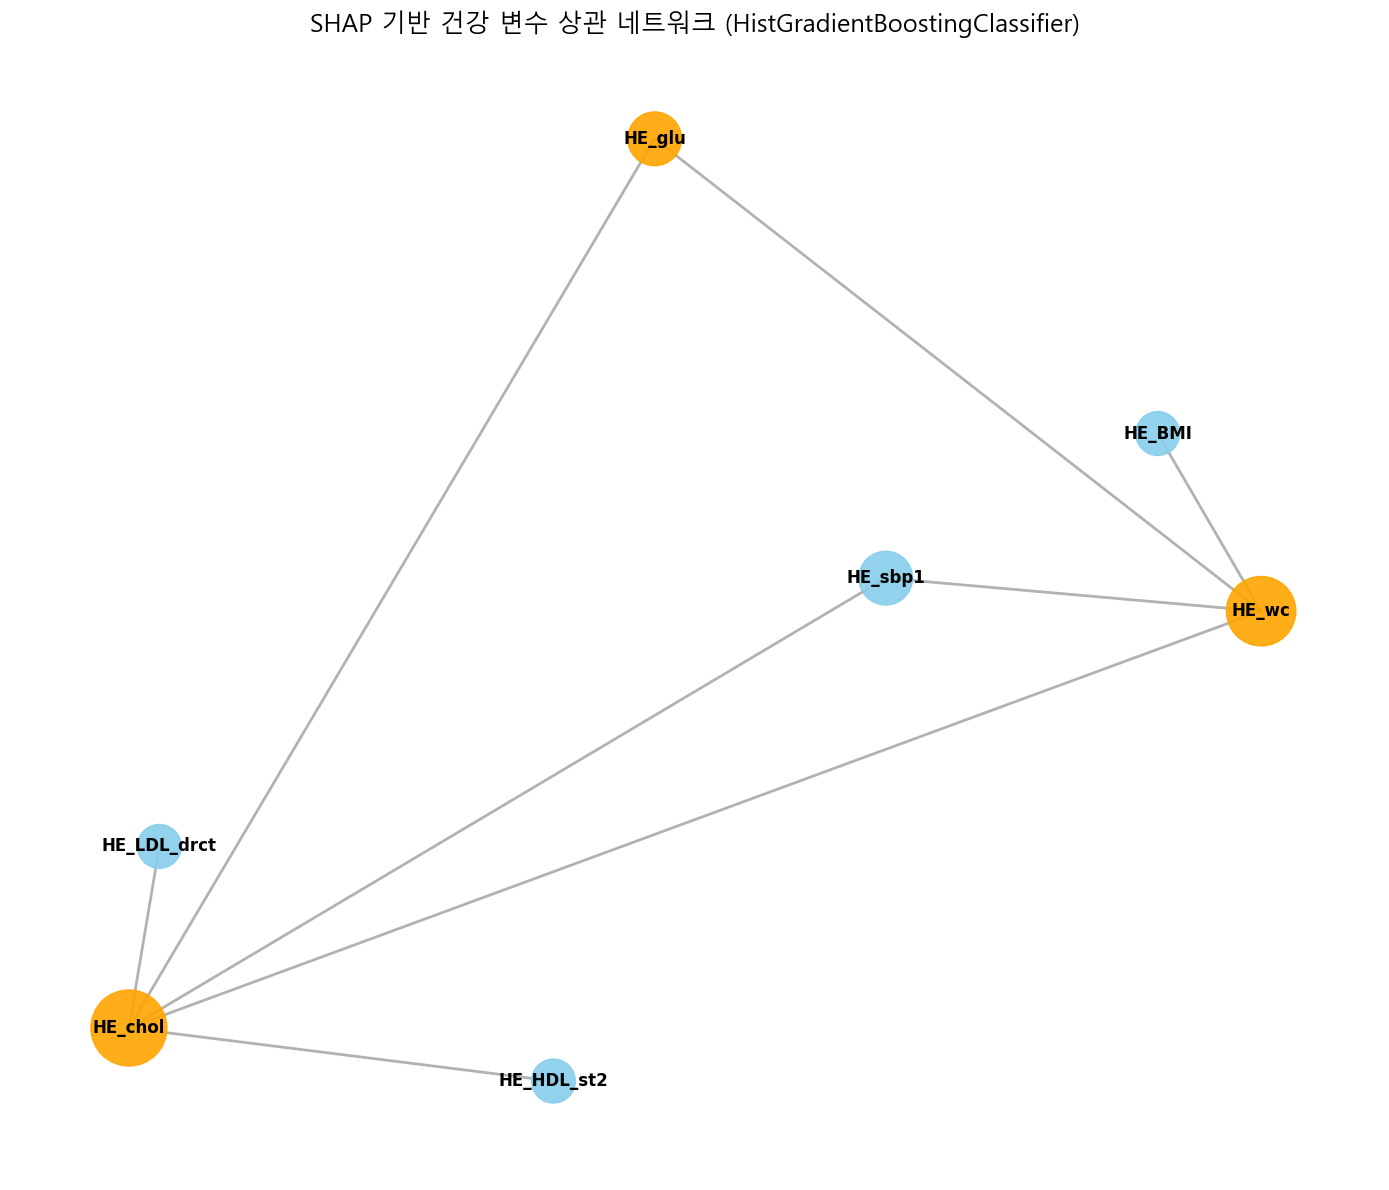


=== ÏßàÎ≥ë ÏòàÏ∏°Ïùò ÏÉÅÏúÑ 3Í∞ú Ï§ëÏöî ÌîºÏ≤ò ===
Í≥µÎ≥µÌòàÎãπ: SHAP Í∞í 1.435
ÌóàÎ¶¨ÎëòÎ†à(cm): SHAP Í∞í 0.466
Ï¥ù ÏΩúÎ†àÏä§ÌÖåÎ°§: SHAP Í∞í 0.170

=== ÏÉÅÏúÑ 3Í∞ú Ï§ëÏöî ÌîºÏ≤ò ===
1. Í≥µÎ≥µÌòàÎãπ
2. ÌóàÎ¶¨ÎëòÎ†à(cm)
3. Ï¥ù ÏΩúÎ†àÏä§ÌÖåÎ°§

ÏÇ¨Ïö©Ïûê ÎßûÏ∂§ Î¶¨Ìè¨Ìä∏ ÏöîÏïΩ
‚óè ÏßàÎ≥ë ÏòàÏ∏° ÏÇ¨Î°ÄÎ°ú Î≥º Îïå:
  ‚Üí ÎãπÎá® ÏßàÎ≥ëÏùò ÏòàÏ∏° Í≤∞Í≥ºÎäî Îã§Î•∏ Ïñ¥Îñ§ ÌäπÏÑ±Î≥¥Îã§ Í≥µÎ≥µÌòàÎãπ Í∞íÏóê ÏùòÌï¥ Í∞ÄÏû• Í∞ïÎ†•ÌïòÍ≤å Í≤∞Ï†ïÎêòÏóàÏúºÎ©∞,
    Í∑∏Îã§ÏùåÏúºÎ°ú ÌóàÎ¶¨ÎëòÎ†à(cm), Ï¥ù ÏΩúÎ†àÏä§ÌÖåÎ°§ Í∞Ä Ïù¥ Í∞úÏù∏Ïùò ÎãπÎá® ÏòàÏ∏°Ïóê Ï§ëÏöîÌïú ÏòÅÌñ•ÏùÑ ÎØ∏Ï≥§ÏäµÎãàÎã§.


Ïù¥Îü¨Ìïú Í≤∞Í≥ºÎäî Ï∂îÌõÑ ÏÇ¨Ïö©Ïûê ÎßûÏ∂§Ìòï Í±¥Í∞ï Í∞ÄÏù¥ÎìúÎùºÏù∏ Ï†úÍ≥µ Ïãú Ï§ëÏöîÌïú Í∏∞Ï§ÄÏù¥ Îê† Í≤É ÏûÖÎãàÎã§.


In [93]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, f1_score, accuracy_score
from imblearn.over_sampling import SMOTE
import shap
import matplotlib.pyplot as plt
import networkx as nx


# ÌïúÍ∏Ä Î≥ÄÏàòÎ™Ö Îß§Ìïë
feature_kor_map = {
'HE_glu': 'Í≥µÎ≥µÌòàÎãπ',
'HE_sbp1': 'ÏàòÏ∂ïÍ∏∞ ÌòàÏïï',
'HE_BMI': 'Ï≤¥ÏßàÎüâÏßÄÏàò(BMI)',
'HE_TG': 'Ï§ëÏÑ±ÏßÄÎ∞©',
'HE_chol': 'Ï¥ù ÏΩúÎ†àÏä§ÌÖåÎ°§',
'HE_LDL_drct': 'LDL ÏΩúÎ†àÏä§ÌÖåÎ°§',
'HE_HDL_st2': 'HDL ÏΩúÎ†àÏä§ÌÖåÎ°§',
'sex': 'ÏÑ±Î≥Ñ',
'age': 'ÎÇòÏù¥',
'HE_wc': 'ÌóàÎ¶¨ÎëòÎ†à(cm)'
}

HE_DM_HbA1c_input_features = ['HE_glu', 'HE_wc',  'HE_sbp1', 'HE_BMI', 'HE_TG', 'HE_chol', 'HE_LDL_drct', 'HE_HDL_st2']
#'age', 'sex'
# XÏôÄ y Ï†ïÏùò
X = data[HE_DM_HbA1c_input_features]
y = data['HE_DM_HbA1c'].astype(int) - 1

smote = SMOTE(random_state=42)
# SMOTEÎ•º Ïä§ÏºÄÏùºÎßÅÎêú ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïóê Ï†ÅÏö©
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)


from sklearn.metrics import classification_report

# HistGradientBoostingClassifierÎ°ú ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏°
best_model = HistGradientBoostingClassifier(learning_rate=0.1, max_iter=100, random_state=42)
# Ïä§ÏºÄÏùºÎßÅÎêòÍ≥† SMOTE Ï†ÅÏö©Îêú ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Î°ú Î™®Îç∏ ÌïôÏäµ
best_model.fit(X_train_smote, y_train_smote)
# Ïä§ÏºÄÏùºÎßÅÎêú ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î°ú ÏòàÏ∏°
y_pred = best_model.predict(X_test_scaled)


# SHAP Í∞í Í≥ÑÏÇ∞
explainer = shap.TreeExplainer(best_model)
# SHAP Í∞íÏùÑ Ïä§ÏºÄÏùºÎßÅÎêú ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥ Í≥ÑÏÇ∞
shap_values = explainer.shap_values(X_test_scaled)

# SHAP Í∞í Ï≤òÎ¶¨ (ÌÅ¥ÎûòÏä§Î≥Ñ ÌèâÍ∑† Ï†àÎåÄÍ∞íÏúºÎ°ú 2Ï∞®Ïõê Î≥ÄÌôò)
if isinstance(shap_values, list):
    # Î¶¨Ïä§Ìä∏ ÌòïÌÉúÏùº Í≤ΩÏö∞ (ÎåÄÎ∂ÄÎ∂ÑÏùò Îã§Ï§ë ÌÅ¥ÎûòÏä§ TreeExplainer) ÌÅ¥ÎûòÏä§Î≥Ñ Ï†àÎåÄÍ∞íÏùò ÌèâÍ∑†
    # Í∞Å ÌÅ¥ÎûòÏä§Î≥Ñ SHAP Í∞íÏùò ÌÅ¨Í∏∞Î•º ÏÉòÌîåÎ≥ÑÎ°ú ÌèâÍ∑† (n_samples, n_features)
    shap_values_class = np.mean([np.abs(val) for val in shap_values], axis=0)
elif len(shap_values.shape) == 3:  # (n_samples, n_features, n_classes) ÌòïÌÉúÏùº Í≤ΩÏö∞
    # ÌÅ¥ÎûòÏä§ Ï∞®Ïõê ÌèâÍ∑† Ï†àÎåÄÍ∞í (n_samples, n_features)
    shap_values_class = np.mean(np.abs(shap_values), axis=2)
else: # (n_samples, n_features) ÌòïÌÉúÏùº Í≤ΩÏö∞ (Ïù¥ÏßÑ Î∂ÑÎ•ò ÎòêÎäî Ïù¥ÎØ∏ ÌÅ¥ÎûòÏä§Î≥Ñ ÌèâÍ∑†Îêú Í≤ΩÏö∞)
    shap_values_class = np.abs(shap_values)


# SHAP DataFrame ÏÉùÏÑ± (Ïª¨ÎüºÎ™ÖÏùÄ ÏõêÎ≥∏ ÌäπÏÑ± Ïù¥Î¶Ñ ÏÇ¨Ïö©)
# Ïä§ÏºÄÏùºÎßÅÎêú Îç∞Ïù¥ÌÑ∞Î°ú SHAPÏùÑ Í≥ÑÏÇ∞ÌñàÏßÄÎßå, DataFrame Ïª¨ÎüºÎ™ÖÏùÄ ÏõêÎ≥∏ ÌäπÏÑ± Ïù¥Î¶Ñ ÏÇ¨Ïö©
shap_df = pd.DataFrame(shap_values_class, columns=HE_DM_HbA1c_input_features)


# ÏÉÅÍ¥Ä ÌñâÎ†¨ Í≥ÑÏÇ∞ Î∞è ÎîîÎ≤ÑÍπÖ
print("ÏÉÅÍ¥Ä ÌñâÎ†¨ ÏÉòÌîå:")
print(shap_df.corr().head())  # ÏÉÅÍ¥Ä ÌñâÎ†¨ ÏùºÎ∂Ä Ï∂úÎ†•
cor_matrix = shap_df.corr()
# Ïª¨ÎüºÎ™ÖÏùÑ ÌïúÍ∏ÄÎ°ú Î∞îÍæ∏Ïñ¥ Ï∂úÎ†•
cor_matrix_kor = cor_matrix.rename(index=feature_kor_map, columns=feature_kor_map)
print("\n ÏÉÅÍ¥Ä ÌñâÎ†¨ ÏÉòÌîå:")
print(cor_matrix_kor.round(2).head())

# ÎÑ§Ìä∏ÏõåÌÅ¨ ÏÉùÏÑ±
G = nx.Graph()
threshold = 0.1  # ÏÉÅÍ¥ÄÍ≥ÑÏàò ÏûÑÍ≥ÑÍ∞í
edge_count = 0
for i in range(len(cor_matrix.columns)):
    for j in range(i + 1, len(cor_matrix.columns)):
        corr_val = cor_matrix.iloc[i, j]
        if abs(corr_val) >= threshold:
            G.add_edge(cor_matrix.columns[i], cor_matrix.columns[j], weight=corr_val)
            edge_count += 1
print(f"ÎÑ§Ìä∏ÏõåÌÅ¨Ïóê Ï∂îÍ∞ÄÎêú Ïó£ÏßÄ Ïàò: {edge_count}")

# Ï§ëÏã¨ÏÑ± Í≥ÑÏÇ∞ (Degree Centrality)
centrality = nx.degree_centrality(G)
if not centrality:
    print("ÎÑ§Ìä∏ÏõåÌÅ¨Ïóê ÎÖ∏ÎìúÍ∞Ä ÏóÜÏùå. thresholdÎ•º ÎÇÆÏ∂îÍ±∞ÎÇò Îç∞Ïù¥ÌÑ∞Î•º ÌôïÏù∏ÌïòÏÑ∏Ïöî.")
else:
    # ÏÉÅÏúÑ 3Í∞ú ÎÖ∏Îìú Í∏∞Ï§ÄÏúºÎ°ú ÏÉâ Íµ¨Î∂Ñ
    top_nodes = sorted(centrality, key=centrality.get, reverse=True)[:3]

    # ÌäπÏ†ï ÏÉòÌîå(Ï≤´ Î≤àÏß∏ ÌÖåÏä§Ìä∏ ÏÉòÌîå)Ïùò ÏÉÅÏúÑ 3Í∞ú Ï§ëÏöî ÌîºÏ≤ò
    user_idx = 0  # Ï≤´ Î≤àÏß∏ ÌÖåÏä§Ìä∏ ÏÉòÌîå
    top3_user_feats = shap_df.iloc[user_idx].abs().sort_values(ascending=False).head(3).index.tolist()

    # ÎÖ∏Îìú ÏÉâÏÉÅ ÏÑ§Ï†ï
    node_colors = []
    for node in G.nodes:
        if node in top3_user_feats:
            node_colors.append('orange')  # ÌäπÏ†ï ÏÉòÌîåÏùò ÏÉÅÏúÑ ÌîºÏ≤ò
        elif node in top_nodes:
            node_colors.append('tomato')  # Ï§ëÏã¨ÏÑ±Ïù¥ ÎÜíÏùÄ ÌîºÏ≤ò
        else:
            node_colors.append('skyblue')  # ÎÇòÎ®∏ÏßÄ ÌîºÏ≤ò

    # ÎÑ§Ìä∏ÏõåÌÅ¨ ÏãúÍ∞ÅÌôî
    plt.figure(figsize=(14, 12))
    pos = nx.spring_layout(G, k=0.5, seed=42)
    node_sizes = [500 + 3000 * centrality[n] for n in G.nodes]

    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes, alpha=0.9)
    nx.draw_networkx_edges(G, pos, edge_color='gray', width=2, alpha=0.6)
    nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold', font_color='black')

    plt.title("SHAP Í∏∞Î∞ò Í±¥Í∞ï Î≥ÄÏàò ÏÉÅÍ¥Ä ÎÑ§Ìä∏ÏõåÌÅ¨ (HistGradientBoostingClassifier)", fontsize=18)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

    # Ï§ëÏã¨ÏÑ± Top 3 Î≥ÄÏàò (ÌïúÍ∏Ä Ïù¥Î¶Ñ)
    top_nodes_kor = [feature_kor_map.get(node, node) for node in top_nodes]
    # SHAP Top 3 Î≥ÄÏàò (ÌïúÍ∏Ä Ïù¥Î¶Ñ)
    top3_feats_kor = [feature_kor_map.get(feat, feat) for feat in top3_user_feats]

    # ÏÉÅÏúÑ ÌîºÏ≤ò Ï∂úÎ†•
    # Ï§ëÏã¨ÏÑ± ÌîºÏ≤ò Ï∂úÎ†•
    # print("=== ÏÉÅÏúÑ Ï§ëÏã¨ÏÑ± ÌîºÏ≤ò (Top 3) ===")
    # for node in top_nodes:
    #     kor_name = feature_kor_map.get(node, node)
    #     print(f"{kor_name}: Ï§ëÏã¨ÏÑ± {centrality[node]:.3f}")

    # ÏÉòÌîå Í∏∞Î∞ò SHAP Ï§ëÏöî ÌîºÏ≤ò Ï∂úÎ†•
    print("\n=== ÏßàÎ≥ë ÏòàÏ∏°Ïùò ÏÉÅÏúÑ 3Í∞ú Ï§ëÏöî ÌîºÏ≤ò ===")
    for feat in top3_user_feats:
        kor_name = feature_kor_map.get(feat, feat)
        shap_val = shap_df.iloc[user_idx][feat]
        print(f"{kor_name}: SHAP Í∞í {shap_val:.3f}")


    # print("\n=== ÏÉÅÏúÑ Ï§ëÏã¨ÏÑ±(Ïó∞Í¥ÄÏÑ±) ÌîºÏ≤ò (Top 3) ===")
    # for idx, node in enumerate(top_nodes, 1):
    #     kor_name = feature_kor_map.get(node, node)
    #     print(f"{idx}. {kor_name}")

    print("\n=== ÏÉÅÏúÑ 3Í∞ú Ï§ëÏöî ÌîºÏ≤ò ===")
    for idx, feat in enumerate(top3_user_feats, 1):
        kor_name = feature_kor_map.get(feat, feat)
        shap_val = shap_df.iloc[user_idx][feat]
        print(f"{idx}. {kor_name}")

    # Ï∂úÎ†•
    print("\nÏÇ¨Ïö©Ïûê ÎßûÏ∂§ Î¶¨Ìè¨Ìä∏ ÏöîÏïΩ")

    # print(f"‚óè Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú Î≥º Îïå (Ï§ëÏã¨ÏÑ±(Ïó∞Í¥ÄÏÑ±) Í∏∞Î∞ò):\n  ‚Üí {', '.join(top_nodes_kor)} Îäî(ÏùÄ) Î™®Îç∏Ïù¥ ÎãπÎá® HbA1c ÏÉÅÌÉúÎ•º ÏòàÏ∏°Ìï† Îïå")
    # print("    Îã§Î•∏ ÎßéÏùÄ ÏÉùÏ≤¥ ÏßÄÌëúÎì§Í≥º Î≥µÌï©Ï†ÅÏúºÎ°ú Ïó∞Í¥ÄÎêòÏñ¥ ÏûëÏö©ÌïòÎäî ÌïµÏã¨Ï†ÅÏù∏ ÌäπÏÑ±Îì§ÏûÖÎãàÎã§.\n")

    print(f"‚óè ÏßàÎ≥ë ÏòàÏ∏° ÏÇ¨Î°ÄÎ°ú Î≥º Îïå:\n  ‚Üí ÎãπÎá® ÏßàÎ≥ëÏùò ÏòàÏ∏° Í≤∞Í≥ºÎäî Îã§Î•∏ Ïñ¥Îñ§ ÌäπÏÑ±Î≥¥Îã§ {top3_feats_kor[0]} Í∞íÏóê ÏùòÌï¥ Í∞ÄÏû• Í∞ïÎ†•ÌïòÍ≤å Í≤∞Ï†ïÎêòÏóàÏúºÎ©∞,")
    print(f"    Í∑∏Îã§ÏùåÏúºÎ°ú {top3_feats_kor[1]}, {top3_feats_kor[2]} Í∞Ä Ïù¥ Í∞úÏù∏Ïùò ÎãπÎá® ÏòàÏ∏°Ïóê Ï§ëÏöîÌïú ÏòÅÌñ•ÏùÑ ÎØ∏Ï≥§ÏäµÎãàÎã§.\n")

    print("\nÏù¥Îü¨Ìïú Í≤∞Í≥ºÎäî Ï∂îÌõÑ ÏÇ¨Ïö©Ïûê ÎßûÏ∂§Ìòï Í±¥Í∞ï Í∞ÄÏù¥ÎìúÎùºÏù∏ Ï†úÍ≥µ Ïãú Ï§ëÏöîÌïú Í∏∞Ï§ÄÏù¥ Îê† Í≤É ÏûÖÎãàÎã§.")
    

Í≤∞Î°†Ï†ÅÏúºÎ°ú, Ïù¥ ÏàòÏπòÎì§ÏùÄ Í∑∏ ÏûêÏ≤¥Ïùò Ï†àÎåÄÏ†ÅÏù∏ ÌÅ¨Í∏∞Î≥¥Îã§Îäî:

Îã§Î•∏ ÌäπÏÑ±Îì§Ïùò ÏàòÏπòÏôÄ ÎπÑÍµêÌñàÏùÑ Îïå ÏÉÅÎåÄÏ†ÅÏù∏ ÏàúÏúÑÏôÄ ÌÅ¨Í∏∞
Î™®Îç∏Ïù¥ ÏòàÏ∏°ÏùÑ ÏàòÌñâÌïòÎäî Í≥ºÏ†ïÏóêÏÑú Ìï¥Îãπ ÌäπÏÑ±Ïù¥ Îã¥ÎãπÌïòÎäî Ïó≠Ìï† (Ï§ëÏã¨Ï†ÅÏù∏ Ïó∞Í≤∞Í≥†Î¶¨Ïù∏ÏßÄ, Í∞úÎ≥Ñ ÏòàÏ∏°ÏùÑ Í∞ïÌïòÍ≤å ÎØ∏ÎäîÏßÄ Îì±)

‚úÖ ÏòàÏãú
ÏÇ¨Ïö©Ïûê	Í≥µÎ≥µÌòàÎãπ	ÌóàÎ¶¨ÎëòÎ†à	Ï¥ùÏΩúÎ†àÏä§ÌÖåÎ°§	SHAP Top3 \
A (ÎãπÎá® ÏàòÏπò ÎÜíÏùå)	190	90	210	‚úÖ Í≥µÎ≥µÌòàÎãπ, ÌóàÎ¶¨ÎëòÎ†à, Ï¥ùÏΩúÎ†àÏä§ÌÖåÎ°§ \
B (Ï†ïÏÉÅÌòàÎãπÏù∏Îç∞ Î≥µÎ∂ÄÎπÑÎßå)	95	110	180	‚úÖ ÌóàÎ¶¨ÎëòÎ†à, BMI, Ï§ëÏÑ±ÏßÄÎ∞© \
C (ÏΩúÎ†àÏä§ÌÖåÎ°§Îßå ÎÜíÏùå)	85	80	280	‚úÖ Ï¥ùÏΩúÎ†àÏä§ÌÖåÎ°§, LDL, HDL

- Î™®Îç∏ Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú Î≥º Îïå (Ï§ëÏã¨ÏÑ± Í∏∞Î∞ò): **LDL ÏΩúÎ†àÏä§ÌÖåÎ°§, ÎÇòÏù¥, Ï¥ù ÏΩúÎ†àÏä§ÌÖåÎ°§**Îäî Î™®Îç∏Ïù¥ ÎãπÎá® HbA1c ÏÉÅÌÉúÎ•º ÏòàÏ∏°Ìï† Îïå Îã§Î•∏ ÎßéÏùÄ ÏÉùÏ≤¥ ÏßÄÌëúÎì§Í≥º Î≥µÌï©Ï†ÅÏúºÎ°ú Ïó∞Í¥ÄÎêòÏñ¥ ÏûëÏö©ÌïòÎäî ÌïµÏã¨Ï†ÅÏù∏ ÌäπÏÑ±Îì§Ïù¥Îã§. (Ïù¥Îì§ÏùÄ Îã®ÏàúÌûà Îã®Ïùº ÌäπÏÑ± Ï§ëÏöîÎèÑÎ•º ÎÑòÏñ¥, Î™®Îç∏Ïùò ÎÇ¥Î∂Ä Íµ¨Ï°∞ÏóêÏÑú Ï§ëÏöîÌïú Ïó≠Ìï†ÏùÑ Ìï®ÏùÑ ÏãúÏÇ¨)
- Í∞úÎ≥Ñ ÏòàÏ∏° ÏÇ¨Î°ÄÎ°ú Î≥º Îïå (ÏÉòÌîåÎ≥Ñ SHAP Í∏∞Î∞ò): Ï≤´ Î≤àÏß∏ ÏÉòÌîåÏùò ÏòàÏ∏° Í≤∞Í≥ºÎäî Îã§Î•∏ Ïñ¥Îñ§ ÌäπÏÑ±Î≥¥Îã§ **Í≥µÎ≥µÌòàÎãπ** Í∞íÏóê ÏùòÌï¥ Í∞ÄÏû• Í∞ïÎ†•ÌïòÍ≤å Í≤∞Ï†ïÎêòÏóàÏúºÎ©∞, Í∑∏Îã§ÏùåÏúºÎ°ú **HE_chol(Ï¥ù ÏΩúÎ†àÏä§ÌÖåÎ°§)Í≥º age(ÎÇòÏù¥)**Í∞Ä Ïù¥ Í∞úÏù∏Ïùò ÏòàÏ∏°Ïóê Ï§ëÏöîÌïú ÏòÅÌñ•ÏùÑ ÎØ∏Ï≥§Îã§.
- Îëê Í≤∞Í≥ºÏùò Ï°∞Ìï©: **Í≥µÎ≥µÌòàÎãπ**Îäî Î™®Îç∏ Ï†ÑÏ≤¥Ïùò Ï§ëÏöîÏÑ± Íµ¨Ï°∞(ÎÜíÏùÄ Ï§ëÏã¨ÏÑ±)ÏóêÏÑúÎèÑ ÎÇòÌÉÄÎÇòÍ≥† Í∞úÎ≥Ñ ÏòàÏ∏°Ïùò Í∞ÄÏû• ÌÅ∞ ÎìúÎùºÏù¥Î≤ÑÎ°úÎèÑ ÎÇòÌÉÄÎÇòÎäî Îì±, ÎãπÎá® ÏòàÏ∏°Ïóê Îß§Ïö∞ Ï§ëÏöîÌïú Ïó≠Ìï†ÏùÑ ÌïòÎäî Î≥ÄÏàòÏûÑÏùÑ Í∞ïÌïòÍ≤å ÏãúÏÇ¨ÌïúÎã§.

- **HE_glu (Í≥µÎ≥µ ÌòàÎãπ)**: Í≥µÎ≥µ ÌòàÎãπ ÏàòÏπòÎäî ÎãπÎá®Î≥ë ÏßÑÎã®Ïùò Í∞ÄÏû• ÌïµÏã¨Ï†ÅÏù∏ Í∏∞Ï§Ä Ï§ë ÌïòÎÇòÏù¥Î©∞, ÌòàÎãπ Ï°∞Ï†à ÏÉÅÌÉúÎ•º ÏßÅÏ†ëÏ†ÅÏúºÎ°ú ÎÇòÌÉÄÎÇ¥Îäî ÏßÄÌëúÏûÖÎãàÎã§. Î™®Îç∏Ïù¥ Í∞úÎ≥Ñ ÏòàÏ∏° Ïãú HE_gluÎ•º Í∞ÄÏû• Ï§ëÏöîÌïú ÏöîÏù∏ÏúºÎ°ú ÏÇ¨Ïö©ÌïòÎäî Í≤ÉÏùÄ Îß§Ïö∞ ÎãπÏó∞ÌïòÎ©∞, ÏùòÌïôÏ†ÅÏúºÎ°úÎèÑ ÌòàÎãπ Í¥ÄÎ¶¨Í∞Ä ÎãπÎá® Í¥ÄÎ¶¨Ïóê ÏûàÏñ¥ Í∞ÄÏû• Í∏∞Î≥∏Ï†ÅÏù¥Í≥† ÏßÅÏ†ëÏ†ÅÏù∏ Î∂ÄÎ∂ÑÏûÑÏùÑ Î∞òÏòÅÌï©ÎãàÎã§.
- **age (ÎÇòÏù¥)**: ÎÇòÏù¥Îäî 2Ìòï ÎãπÎá®Î≥ë Î∞úÎ≥ëÏùò Í∞ÄÏû• Í∞ïÎ†•Ìïú ÎπÑÏàòÏ†ï Í∞ÄÎä• ÏúÑÌóò Ïù∏ÏûêÏûÖÎãàÎã§. ÎÇòÏù¥Í∞Ä ÎßéÏïÑÏßàÏàòÎ°ù ÎãπÎá®Î≥ë Î∞úÎ≥ë ÏúÑÌóòÏù¥ Ïú†ÏùòÎØ∏ÌïòÍ≤å Ï¶ùÍ∞ÄÌï©ÎãàÎã§. Î™®Îç∏Ïù¥ ageÎ•º Ï§ëÏöîÌïú ÏòàÏ∏° Î≥ÄÏàòÎ°ú ÏÇ¨Ïö©ÌïòÍ≥†, Í∑∏ ÏòÅÌñ•Î†• Ìå®ÌÑ¥Ïù¥ Îã§Î•∏ Î≥ÄÏàòÎì§Í≥º Î≥µÌï©Ï†ÅÏúºÎ°ú Ïó∞Í¥ÄÎêòÏñ¥ ÏûàÏùå(ÎÜíÏùÄ Ï§ëÏã¨ÏÑ±)ÏùÑ ÌïôÏäµÌïú Í≤ÉÏùÄ ÎÇòÏù¥Í∞Ä ÎãπÎá® ÏòàÏ∏°Ïóê ÏûàÏñ¥ ÌïµÏã¨Ï†ÅÏù∏ Î∞∞Í≤Ω ÏöîÏù∏ÏûÑÏùÑ Îí∑Î∞õÏπ®Ìï©ÎãàÎã§.
- **HE_chol (Ï¥ù ÏΩúÎ†àÏä§ÌÖåÎ°§) Î∞è HE_LDL_drct (LDL ÏΩúÎ†àÏä§ÌÖåÎ°§)**: ÎÜíÏùÄ LDL ÏΩúÎ†àÏä§ÌÖåÎ°§ÏùÑ Ìè¨Ìï®Ìïú Ïù¥ÏÉÅÏßÄÏßàÌòàÏ¶ùÏùÄ ÎπÑÎßå, Í≥†ÌòàÏïïÍ≥º Ìï®Íªò ÎåÄÏÇ¨Ï¶ùÌõÑÍµ∞Ïùò Ï£ºÏöî Íµ¨ÏÑ± ÏöîÏÜåÏù¥Î©∞, Ïù∏ÏäêÎ¶∞ Ï†ÄÌï≠ÏÑ±Í≥º 2Ìòï ÎãπÎá®Î≥ë Î∞úÎ≥ë ÏúÑÌóòÏùÑ ÎÜíÏù¥Îäî Í≤ÉÏúºÎ°ú ÏïåÎ†§Ï†∏ ÏûàÏäµÎãàÎã§. Î™®Îç∏Ïù¥ HE_cholÍ≥º HE_LDL_drctÏùò ÏòÅÌñ•Î†• Ìå®ÌÑ¥Ïù¥ Îã§Î•∏ Î≥ÄÏàòÎì§Í≥º Î≥µÏû°ÌïòÍ≤å Ïó∞Í¥ÄÎêòÏñ¥ ÏûàÏùåÏùÑ ÌïôÏäµÌïú Í≤ÉÏùÄ ÏΩúÎ†àÏä§ÌÖåÎ°§ ÏàòÏπò Í¥ÄÎ¶¨Í∞Ä ÎãπÎá®Î≥ë ÏûêÏ≤¥Ïùò ÏúÑÌóòÎøê ÏïÑÎãàÎùº ÎèôÎ∞òÎê† Ïàò ÏûàÎäî ÎåÄÏÇ¨ ÏßàÌôò Í¥ÄÎ¶¨ÏóêÎèÑ Ï§ëÏöîÌïòÎã§Îäî ÏùòÌïôÏ†Å ÏÇ¨Ïã§Í≥º ÏùºÏπòÌï©ÎãàÎã§.

**Í≥†ÌòàÏïï ÏòàÏ∏° Î™®Îç∏ ÏÑ†Ï†ï**


‚ñ∂ Mean F1 score (CV) of D_tree: 57.44%
‚ñ∂ Test F1 score of D_tree: 57.87%
‚ñ∂ Test Accuracy of D_tree: 54.95%

‚ñ∂ Mean F1 score (CV) of RF: 63.44%
‚ñ∂ Test F1 score of RF: 64.31%
‚ñ∂ Test Accuracy of RF: 63.09%

‚ñ∂ Mean F1 score (CV) of HistGB: 67.80%
‚ñ∂ Test F1 score of HistGB: 67.06%
‚ñ∂ Test Accuracy of HistGB: 66.58%

‚ñ∂ Mean F1 score (CV) of XGB: 67.28%
‚ñ∂ Test F1 score of XGB: 66.79%
‚ñ∂ Test Accuracy of XGB: 66.58%
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000712 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2800
[LightGBM] [Info] Number of data points in the train set: 8444, number of used features: 12
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the

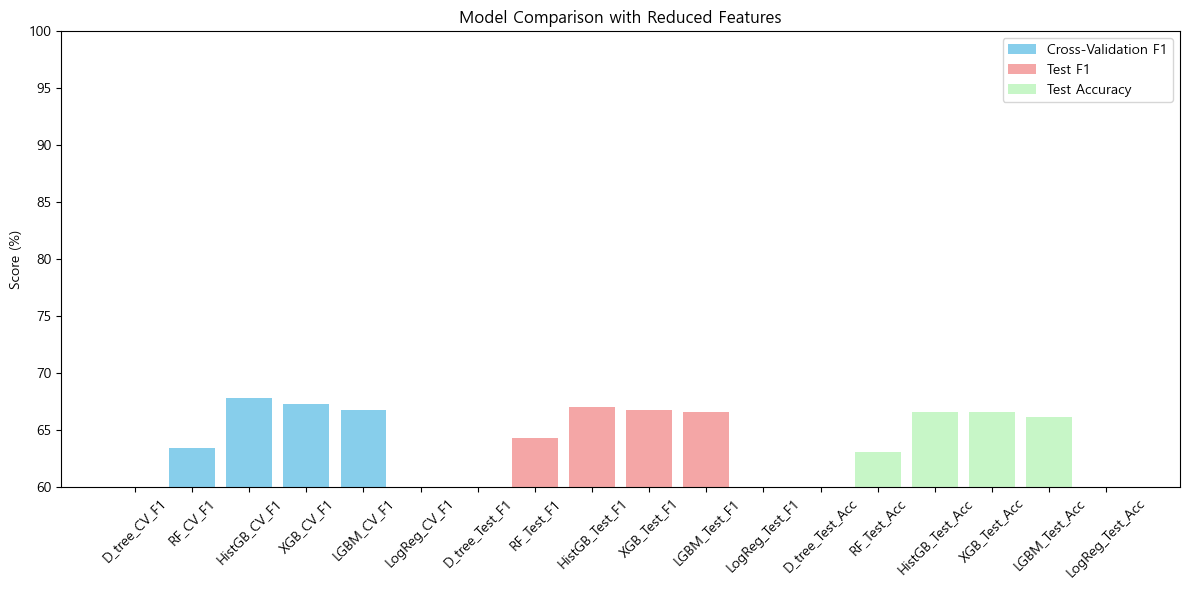

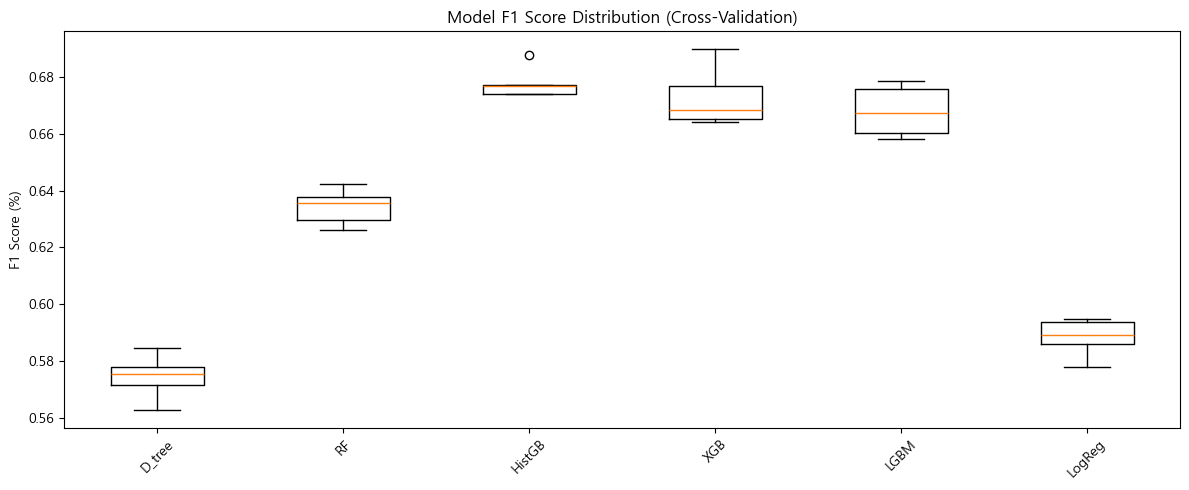

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# ÏûÖÎ†• ÌîºÏ≤ò Î∞è ÌÉÄÍ≤ü ÏÑ§Ï†ï
HE_HP_input_features= ['age','HE_sbp1', 'HE_dbp1',  'HE_wc', 'HE_glu', 'HE_BMI', 'HE_TG', 'HE_crea', 'HE_ast', 'HE_chol', 'HE_LDL_drct', 'HE_HDL_st2']

# XÏôÄ y Ï†ïÏùò
X = data[HE_HP_input_features]
y = data['HE_HP'].astype(int) - 1

# ÌõàÎ†®/ÌÖåÏä§Ìä∏ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# SMOTEÎ°ú Ïò§Î≤ÑÏÉòÌîåÎßÅ
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Î∂ÑÎ•òÍ∏∞ Ï†ïÏùò
classifiers = [
    ('D_tree', DecisionTreeClassifier(max_depth=3, min_samples_split=10, random_state=0, class_weight='balanced')),
    ('RF', RandomForestClassifier(n_estimators=50, max_depth=5, random_state=0, class_weight='balanced')),
    ('HistGB', HistGradientBoostingClassifier(learning_rate=0.1, max_iter=100, random_state=0)),
    ('XGB', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0)),
    ('LGBM', LGBMClassifier(random_state=0, class_weight='balanced')),
    ('LogReg', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=0))
]

classifier_names = [name for name, _ in classifiers]
classifiers = [clf for _, clf in classifiers]

# Í≤∞Í≥º Ï†ÄÏû•Ïö© Î¶¨Ïä§Ìä∏
modelaccuracies = []
modelmeans = []
modelnames = []
modeltest_f1 = []
modeltest_acc = []

# Î™®Îç∏ ÌõàÎ†® Î∞è ÌèâÍ∞Ä
for classifier_name, classifier in zip(classifier_names, classifiers):
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    accuracies = cross_val_score(classifier, X_train, y_train, cv=skf, scoring='f1_weighted')
    print(f"\n‚ñ∂ Mean F1 score (CV) of {classifier_name}: {accuracies.mean()*100:.2f}%")
    modelaccuracies.append(accuracies)
    modelnames.append(classifier_name)
    modelmeans.append(accuracies.mean()*100)

    classifier.fit(X_train_smote, y_train_smote)
    y_pred = classifier.predict(X_test)
    test_f1 = f1_score(y_test, y_pred, average='weighted')
    test_acc = accuracy_score(y_test, y_pred)
    modeltest_f1.append(test_f1*100)
    modeltest_acc.append(test_acc*100)
    print(f"‚ñ∂ Test F1 score of {classifier_name}: {test_f1*100:.2f}%")
    print(f"‚ñ∂ Test Accuracy of {classifier_name}: {test_acc*100:.2f}%")

# ÏÑ±Îä• ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 6))
plt.ylim([60, 100])
plt.bar([name + "_CV_F1" for name in modelnames], modelmeans, color='skyblue', label='Cross-Validation F1')
plt.bar([name + "_Test_F1" for name in modelnames], modeltest_f1, color='lightcoral', label='Test F1', alpha=0.7)
plt.bar([name + "_Test_Acc" for name in modelnames], modeltest_acc, color='lightgreen', label='Test Accuracy', alpha=0.5)
plt.xticks(rotation=45)
plt.ylabel('Score (%)')
plt.title('Model Comparison with Reduced Features')
plt.legend()
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)
ax.boxplot(modelaccuracies)
ax.set_xticklabels(modelnames, rotation=45)
ax.set_ylabel('F1 Score (%)')
ax.set_title('Model F1 Score Distribution (Cross-Validation)')
plt.tight_layout()
plt.show()


| Model   | CV F1 (%) | Test F1 (%) | Test Accuracy (%) |
| ------- | --------- | ----------- | ----------------- |
| D_tree  | 57.44     | 57.87       | 54.95             |
| RF      | 63.44     | 64.31       | 63.09             |
| HistGB  | 67.80     | 67.06       | 66.58             |
| XGB     | 67.28     | 66.79       | 66.58             |
| LGBM    | 66.79     | 66.55       | 66.16             |
| LogReg  | 58.83     | 58.28       | 56.54             |


HistGB Î™®Îç∏Î°ú ÏÑ†Ï†ï

                       precision    recall  f1-score   support

     Class 0 (Normal)       0.81      0.80      0.80      1163
     Class 1 (Pre_hp)       0.30      0.39      0.34       209
Class 2 (Pre_high_hp)       0.51      0.58      0.54       365
    Class 2 (High_hp)       0.71      0.63      0.67       902

             accuracy                           0.68      2639
            macro avg       0.58      0.60      0.59      2639
         weighted avg       0.69      0.68      0.68      2639



<Figure size 600x600 with 0 Axes>

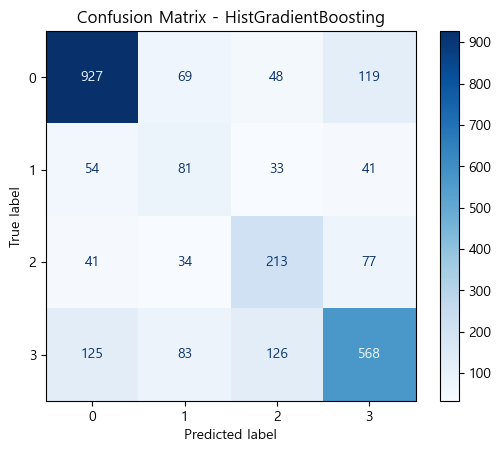

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, f1_score, accuracy_score
from imblearn.over_sampling import SMOTE
import shap
import matplotlib.pyplot as plt

# ÏûÖÎ†• ÌîºÏ≤ò Î∞è ÌÉÄÍ≤ü ÏÑ§Ï†ï
HE_HP_input_features= ['age','HE_sbp1', 'HE_dbp1',  'HE_wc', 'HE_glu', 'HE_BMI', 'HE_TG', 'HE_crea', 'HE_ast', 'HE_chol', 'HE_LDL_drct', 'HE_HDL_st2']

# XÏôÄ y Ï†ïÏùò
X = data[HE_HP_input_features]
y = data['HE_HP'].astype(int) - 1

# ÌõàÎ†®/ÌÖåÏä§Ìä∏ Î∂ÑÌï† Î®ºÏ†Ä ÏàòÌñâ
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏóêÎßå fit_transform
X_test_scaled = scaler.transform(X_test)  # ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏóêÎäî transformÎßå Ï†ÅÏö©

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
# SMOTEÎ•º Ïä§ÏºÄÏùºÎßÅÎêú ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïóê Ï†ÅÏö©
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)


from sklearn.metrics import classification_report

# HistGradientBoostingClassifierÎ°ú ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏°
best_model = HistGradientBoostingClassifier(learning_rate=0.1, max_iter=100, random_state=42)
best_model.fit(X_train_smote, y_train_smote)
y_pred = best_model.predict(X_test_scaled)

# ÌÅ¥ÎûòÏä§Î≥Ñ F1 Ïä§ÏΩîÏñ¥ Ï∂úÎ†•
print(classification_report(y_test, y_pred, target_names=['Class 0 (Normal)', 'Class 1 (Pre_hp)', 'Class 2 (Pre_high_hp)', 'Class 2 (High_hp)']))

# ÌèâÍ∞Ä ÏßÄÌëú Î∞è ÌòºÎèôÌñâÎ†¨
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(class_report).transpose()

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(6, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - HistGradientBoosting")
plt.show()

**ÌÅ¥ÎûòÏä§ Î∂àÍ∑†Ìòï Ìï¥Í≤∞ÌïòÍ∏∞**

In [94]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, f1_score, accuracy_score
from imblearn.over_sampling import SMOTE
import shap
import matplotlib.pyplot as plt

# ÏûÖÎ†• ÌîºÏ≤ò Î∞è ÌÉÄÍ≤ü ÏÑ§Ï†ï
HE_HP_input_features= ['HE_sbp1', 'HE_dbp1',  'HE_wc', 'HE_glu', 'HE_BMI', 'HE_TG', 'HE_crea', 'HE_ast', 'HE_chol', 'HE_LDL_drct', 'HE_HDL_st2']
#'age'
# XÏôÄ y Ï†ïÏùò
X = data[HE_HP_input_features]
y = data['HE_HP'].astype(int) - 1

# ÌõàÎ†®/ÌÖåÏä§Ìä∏ Î∂ÑÌï† Î®ºÏ†Ä ÏàòÌñâ
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏóêÎßå fit_transform
X_test_scaled = scaler.transform(X_test)  # ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏóêÎäî transformÎßå Ï†ÅÏö©


from sklearn.metrics import classification_report

from sklearn.utils.class_weight import compute_class_weight

# ÌÅ¥ÎûòÏä§ Í∞ÄÏ§ëÏπò Í≥ÑÏÇ∞ ('balanced'Îäî ÎπàÎèÑÏàòÏóê Î∞òÎπÑÎ°ÄÌïòÏó¨ ÏûêÎèô Í≥ÑÏÇ∞)
# compute_class_weight Ìï®ÏàòÏóê ÏõêÎ≥∏ ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïùò y Í∞íÏùÑ Ï†ÑÎã¨Ìï¥Ïïº Ìï©ÎãàÎã§.
# ÎßåÏïΩ SMOTE Ï†ÅÏö© ÌõÑÏùò Îç∞Ïù¥ÌÑ∞Î°ú Í∞ÄÏ§ëÏπòÎ•º Í≥ÑÏÇ∞ÌïòÍ≥† Ïã∂Îã§Î©¥ y_train_smoteÎ•º Ï†ÑÎã¨Ìï©ÎãàÎã§.
classes = np.unique(y_train) # ÏõêÎ≥∏ ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïùò ÌÅ¥ÎûòÏä§ Î†àÏù¥Î∏î
weights = compute_class_weight('balanced', classes=classes, y=y_train)

# Í≥ÑÏÇ∞Îêú Í∞ÄÏ§ëÏπòÎ•º ÎîïÏÖîÎÑàÎ¶¨ ÌòïÌÉúÎ°ú Î≥ÄÌôò {ÌÅ¥ÎûòÏä§_ÎùºÎ≤®: Í∞ÄÏ§ëÏπò}
class_weights_dict = dict(zip(classes, weights))

print(f"Í≥ÑÏÇ∞Îêú ÌÅ¥ÎûòÏä§ Í∞ÄÏ§ëÏπò: {class_weights_dict}")


# HistGradientBoostingClassifier Î™®Îç∏ ÌïôÏäµ (class_weight Ï†ÅÏö©)
# best_model = HistGradientBoostingClassifier(learning_rate=0.1, max_iter=100, random_state=42) # Í∏∞Ï°¥ Î™®Îç∏
# class_weight Îß§Í∞úÎ≥ÄÏàò Ï∂îÍ∞Ä
best_model_weighted = HistGradientBoostingClassifier(
    learning_rate=0.1,
    max_iter=100,
    random_state=42,
    class_weight=class_weights_dict # ÎòêÎäî 'balanced' Î¨∏ÏûêÏó¥ ÏÇ¨Ïö© Í∞ÄÎä•
)

# Ïä§ÏºÄÏùºÎßÅÎêú ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Î°ú ÌïôÏäµ (SMOTE ÎØ∏Ï†ÅÏö© Ïãú X_train_scaled ÏÇ¨Ïö©)
# ÎßåÏïΩ SMOTE Í≤∞Í≥ºÎ•º ÏÇ¨Ïö©ÌïúÎã§Î©¥ X_train_smote_scaled (SMOTE ÌõÑ Ïä§ÏºÄÏùºÎßÅÎêú Îç∞Ïù¥ÌÑ∞) ÏÇ¨Ïö©
best_model_weighted.fit(X_train_scaled, y_train)

# Ïä§ÏºÄÏùºÎßÅÎêú ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î°ú ÏòàÏ∏°
y_pred_weighted = best_model_weighted.predict(X_test_scaled)

# ÏÑ±Îä• ÌèâÍ∞Ä
print("\nClass Weight Ï†ÅÏö© ÌõÑ Classification Report:")
# y_testÎäî ÏõêÎ≥∏ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò ÎùºÎ≤®ÏûÖÎãàÎã§. ÏòàÏ∏° Í≤∞Í≥ºÏôÄ ÎπÑÍµêÌï©ÎãàÎã§.
print(classification_report(y_test, y_pred_weighted))

# Ï∂îÍ∞ÄÏ†ÅÏúºÎ°ú F1 Ïä§ÏΩîÏñ¥Î•º Í∞Å ÌÅ¥ÎûòÏä§Î≥ÑÎ°ú ÌôïÏù∏ÌïòÏó¨ Í∞úÏÑ†ÎêòÏóàÎäîÏßÄ ÎπÑÍµêÌï©ÎãàÎã§.
f1_weighted = f1_score(y_test, y_pred_weighted, average=None)
print(f"\nClass Weight Ï†ÅÏö© ÌõÑ ÌÅ¥ÎûòÏä§Î≥Ñ F1-score: {f1_weighted}")

Í≥ÑÏÇ∞Îêú ÌÅ¥ÎûòÏä§ Í∞ÄÏ§ëÏπò: {np.int64(0): np.float64(0.5667760666498359), np.int64(1): np.float64(3.179886685552408), np.int64(2): np.float64(1.8090249798549556), np.int64(3): np.float64(0.7307942708333334)}

Class Weight Ï†ÅÏö© ÌõÑ Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.82      0.84       990
           1       0.31      0.46      0.37       176
           2       0.49      0.53      0.51       311
           3       0.73      0.65      0.69       768

    accuracy                           0.69      2245
   macro avg       0.59      0.62      0.60      2245
weighted avg       0.71      0.69      0.70      2245


Class Weight Ï†ÅÏö© ÌõÑ ÌÅ¥ÎûòÏä§Î≥Ñ F1-score: [0.83563748 0.37155963 0.50617284 0.68547832]


shap Î°ú feature selections

Ïù¥Îäî ÎπÑÎßå(ÌóàÎ¶¨ÎëòÎ†à)Í≥º Ïù¥ÏÉÅÏßÄÏßàÌòàÏ¶ù(ÏΩúÎ†àÏä§ÌÖåÎ°§)Ïù¥ Í≥†ÌòàÏïïÏùÑ Ìè¨Ìï®Ìïú ÎåÄÏÇ¨Ï¶ùÌõÑÍµ∞Ïùò Ï§ëÏöîÌïú Íµ¨ÏÑ± ÏöîÏÜåÏù¥Ïûê ÏúÑÌóò Ïù∏ÏûêÎùºÎäî ÏùòÌïôÏ†Å ÏÇ¨Ïã§Í≥º ÏùºÏπòÌï©ÎãàÎã§. Î™®Îç∏ÏùÄ Ïù¥Îü¨Ìïú Í∞ÑÏ†ëÏ†ÅÏù∏ ÏúÑÌóò Ïù∏Ïûê Ï†ïÎ≥¥ÎèÑ Í≥†ÌòàÏïï ÏòàÏ∏°Ïóê Ï§ëÏöîÌïòÍ≤å ÌôúÏö©ÌïòÍ≥† ÏûàÏùåÏùÑ Ïïå Ïàò ÏûàÏäµÎãàÎã§.

- age (ÎÇòÏù¥): ÎÇòÏù¥Îäî Í≥†ÌòàÏïï, ÎãπÎá®Î≥ë, Ïã¨ÌòàÍ¥Ä ÏßàÌôò Îì± Ïó¨Îü¨ ÏßàÎ≥ëÏùò Í∞ïÎ†•Ìïú ÎπÑÏàòÏ†ï Í∞ÄÎä• ÏúÑÌóò Ïù∏ÏûêÏûÖÎãàÎã§. Î™®Îç∏Ïù¥ ÎÇòÏù¥Î•º Ï§ëÏöîÌïú ÏòàÏ∏° Î≥ÄÏàòÏù¥Ïûê Ï§ëÏã¨ÏÑ±Ïù¥ ÎÜíÏùÄ Î≥ÄÏàòÎ°ú ÏÇ¨Ïö©Ìïú Í≤ÉÏùÄ ÎÇòÏù¥Í∞Ä ÏßàÎ≥ë ÏòàÏ∏°Ïóê ÏûàÏñ¥ ÌïµÏã¨Ï†ÅÏù∏ Î∞∞Í≤Ω ÏöîÏù∏ÏûÑÏùÑ Îí∑Î∞õÏπ®Ìï©ÎãàÎã§.
- HE_LDL_drct (LDL ÏΩúÎ†àÏä§ÌÖåÎ°§): ÎÜíÏùÄ LDL ÏΩúÎ†àÏä§ÌÖåÎ°§ÏùÑ Ìè¨Ìï®Ìïú Ïù¥ÏÉÅÏßÄÏßàÌòàÏ¶ùÏùÄ Í≥†ÌòàÏïï, ÎãπÎá®Î≥ë, ÎπÑÎßå Îì±Ïù¥ ÎèôÎ∞òÎêòÎäî ÎåÄÏÇ¨Ï¶ùÌõÑÍµ∞Ïùò Ï£ºÏöî Íµ¨ÏÑ± ÏöîÏÜåÏù¥Î©∞, Ïã¨ÌòàÍ¥Ä ÏßàÌôò Î∞úÎ≥ë ÏúÑÌóòÏùÑ ÎÜíÏûÖÎãàÎã§. Î™®Îç∏Ïù¥ HE_LDL_drctÏùò ÏòÅÌñ•Î†• Ìå®ÌÑ¥Ïù¥ Îã§Î•∏ Î≥ÄÏàòÎì§Í≥º Î≥µÏû°ÌïòÍ≤å Ïó∞Í¥ÄÎêòÏñ¥ ÏûàÏùåÏùÑ ÌïôÏäµÌïú Í≤ÉÏùÄ ÏΩúÎ†àÏä§ÌÖåÎ°§ Í¥ÄÎ¶¨Í∞Ä ÎåÄÏÇ¨ Í±¥Í∞ï Î∞è Í¥ÄÎ†® ÏßàÎ≥ë ÏúÑÌóò Í¥ÄÎ¶¨ÏóêÎèÑ Ï§ëÏöîÌï®ÏùÑ ÏãúÏÇ¨Ìï©ÎãàÎã§.
- HE_ast (AST, Í∞Ñ Í∏∞Îä• ÏàòÏπò): ASTÎäî Í∞ÑÏÑ∏Ìè¨ ÏÜêÏÉÅ ÏßÄÌëúÎ°ú Ï£ºÎ°ú ÏÇ¨Ïö©ÎêòÏßÄÎßå, **ÎπÑÏïåÏΩîÏò¨ÏÑ± ÏßÄÎ∞©Í∞Ñ ÏßàÌôò(NAFLD)**Í≥ºÎèÑ Ïó∞Í¥ÄÏù¥ ÏûàÏäµÎãàÎã§. NAFLDÎäî ÎåÄÏÇ¨Ï¶ùÌõÑÍµ∞Ïùò Îòê Îã§Î•∏ Íµ¨ÏÑ± ÏöîÏÜåÏù¥Î©∞, Í≥†ÌòàÏïï, ÎãπÎá®Î≥ë, Ïã¨ÌòàÍ¥Ä ÏßàÌôòÏùò ÏúÑÌóòÏùÑ ÎÜíÏù¥Îäî Í≤ÉÏúºÎ°ú ÏïåÎ†§Ï†∏ ÏûàÏäµÎãàÎã§. HE_astÍ∞Ä ÎÜíÏùÄ Ï§ëÏã¨ÏÑ±ÏùÑ Î≥¥Ïù∏Îã§Îäî Í≤ÉÏùÄ, Î™®Îç∏Ïù¥ Í∞Ñ Í∏∞Îä•Í≥º Í¥ÄÎ†®Îêú ÎåÄÏÇ¨Ï†Å ÏÉÅÌÉúÍ∞Ä Ìï¥Îãπ ÏßàÎ≥ë ÏòàÏ∏°Ïóê ÏûàÏñ¥ Îã§Î•∏ ÏöîÏù∏Îì§Í≥º Î≥µÌï©Ï†ÅÏúºÎ°ú Ïó∞Í¥ÄÎêòÏñ¥ ÏûàÎã§Í≥† ÌïôÏäµÌñàÏùåÏùÑ ÏãúÏÇ¨Ìï©ÎãàÎã§. Ïù¥Îäî ÏßÅÏ†ëÏ†ÅÏù∏ ÏßÄÌëúÎäî ÏïÑÎãàÏßÄÎßå, ÏßàÎ≥ëÍ≥º Í¥ÄÎ†®Îêú Í∞ÑÏ†ëÏ†ÅÏù∏ ÏÉùÎ¶¨ÌïôÏ†Å Ïó∞Í¥ÄÏÑ±ÏùÑ Î™®Îç∏Ïù¥ Ìè¨Ï∞©ÌñàÏùÑ Í∞ÄÎä•ÏÑ±ÏùÑ Î≥¥Ïó¨Ï§çÎãàÎã§.

ÏÉÅÍ¥Ä ÌñâÎ†¨ ÏÉòÌîå:
          HE_sbp1   HE_dbp1     HE_wc    HE_glu    HE_BMI     HE_TG   HE_crea  \
HE_sbp1  1.000000 -0.018392  0.074599 -0.053684 -0.062175  0.019500 -0.090017   
HE_dbp1 -0.018392  1.000000  0.044804 -0.013468  0.066568 -0.025350 -0.005616   
HE_wc    0.074599  0.044804  1.000000  0.116823  0.345073  0.081959 -0.036415   
HE_glu  -0.053684 -0.013468  0.116823  1.000000 -0.007473  0.070145 -0.068033   
HE_BMI  -0.062175  0.066568  0.345073 -0.007473  1.000000  0.008333  0.038773   

           HE_ast   HE_chol  HE_LDL_drct  HE_HDL_st2  
HE_sbp1  0.055746 -0.056820    -0.173867   -0.015582  
HE_dbp1  0.002150 -0.058084    -0.158799   -0.020652  
HE_wc    0.069391  0.005812     0.022134    0.079442  
HE_glu   0.141844 -0.004190    -0.002972   -0.014256  
HE_BMI  -0.011429  0.027596     0.036731    0.111011  

 ÏÉÅÍ¥Ä ÌñâÎ†¨ ÏÉòÌîå:
            ÏàòÏ∂ïÍ∏∞ ÌòàÏïï  Ïù¥ÏôÑÍ∏∞ ÌòàÏïï  ÌóàÎ¶¨ÎëòÎ†à(cm)  Í≥µÎ≥µÌòàÎãπ  Ï≤¥ÏßàÎüâÏßÄÏàò(BMI)  Ï§ëÏÑ±ÏßÄÎ∞©  HE_crea  HE_ast  \
Ïà

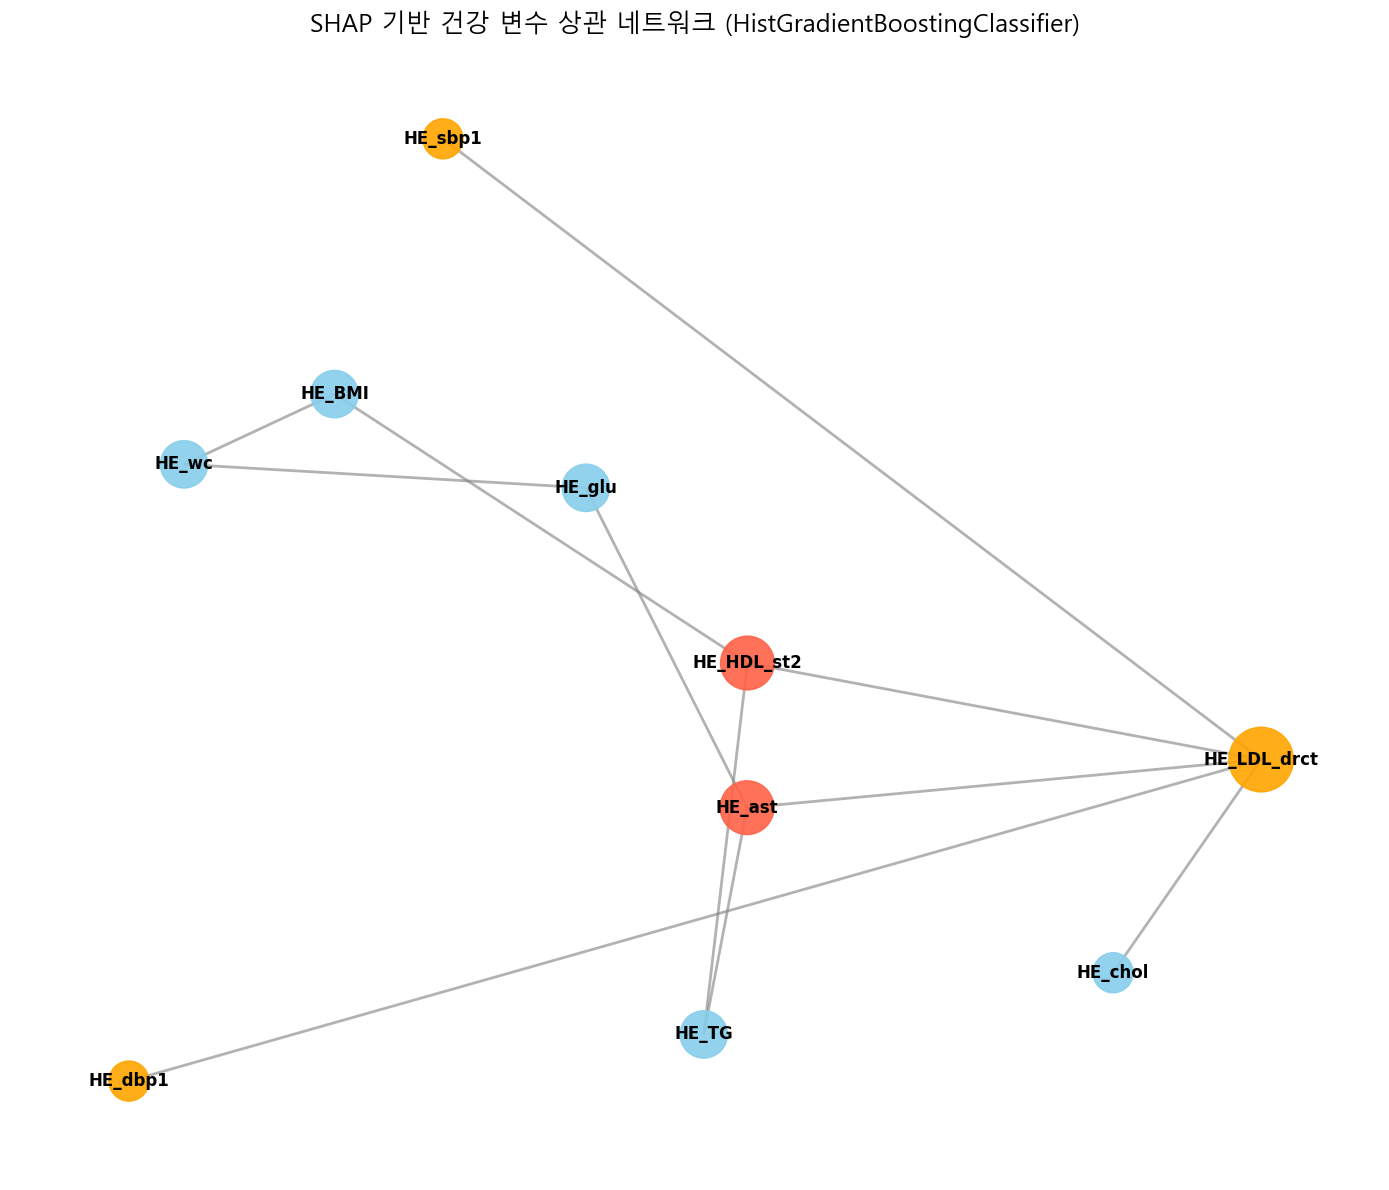


=== ÏßàÎ≥ë ÏòàÏ∏°Ïùò ÏÉÅÏúÑ 3Í∞ú Ï§ëÏöî ÌîºÏ≤ò ===
Ïù¥ÏôÑÍ∏∞ ÌòàÏïï: SHAP Í∞í 1.436
ÏàòÏ∂ïÍ∏∞ ÌòàÏïï: SHAP Í∞í 0.780
LDL ÏΩúÎ†àÏä§ÌÖåÎ°§: SHAP Í∞í 0.150

=== ÏÉÅÏúÑ 3Í∞ú Ï§ëÏöî ÌîºÏ≤ò ===
1. Ïù¥ÏôÑÍ∏∞ ÌòàÏïï
2. ÏàòÏ∂ïÍ∏∞ ÌòàÏïï
3. LDL ÏΩúÎ†àÏä§ÌÖåÎ°§

ÏÇ¨Ïö©Ïûê ÎßûÏ∂§ Î¶¨Ìè¨Ìä∏ ÏöîÏïΩ
‚óè ÏßàÎ≥ë ÏòàÏ∏° ÏÇ¨Î°ÄÎ°ú Î≥º Îïå:
  ‚Üí Í≥†ÌòàÏïï ÏßàÎ≥ëÏùò ÏòàÏ∏° Í≤∞Í≥ºÎäî Îã§Î•∏ Ïñ¥Îñ§ ÌäπÏÑ±Î≥¥Îã§ Ïù¥ÏôÑÍ∏∞ ÌòàÏïï Í∞íÏóê ÏùòÌï¥ Í∞ÄÏû• Í∞ïÎ†•ÌïòÍ≤å Í≤∞Ï†ïÎêòÏóàÏúºÎ©∞,
    Í∑∏Îã§ÏùåÏúºÎ°ú ÏàòÏ∂ïÍ∏∞ ÌòàÏïï, LDL ÏΩúÎ†àÏä§ÌÖåÎ°§ Í∞Ä Ïù¥ Í∞úÏù∏Ïùò Í≥†ÌòàÏïï ÏòàÏ∏°Ïóê Ï§ëÏöîÌïú ÏòÅÌñ•ÏùÑ ÎØ∏Ï≥§ÏäµÎãàÎã§.


Ïù¥Îü¨Ìïú Í≤∞Í≥ºÎäî Ï∂îÌõÑ ÏÇ¨Ïö©Ïûê ÎßûÏ∂§Ìòï Í±¥Í∞ï Í∞ÄÏù¥ÎìúÎùºÏù∏ Ï†úÍ≥µ Ïãú Ï§ëÏöîÌïú Í∏∞Ï§ÄÏù¥ Îê† Í≤É ÏûÖÎãàÎã§.


In [95]:


# ÌïúÍ∏Ä Î≥ÄÏàòÎ™Ö Îß§Ìïë
feature_kor_map = {
'HE_glu': 'Í≥µÎ≥µÌòàÎãπ',
'HE_sbp1': 'ÏàòÏ∂ïÍ∏∞ ÌòàÏïï',
'HE_dbp1': 'Ïù¥ÏôÑÍ∏∞ ÌòàÏïï',
'HE_BMI': 'Ï≤¥ÏßàÎüâÏßÄÏàò(BMI)',
'HE_TG': 'Ï§ëÏÑ±ÏßÄÎ∞©',
'HE_chol': 'Ï¥ù ÏΩúÎ†àÏä§ÌÖåÎ°§',
'HE_LDL_drct': 'LDL ÏΩúÎ†àÏä§ÌÖåÎ°§',
'HE_HDL_st2': 'HDL ÏΩúÎ†àÏä§ÌÖåÎ°§',
'sex': 'ÏÑ±Î≥Ñ',
'age': 'ÎÇòÏù¥',
'HE_wc' : 'ÌóàÎ¶¨ÎëòÎ†à(cm)'
}

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, f1_score, accuracy_score
from imblearn.over_sampling import SMOTE
import shap
import matplotlib.pyplot as plt
import networkx as nx

# ÏûÖÎ†• ÌîºÏ≤ò Î∞è ÌÉÄÍ≤ü ÏÑ§Ï†ï
HE_HP_input_features= ['HE_sbp1', 'HE_dbp1',  'HE_wc', 'HE_glu', 'HE_BMI', 'HE_TG', 'HE_crea', 'HE_ast', 'HE_chol', 'HE_LDL_drct', 'HE_HDL_st2']
#'age'
# XÏôÄ y Ï†ïÏùò
X = data[HE_HP_input_features]
y = data['HE_HP'].astype(int) - 1

smote = SMOTE(random_state=42)
# SMOTEÎ•º Ïä§ÏºÄÏùºÎßÅÎêú ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïóê Ï†ÅÏö©
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)


from sklearn.metrics import classification_report

# HistGradientBoostingClassifierÎ°ú ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏°
best_model = HistGradientBoostingClassifier(learning_rate=0.1, max_iter=100, random_state=42)
# Ïä§ÏºÄÏùºÎßÅÎêòÍ≥† SMOTE Ï†ÅÏö©Îêú ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Î°ú Î™®Îç∏ ÌïôÏäµ
best_model.fit(X_train_smote, y_train_smote)
# Ïä§ÏºÄÏùºÎßÅÎêú ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î°ú ÏòàÏ∏°
y_pred = best_model.predict(X_test_scaled)


from sklearn.metrics import classification_report

# HistGradientBoostingClassifierÎ°ú ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏°
best_model = HistGradientBoostingClassifier(learning_rate=0.1, max_iter=100, random_state=42)
# Ïä§ÏºÄÏùºÎßÅÎêòÍ≥† SMOTE Ï†ÅÏö©Îêú ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Î°ú Î™®Îç∏ ÌïôÏäµ
best_model.fit(X_train_smote, y_train_smote)
# Ïä§ÏºÄÏùºÎßÅÎêú ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î°ú ÏòàÏ∏°
y_pred = best_model.predict(X_test_scaled)


# SHAP Í∞í Í≥ÑÏÇ∞
explainer = shap.TreeExplainer(best_model)
# SHAP Í∞íÏùÑ Ïä§ÏºÄÏùºÎßÅÎêú ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥ Í≥ÑÏÇ∞
shap_values = explainer.shap_values(X_test_scaled)

# SHAP Í∞í Ï≤òÎ¶¨ (ÌÅ¥ÎûòÏä§Î≥Ñ ÌèâÍ∑† Ï†àÎåÄÍ∞íÏúºÎ°ú 2Ï∞®Ïõê Î≥ÄÌôò)
if isinstance(shap_values, list):
    # Î¶¨Ïä§Ìä∏ ÌòïÌÉúÏùº Í≤ΩÏö∞ (ÎåÄÎ∂ÄÎ∂ÑÏùò Îã§Ï§ë ÌÅ¥ÎûòÏä§ TreeExplainer) ÌÅ¥ÎûòÏä§Î≥Ñ Ï†àÎåÄÍ∞íÏùò ÌèâÍ∑†
    # Í∞Å ÌÅ¥ÎûòÏä§Î≥Ñ SHAP Í∞íÏùò ÌÅ¨Í∏∞Î•º ÏÉòÌîåÎ≥ÑÎ°ú ÌèâÍ∑† (n_samples, n_features)
    shap_values_class = np.mean([np.abs(val) for val in shap_values], axis=0)
elif len(shap_values.shape) == 3:  # (n_samples, n_features, n_classes) ÌòïÌÉúÏùº Í≤ΩÏö∞
    # ÌÅ¥ÎûòÏä§ Ï∞®Ïõê ÌèâÍ∑† Ï†àÎåÄÍ∞í (n_samples, n_features)
    shap_values_class = np.mean(np.abs(shap_values), axis=2)
else: # (n_samples, n_features) ÌòïÌÉúÏùº Í≤ΩÏö∞ (Ïù¥ÏßÑ Î∂ÑÎ•ò ÎòêÎäî Ïù¥ÎØ∏ ÌÅ¥ÎûòÏä§Î≥Ñ ÌèâÍ∑†Îêú Í≤ΩÏö∞)
    shap_values_class = np.abs(shap_values)


# SHAP DataFrame ÏÉùÏÑ± (Ïª¨ÎüºÎ™ÖÏùÄ ÏõêÎ≥∏ ÌäπÏÑ± Ïù¥Î¶Ñ ÏÇ¨Ïö©)
# Ïä§ÏºÄÏùºÎßÅÎêú Îç∞Ïù¥ÌÑ∞Î°ú SHAPÏùÑ Í≥ÑÏÇ∞ÌñàÏßÄÎßå, DataFrame Ïª¨ÎüºÎ™ÖÏùÄ ÏõêÎ≥∏ ÌäπÏÑ± Ïù¥Î¶Ñ ÏÇ¨Ïö©
shap_df = pd.DataFrame(shap_values_class, columns=HE_HP_input_features)


# ÏÉÅÍ¥Ä ÌñâÎ†¨ Í≥ÑÏÇ∞ Î∞è ÎîîÎ≤ÑÍπÖ
print("ÏÉÅÍ¥Ä ÌñâÎ†¨ ÏÉòÌîå:")
print(shap_df.corr().head())  # ÏÉÅÍ¥Ä ÌñâÎ†¨ ÏùºÎ∂Ä Ï∂úÎ†•
cor_matrix = shap_df.corr()
# Ïª¨ÎüºÎ™ÖÏùÑ ÌïúÍ∏ÄÎ°ú Î∞îÍæ∏Ïñ¥ Ï∂úÎ†•
cor_matrix_kor = cor_matrix.rename(index=feature_kor_map, columns=feature_kor_map)
print("\n ÏÉÅÍ¥Ä ÌñâÎ†¨ ÏÉòÌîå:")
print(cor_matrix_kor.round(2).head())

# ÎÑ§Ìä∏ÏõåÌÅ¨ ÏÉùÏÑ±
G = nx.Graph()
threshold = 0.1  # ÏÉÅÍ¥ÄÍ≥ÑÏàò ÏûÑÍ≥ÑÍ∞í
edge_count = 0
for i in range(len(cor_matrix.columns)):
    for j in range(i + 1, len(cor_matrix.columns)):
        corr_val = cor_matrix.iloc[i, j]
        if abs(corr_val) >= threshold:
            G.add_edge(cor_matrix.columns[i], cor_matrix.columns[j], weight=corr_val)
            edge_count += 1
print(f"ÎÑ§Ìä∏ÏõåÌÅ¨Ïóê Ï∂îÍ∞ÄÎêú Ïó£ÏßÄ Ïàò: {edge_count}")

# Ï§ëÏã¨ÏÑ± Í≥ÑÏÇ∞ (Degree Centrality)
centrality = nx.degree_centrality(G)
if not centrality:
    print("ÎÑ§Ìä∏ÏõåÌÅ¨Ïóê ÎÖ∏ÎìúÍ∞Ä ÏóÜÏùå. thresholdÎ•º ÎÇÆÏ∂îÍ±∞ÎÇò Îç∞Ïù¥ÌÑ∞Î•º ÌôïÏù∏ÌïòÏÑ∏Ïöî.")
else:
    # ÏÉÅÏúÑ 3Í∞ú ÎÖ∏Îìú Í∏∞Ï§ÄÏúºÎ°ú ÏÉâ Íµ¨Î∂Ñ
    top_nodes = sorted(centrality, key=centrality.get, reverse=True)[:3]

    # ÌäπÏ†ï ÏÉòÌîå(Ï≤´ Î≤àÏß∏ ÌÖåÏä§Ìä∏ ÏÉòÌîå)Ïùò ÏÉÅÏúÑ 3Í∞ú Ï§ëÏöî ÌîºÏ≤ò
    user_idx = 0  # Ï≤´ Î≤àÏß∏ ÌÖåÏä§Ìä∏ ÏÉòÌîå
    top3_user_feats = shap_df.iloc[user_idx].abs().sort_values(ascending=False).head(3).index.tolist()

    # ÎÖ∏Îìú ÏÉâÏÉÅ ÏÑ§Ï†ï
    node_colors = []
    for node in G.nodes:
        if node in top3_user_feats:
            node_colors.append('orange')  # ÌäπÏ†ï ÏÉòÌîåÏùò ÏÉÅÏúÑ ÌîºÏ≤ò
        elif node in top_nodes:
            node_colors.append('tomato')  # Ï§ëÏã¨ÏÑ±Ïù¥ ÎÜíÏùÄ ÌîºÏ≤ò
        else:
            node_colors.append('skyblue')  # ÎÇòÎ®∏ÏßÄ ÌîºÏ≤ò

    # ÎÑ§Ìä∏ÏõåÌÅ¨ ÏãúÍ∞ÅÌôî
    plt.figure(figsize=(14, 12))
    pos = nx.spring_layout(G, k=0.5, seed=42)
    node_sizes = [500 + 3000 * centrality[n] for n in G.nodes]

    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes, alpha=0.9)
    nx.draw_networkx_edges(G, pos, edge_color='gray', width=2, alpha=0.6)
    nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold', font_color='black')

    plt.title("SHAP Í∏∞Î∞ò Í±¥Í∞ï Î≥ÄÏàò ÏÉÅÍ¥Ä ÎÑ§Ìä∏ÏõåÌÅ¨ (HistGradientBoostingClassifier)", fontsize=18)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

    # Ï§ëÏã¨ÏÑ± Top 3 Î≥ÄÏàò (ÌïúÍ∏Ä Ïù¥Î¶Ñ)
    top_nodes_kor = [feature_kor_map.get(node, node) for node in top_nodes]
    # SHAP Top 3 Î≥ÄÏàò (ÌïúÍ∏Ä Ïù¥Î¶Ñ)
    top3_feats_kor = [feature_kor_map.get(feat, feat) for feat in top3_user_feats]

    # ÏÉÅÏúÑ ÌîºÏ≤ò Ï∂úÎ†•
    # Ï§ëÏã¨ÏÑ± ÌîºÏ≤ò Ï∂úÎ†•
    # print("=== ÏÉÅÏúÑ Ï§ëÏã¨ÏÑ± ÌîºÏ≤ò (Top 3) ===")
    # for node in top_nodes:
    #     kor_name = feature_kor_map.get(node, node)
    #     print(f"{kor_name}: Ï§ëÏã¨ÏÑ± {centrality[node]:.3f}")

    # ÏÉòÌîå Í∏∞Î∞ò SHAP Ï§ëÏöî ÌîºÏ≤ò Ï∂úÎ†•
    print("\n=== ÏßàÎ≥ë ÏòàÏ∏°Ïùò ÏÉÅÏúÑ 3Í∞ú Ï§ëÏöî ÌîºÏ≤ò ===")
    for feat in top3_user_feats:
        kor_name = feature_kor_map.get(feat, feat)
        shap_val = shap_df.iloc[user_idx][feat]
        print(f"{kor_name}: SHAP Í∞í {shap_val:.3f}")


    # print("\n=== ÏÉÅÏúÑ Ï§ëÏã¨ÏÑ±(Ïó∞Í¥ÄÏÑ±) ÌîºÏ≤ò (Top 3) ===")
    # for idx, node in enumerate(top_nodes, 1):
    #     kor_name = feature_kor_map.get(node, node)
    #     print(f"{idx}. {kor_name}")

    print("\n=== ÏÉÅÏúÑ 3Í∞ú Ï§ëÏöî ÌîºÏ≤ò ===")
    for idx, feat in enumerate(top3_user_feats, 1):
        kor_name = feature_kor_map.get(feat, feat)
        shap_val = shap_df.iloc[user_idx][feat]
        print(f"{idx}. {kor_name}")

    # Ï∂úÎ†•
    print("\nÏÇ¨Ïö©Ïûê ÎßûÏ∂§ Î¶¨Ìè¨Ìä∏ ÏöîÏïΩ")

    # print(f"‚óè Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú Î≥º Îïå (Ï§ëÏã¨ÏÑ±(Ïó∞Í¥ÄÏÑ±) Í∏∞Î∞ò):\n  ‚Üí {', '.join(top_nodes_kor)} Îäî(ÏùÄ) Î™®Îç∏Ïù¥ Í≥†ÌòàÏïï ÏÉÅÌÉúÎ•º ÏòàÏ∏°Ìï† Îïå")
    # print("    Îã§Î•∏ ÎßéÏùÄ ÏÉùÏ≤¥ ÏßÄÌëúÎì§Í≥º Î≥µÌï©Ï†ÅÏúºÎ°ú Ïó∞Í¥ÄÎêòÏñ¥ ÏûëÏö©ÌïòÎäî ÌïµÏã¨Ï†ÅÏù∏ ÌäπÏÑ±Îì§ÏûÖÎãàÎã§.\n")

    print(f"‚óè ÏßàÎ≥ë ÏòàÏ∏° ÏÇ¨Î°ÄÎ°ú Î≥º Îïå:\n  ‚Üí Í≥†ÌòàÏïï ÏßàÎ≥ëÏùò ÏòàÏ∏° Í≤∞Í≥ºÎäî Îã§Î•∏ Ïñ¥Îñ§ ÌäπÏÑ±Î≥¥Îã§ {top3_feats_kor[0]} Í∞íÏóê ÏùòÌï¥ Í∞ÄÏû• Í∞ïÎ†•ÌïòÍ≤å Í≤∞Ï†ïÎêòÏóàÏúºÎ©∞,")
    print(f"    Í∑∏Îã§ÏùåÏúºÎ°ú {top3_feats_kor[1]}, {top3_feats_kor[2]} Í∞Ä Ïù¥ Í∞úÏù∏Ïùò Í≥†ÌòàÏïï ÏòàÏ∏°Ïóê Ï§ëÏöîÌïú ÏòÅÌñ•ÏùÑ ÎØ∏Ï≥§ÏäµÎãàÎã§.\n")

    print("\nÏù¥Îü¨Ìïú Í≤∞Í≥ºÎäî Ï∂îÌõÑ ÏÇ¨Ïö©Ïûê ÎßûÏ∂§Ìòï Í±¥Í∞ï Í∞ÄÏù¥ÎìúÎùºÏù∏ Ï†úÍ≥µ Ïãú Ï§ëÏöîÌïú Í∏∞Ï§ÄÏù¥ Îê† Í≤É ÏûÖÎãàÎã§.")
    

ÎπÑÎßå **Îã§Ï§ë Î™®Îç∏ Î∂ÑÏÑù**


‚ñ∂ Mean F1 score (CV) of D_tree: 63.46%
‚ñ∂ Test F1 score of D_tree: 63.55%
‚ñ∂ Test Accuracy of D_tree: 71.54%

‚ñ∂ Mean F1 score (CV) of RF: 96.09%
‚ñ∂ Test F1 score of RF: 96.20%
‚ñ∂ Test Accuracy of RF: 96.17%

‚ñ∂ Mean F1 score (CV) of HistGB: 98.88%
‚ñ∂ Test F1 score of HistGB: 98.25%
‚ñ∂ Test Accuracy of HistGB: 98.26%

‚ñ∂ Mean F1 score (CV) of XGB: 99.06%
‚ñ∂ Test F1 score of XGB: 98.60%
‚ñ∂ Test Accuracy of XGB: 98.60%
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000811 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2811
[LightGBM] [Info] Number of data points in the train set: 8444, number of used features: 13
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.7917

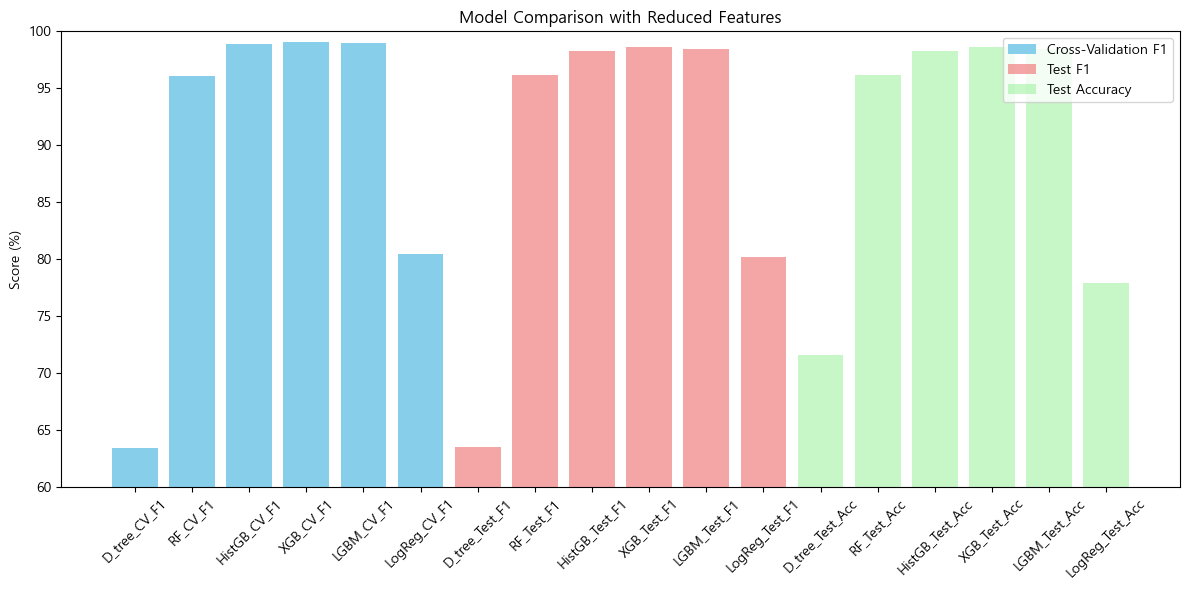

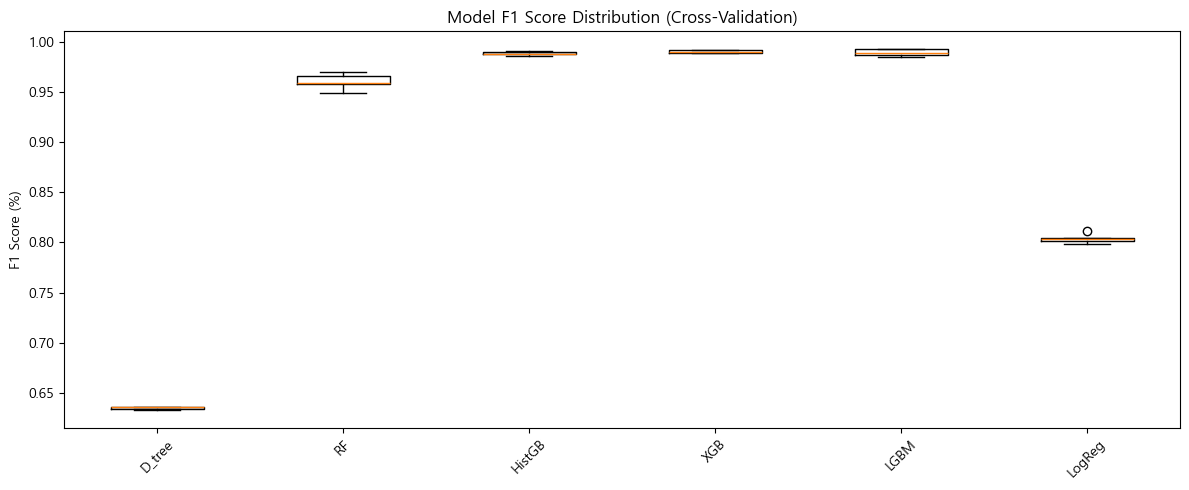

In [123]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# ÏûÖÎ†• ÌîºÏ≤ò Î∞è ÌÉÄÍ≤ü ÏÑ§Ï†ï
HE_obe_input_features= [ 'HE_wc', 'HE_wt', 'HE_sbp1', 'HE_ht', 'HE_dbp1',  'HE_glu', 'HE_alt', 'HE_crea', 'HE_TG', 'HE_HDL_st2', "HE_BMI", 'age', 'sex']

# XÏôÄ y Ï†ïÏùò
X = data[HE_obe_input_features]
y = data['HE_obe'].astype(int) - 1

# ÌõàÎ†®/ÌÖåÏä§Ìä∏ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# SMOTEÎ°ú Ïò§Î≤ÑÏÉòÌîåÎßÅ
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Î∂ÑÎ•òÍ∏∞ Ï†ïÏùò
classifiers = [
    ('D_tree', DecisionTreeClassifier(max_depth=3, min_samples_split=10, random_state=0, class_weight='balanced')),
    ('RF', RandomForestClassifier(n_estimators=50, max_depth=5, random_state=0, class_weight='balanced')),
    ('HistGB', HistGradientBoostingClassifier(learning_rate=0.1, max_iter=100, random_state=0)),
    ('XGB', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0)),
    ('LGBM', LGBMClassifier(random_state=0, class_weight='balanced')),
    ('LogReg', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=0))
]

classifier_names = [name for name, _ in classifiers]
classifiers = [clf for _, clf in classifiers]

# Í≤∞Í≥º Ï†ÄÏû•Ïö© Î¶¨Ïä§Ìä∏
modelaccuracies = []
modelmeans = []
modelnames = []
modeltest_f1 = []
modeltest_acc = []

# Î™®Îç∏ ÌõàÎ†® Î∞è ÌèâÍ∞Ä
for classifier_name, classifier in zip(classifier_names, classifiers):
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    accuracies = cross_val_score(classifier, X_train, y_train, cv=skf, scoring='f1_weighted')
    print(f"\n‚ñ∂ Mean F1 score (CV) of {classifier_name}: {accuracies.mean()*100:.2f}%")
    modelaccuracies.append(accuracies)
    modelnames.append(classifier_name)
    modelmeans.append(accuracies.mean()*100)

    classifier.fit(X_train_smote, y_train_smote)
    y_pred = classifier.predict(X_test)
    test_f1 = f1_score(y_test, y_pred, average='weighted')
    test_acc = accuracy_score(y_test, y_pred)
    modeltest_f1.append(test_f1*100)
    modeltest_acc.append(test_acc*100)
    print(f"‚ñ∂ Test F1 score of {classifier_name}: {test_f1*100:.2f}%")
    print(f"‚ñ∂ Test Accuracy of {classifier_name}: {test_acc*100:.2f}%")

# ÏÑ±Îä• ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 6))
plt.ylim([60, 100])
plt.bar([name + "_CV_F1" for name in modelnames], modelmeans, color='skyblue', label='Cross-Validation F1')
plt.bar([name + "_Test_F1" for name in modelnames], modeltest_f1, color='lightcoral', label='Test F1', alpha=0.7)
plt.bar([name + "_Test_Acc" for name in modelnames], modeltest_acc, color='lightgreen', label='Test Accuracy', alpha=0.5)
plt.xticks(rotation=45)
plt.ylabel('Score (%)')
plt.title('Model Comparison with Reduced Features')
plt.legend()
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)
ax.boxplot(modelaccuracies)
ax.set_xticklabels(modelnames, rotation=45)
ax.set_ylabel('F1 Score (%)')
ax.set_title('Model F1 Score Distribution (Cross-Validation)')
plt.tight_layout()
plt.show()


| Model   | CV F1 (%) | Test F1 (%) | Test Accuracy (%) |
| ------- | --------- | ----------- | ----------------- |
| D_tree  | 63.46     | 63.55       | 71.54             |
| RF      | 96.09     | 96.20       | 96.17             |
| HistGB  | 98.88     | 98.25       | 98.26             |
| XGB     | 99.06     | 98.60       | 98.60             |
| LGBM    | 98.97     | 98.48       | 98.48             |
| LogReg  | 80.42     | 80.16       | 77.95             |


HistGB ÏÑ†Ï†ï

                     precision    recall  f1-score   support

      Class 0 (Low)       0.97      0.99      0.98        94
   Class 1 (Normal)       1.00      0.99      1.00       825
Class 2 (Pre-obese)       0.99      0.99      0.99       496
   Class 2 (Obese1)       0.99      0.99      0.99       646
   Class 3 (Obese2)       0.98      0.97      0.97       118
   Class 4 (Obese3)       0.97      1.00      0.99        66

           accuracy                           0.99      2245
          macro avg       0.98      0.99      0.99      2245
       weighted avg       0.99      0.99      0.99      2245



<Figure size 600x600 with 0 Axes>

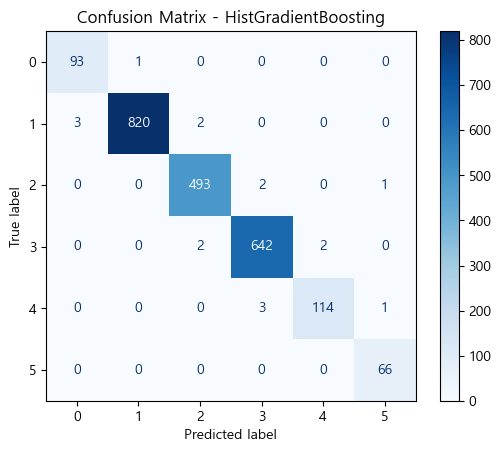

In [96]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, f1_score, accuracy_score
from imblearn.over_sampling import SMOTE
import shap
import matplotlib.pyplot as plt

# ÏûÖÎ†• ÌîºÏ≤ò Î∞è ÌÉÄÍ≤ü ÏÑ§Ï†ï
HE_obe_input_features= [ 'HE_wc', 'HE_wt', 'HE_sbp1', 'HE_ht', 'HE_dbp1',  'HE_glu', 'HE_alt', 'HE_crea', 'HE_TG', 'HE_HDL_st2', "HE_BMI", 'age', 'sex']

# XÏôÄ y Ï†ïÏùò
X = data[HE_obe_input_features]
y = data['HE_obe'].astype(int) - 1

# ÌõàÎ†®/ÌÖåÏä§Ìä∏ Î∂ÑÌï† Î®ºÏ†Ä ÏàòÌñâ
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏóêÎßå fit_transform
X_test_scaled = scaler.transform(X_test)  # ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏóêÎäî transformÎßå Ï†ÅÏö©

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
# SMOTEÎ•º Ïä§ÏºÄÏùºÎßÅÎêú ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïóê Ï†ÅÏö©
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)


from sklearn.metrics import classification_report

# HistGradientBoostingClassifierÎ°ú ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏°
best_model = HistGradientBoostingClassifier(learning_rate=0.1, max_iter=100, random_state=42)
best_model.fit(X_train_smote, y_train_smote)
y_pred = best_model.predict(X_test_scaled)

# ÌÅ¥ÎûòÏä§Î≥Ñ F1 Ïä§ÏΩîÏñ¥ Ï∂úÎ†•
print(classification_report(y_test, y_pred, target_names=['Class 0 (Low)', 'Class 1 (Normal)', 'Class 2 (Pre-obese)', 'Class 2 (Obese1)', 'Class 3 (Obese2)', 'Class 4 (Obese3)']))
'Low', 'Normal', 'Pre-obese', 'Obese1', 'Obese2', 'Obese3'
# ÌèâÍ∞Ä ÏßÄÌëú Î∞è ÌòºÎèôÌñâÎ†¨
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(class_report).transpose()

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(6, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - HistGradientBoosting")
plt.show()

HE_BMIÎäî Ï§ëÏã¨ÏÑ±(0.545)ÏóêÏÑúÎèÑ ÏÉÅÏúÑÍ∂åÏù¥ÏßÄÎßå, Ï≤´ Î≤àÏß∏ ÏÉòÌîåÏóê ÎåÄÌïú SHAP Í∞í(3.159)Ïù¥ Îã§Î•∏ ÌäπÏÑ±Îì§Ïùò SHAP Í∞í(0.413, 0.206 Îì±)Ïóê ÎπÑÌï¥ ÏõîÎì±Ìûà ÎÜíÏäµÎãàÎã§. Ïù¥Îäî Î™®Îç∏Ïù¥ ÎπÑÎßå ÏÉÅÌÉúÎ•º ÏòàÏ∏°Ìï† Îïå **Í∞ÄÏû• Í∞ïÎ†•ÌïòÍ≥† ÏßÅÏ†ëÏ†ÅÏúºÎ°ú ÏùòÏ°¥ÌïòÎäî ÌäπÏÑ±Ïù¥ HE_BMI**ÎùºÎäî Í≤ÉÏùÑ Î™ÖÌôïÌûà Î≥¥Ïó¨Ï§çÎãàÎã§.

ÏÉÅÍ¥Ä ÌñâÎ†¨ÏùÄ **Ìï¥Îãπ ÏßàÎ≥ë(Ï¢ÖÏÜç Î≥ÄÏàò)ÏùÑ ÏòàÏ∏°ÌïòÎäî Î™®Îç∏ ÎÇ¥ÏóêÏÑú, ÎèÖÎ¶Ω Î≥ÄÏàòÎì§Ïùò 'ÏòàÏ∏°Ïóê ÎåÄÌïú Í∏∞Ïó¨ÎèÑ(SHAP Í∞í)' Ìå®ÌÑ¥Ïù¥ Ïñ¥ÎñªÍ≤å ÏÑúÎ°ú Ïó∞Í¥ÄÎêòÏñ¥ ÏûàÎäîÍ∞Ä**Î•º ÎÇòÌÉÄÎÇ¥Îäî Í≤É

ÏÉÅÍ¥Ä ÌñâÎ†¨ ÏÉòÌîå:
            HE_wc     HE_wt   HE_sbp1     HE_ht   HE_dbp1    HE_glu    HE_alt  \
HE_wc    1.000000 -0.225441  0.346168 -0.183762  0.010023  0.049818  0.078285   
HE_wt   -0.225441  1.000000 -0.111827  0.312991 -0.008322  0.027741  0.018898   
HE_sbp1  0.346168 -0.111827  1.000000 -0.117060  0.320166  0.082849  0.209176   
HE_ht   -0.183762  0.312991 -0.117060  1.000000  0.029039 -0.002006 -0.037664   
HE_dbp1  0.010023 -0.008322  0.320166  0.029039  1.000000  0.044969  0.202583   

          HE_crea     HE_TG  HE_HDL_st2    HE_BMI       age       sex  
HE_wc    0.066295  0.094651   -0.120019  0.301906  0.015908 -0.200780  
HE_wt    0.022983 -0.139383    0.003457 -0.487088  0.065132  0.206431  
HE_sbp1  0.243955  0.156284    0.076426  0.081955  0.144825 -0.061578  
HE_ht    0.042955 -0.065344    0.065478 -0.402007  0.277689  0.320988  
HE_dbp1  0.178625  0.152138    0.140551 -0.132152  0.295261  0.136201  

 ÏÉÅÍ¥Ä ÌñâÎ†¨ ÏÉòÌîå:
          ÌóàÎ¶¨ÎëòÎ†à(cm)  Î¨¥Í≤å(

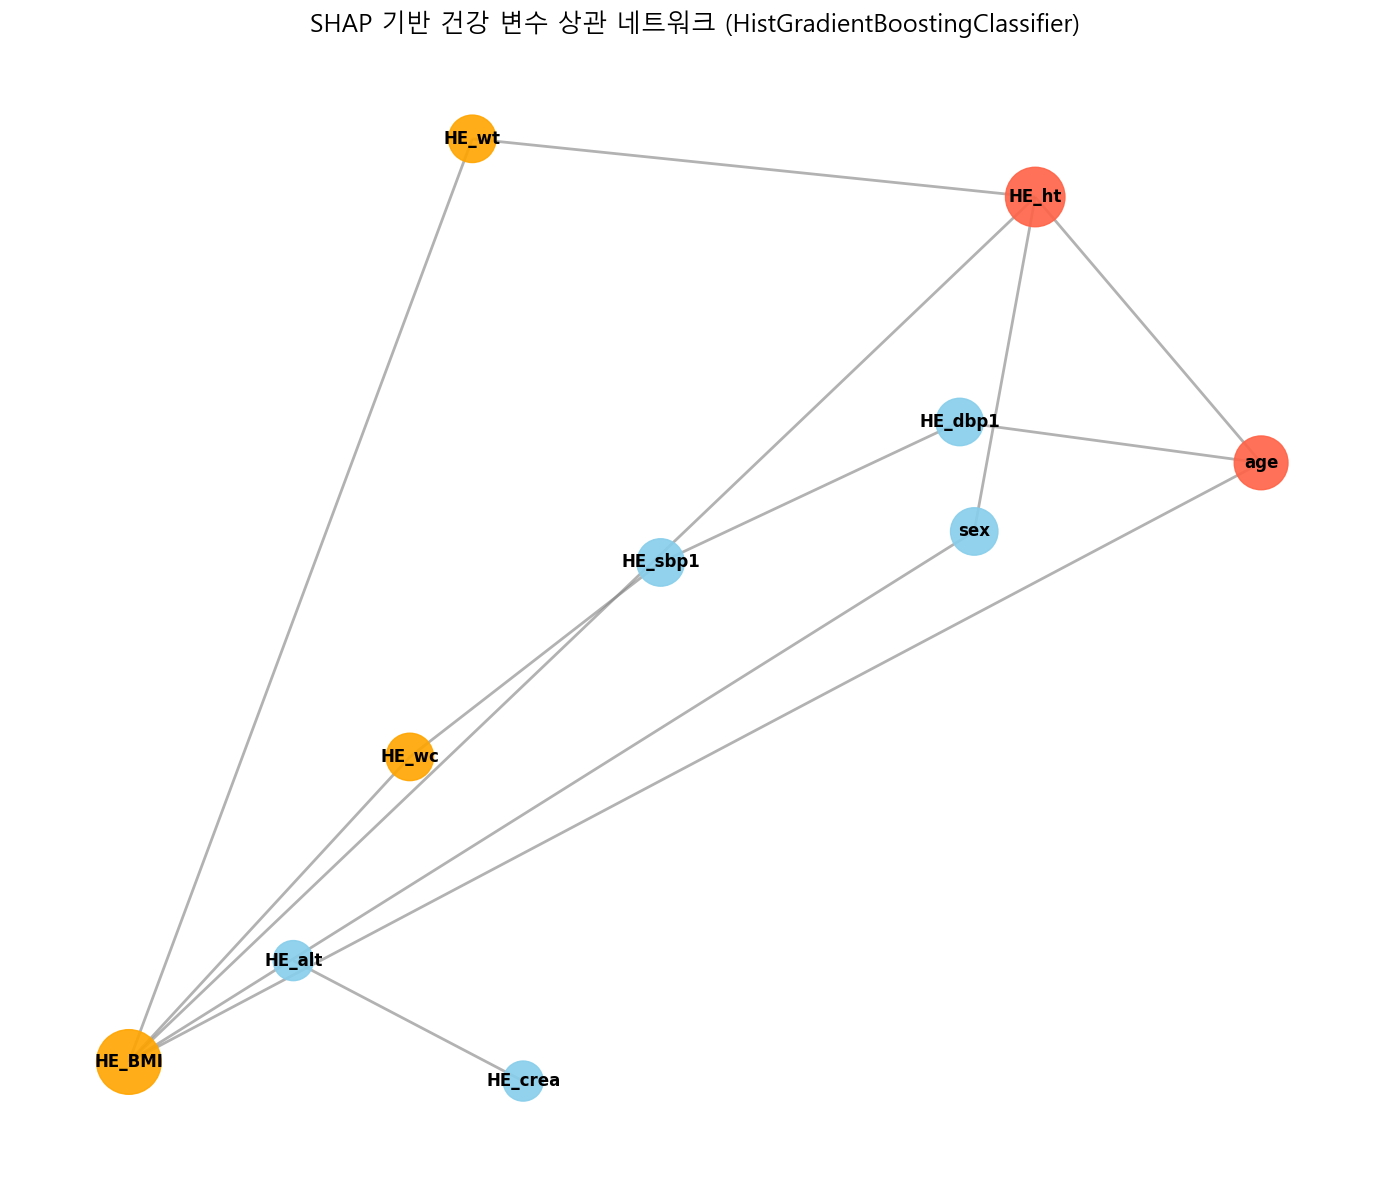


=== ÏßàÎ≥ë ÏòàÏ∏°Ïùò ÏÉÅÏúÑ 3Í∞ú Ï§ëÏöî ÌîºÏ≤ò ===
Ï≤¥ÏßàÎüâÏßÄÏàò(BMI): SHAP Í∞í 4.109
ÌóàÎ¶¨ÎëòÎ†à(cm): SHAP Í∞í 0.198
Î¨¥Í≤å(kg): SHAP Í∞í 0.189

=== ÏÉÅÏúÑ 3Í∞ú Ï§ëÏöî ÌîºÏ≤ò ===
1. Ï≤¥ÏßàÎüâÏßÄÏàò(BMI)
2. ÌóàÎ¶¨ÎëòÎ†à(cm)
3. Î¨¥Í≤å(kg)

ÏÇ¨Ïö©Ïûê ÎßûÏ∂§ Î¶¨Ìè¨Ìä∏ ÏöîÏïΩ
‚óè ÏßàÎ≥ë ÏòàÏ∏° ÏÇ¨Î°ÄÎ°ú Î≥º Îïå:
  ‚Üí ÎπÑÎßåÏùò ÏòàÏ∏° Í≤∞Í≥ºÎäî Îã§Î•∏ Ïñ¥Îñ§ ÌäπÏÑ±Î≥¥Îã§ Ï≤¥ÏßàÎüâÏßÄÏàò(BMI) Í∞íÏóê ÏùòÌï¥ Í∞ÄÏû• Í∞ïÎ†•ÌïòÍ≤å Í≤∞Ï†ïÎêòÏóàÏúºÎ©∞,
    Í∑∏Îã§ÏùåÏúºÎ°ú ÌóàÎ¶¨ÎëòÎ†à(cm), Î¨¥Í≤å(kg) Í∞Ä Ïù¥ Í∞úÏù∏Ïùò ÎãπÎá® ÏòàÏ∏°Ïóê Ï§ëÏöîÌïú ÏòÅÌñ•ÏùÑ ÎØ∏Ï≥§ÏäµÎãàÎã§.

Ïù¥Îü¨Ìïú Í≤∞Í≥ºÎäî Ï∂îÌõÑ ÏÇ¨Ïö©Ïûê ÎßûÏ∂§Ìòï Í±¥Í∞ï Í∞ÄÏù¥ÎìúÎùºÏù∏ Ï†úÍ≥µ Ïãú Ï§ëÏöîÌïú Í∏∞Ï§ÄÏù¥ Îê† Í≤É ÏûÖÎãàÎã§.


In [97]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, f1_score, accuracy_score
from imblearn.over_sampling import SMOTE
import shap
import matplotlib.pyplot as plt
import networkx as nx

# ÌïúÍ∏Ä Î≥ÄÏàòÎ™Ö Îß§Ìïë
feature_kor_map = {
'HE_glu': 'Í≥µÎ≥µÌòàÎãπ',
'HE_sbp1': 'ÏàòÏ∂ïÍ∏∞ ÌòàÏïï',
'HE_dbp1': 'Ïù¥ÏôÑÍ∏∞ ÌòàÏïï',
'HE_BMI': 'Ï≤¥ÏßàÎüâÏßÄÏàò(BMI)',
'HE_wc' : "ÌóàÎ¶¨ÎëòÎ†à(cm)",
'HE_TG': 'Ï§ëÏÑ±ÏßÄÎ∞©',
'HE_chol': 'Ï¥ù ÏΩúÎ†àÏä§ÌÖåÎ°§',
'HE_LDL_drct': 'LDL ÏΩúÎ†àÏä§ÌÖåÎ°§',
'HE_HDL_st2': 'HDL ÏΩúÎ†àÏä§ÌÖåÎ°§',
'sex': 'ÏÑ±Î≥Ñ',
'age': 'ÎÇòÏù¥',
'HE_wt': 'Î¨¥Í≤å(kg)',
'HE_ht': 'Ïã†Ïû•(cm)',
'HE_crea' : 'ÌÅ¨Î†àÏïÑÌã¥'
}

# ÏûÖÎ†• ÌîºÏ≤ò Î∞è ÌÉÄÍ≤ü ÏÑ§Ï†ï
HE_obe_input_features= [ 'HE_wc', 'HE_wt', 'HE_sbp1', 'HE_ht', 'HE_dbp1',  'HE_glu', 'HE_alt', 'HE_crea', 'HE_TG', 'HE_HDL_st2', "HE_BMI", 'age', 'sex']

# XÏôÄ y Ï†ïÏùò
X = data[HE_obe_input_features]
y = data['HE_obe'].astype(int) - 1


smote = SMOTE(random_state=42)
# SMOTEÎ•º Ïä§ÏºÄÏùºÎßÅÎêú ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïóê Ï†ÅÏö©
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)


from sklearn.metrics import classification_report

# HistGradientBoostingClassifierÎ°ú ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏°
best_model = HistGradientBoostingClassifier(learning_rate=0.1, max_iter=100, random_state=42)
# Ïä§ÏºÄÏùºÎßÅÎêòÍ≥† SMOTE Ï†ÅÏö©Îêú ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Î°ú Î™®Îç∏ ÌïôÏäµ
best_model.fit(X_train_smote, y_train_smote)
# Ïä§ÏºÄÏùºÎßÅÎêú ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î°ú ÏòàÏ∏°
y_pred = best_model.predict(X_test_scaled)


# SHAP Í∞í Í≥ÑÏÇ∞
explainer = shap.TreeExplainer(best_model)
# SHAP Í∞íÏùÑ Ïä§ÏºÄÏùºÎßÅÎêú ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥ Í≥ÑÏÇ∞
shap_values = explainer.shap_values(X_test_scaled)

# SHAP Í∞í Ï≤òÎ¶¨ (ÌÅ¥ÎûòÏä§Î≥Ñ ÌèâÍ∑† Ï†àÎåÄÍ∞íÏúºÎ°ú 2Ï∞®Ïõê Î≥ÄÌôò)
if isinstance(shap_values, list):
    # Î¶¨Ïä§Ìä∏ ÌòïÌÉúÏùº Í≤ΩÏö∞ (ÎåÄÎ∂ÄÎ∂ÑÏùò Îã§Ï§ë ÌÅ¥ÎûòÏä§ TreeExplainer) ÌÅ¥ÎûòÏä§Î≥Ñ Ï†àÎåÄÍ∞íÏùò ÌèâÍ∑†
    # Í∞Å ÌÅ¥ÎûòÏä§Î≥Ñ SHAP Í∞íÏùò ÌÅ¨Í∏∞Î•º ÏÉòÌîåÎ≥ÑÎ°ú ÌèâÍ∑† (n_samples, n_features)
    shap_values_class = np.mean([np.abs(val) for val in shap_values], axis=0)
elif len(shap_values.shape) == 3:  # (n_samples, n_features, n_classes) ÌòïÌÉúÏùº Í≤ΩÏö∞
    # ÌÅ¥ÎûòÏä§ Ï∞®Ïõê ÌèâÍ∑† Ï†àÎåÄÍ∞í (n_samples, n_features)
    shap_values_class = np.mean(np.abs(shap_values), axis=2)
else: # (n_samples, n_features) ÌòïÌÉúÏùº Í≤ΩÏö∞ (Ïù¥ÏßÑ Î∂ÑÎ•ò ÎòêÎäî Ïù¥ÎØ∏ ÌÅ¥ÎûòÏä§Î≥Ñ ÌèâÍ∑†Îêú Í≤ΩÏö∞)
    shap_values_class = np.abs(shap_values)


# SHAP DataFrame ÏÉùÏÑ± (Ïª¨ÎüºÎ™ÖÏùÄ ÏõêÎ≥∏ ÌäπÏÑ± Ïù¥Î¶Ñ ÏÇ¨Ïö©)
# Ïä§ÏºÄÏùºÎßÅÎêú Îç∞Ïù¥ÌÑ∞Î°ú SHAPÏùÑ Í≥ÑÏÇ∞ÌñàÏßÄÎßå, DataFrame Ïª¨ÎüºÎ™ÖÏùÄ ÏõêÎ≥∏ ÌäπÏÑ± Ïù¥Î¶Ñ ÏÇ¨Ïö©
shap_df = pd.DataFrame(shap_values_class, columns=HE_obe_input_features)


# ÏÉÅÍ¥Ä ÌñâÎ†¨ Í≥ÑÏÇ∞ Î∞è ÎîîÎ≤ÑÍπÖ
print("ÏÉÅÍ¥Ä ÌñâÎ†¨ ÏÉòÌîå:")
print(shap_df.corr().head())  # ÏÉÅÍ¥Ä ÌñâÎ†¨ ÏùºÎ∂Ä Ï∂úÎ†•
cor_matrix = shap_df.corr()
# Ïª¨ÎüºÎ™ÖÏùÑ ÌïúÍ∏ÄÎ°ú Î∞îÍæ∏Ïñ¥ Ï∂úÎ†•
cor_matrix_kor = cor_matrix.rename(index=feature_kor_map, columns=feature_kor_map)
print("\n ÏÉÅÍ¥Ä ÌñâÎ†¨ ÏÉòÌîå:")
print(cor_matrix_kor.round(2).head())

# ÎÑ§Ìä∏ÏõåÌÅ¨ ÏÉùÏÑ±
G = nx.Graph()
threshold = 0.25  # ÏÉÅÍ¥ÄÍ≥ÑÏàò ÏûÑÍ≥ÑÍ∞í
edge_count = 0
for i in range(len(cor_matrix.columns)):
    for j in range(i + 1, len(cor_matrix.columns)):
        corr_val = cor_matrix.iloc[i, j]
        if abs(corr_val) >= threshold:
            G.add_edge(cor_matrix.columns[i], cor_matrix.columns[j], weight=corr_val)
            edge_count += 1
print(f"ÎÑ§Ìä∏ÏõåÌÅ¨Ïóê Ï∂îÍ∞ÄÎêú Ïó£ÏßÄ Ïàò: {edge_count}")

# Ï§ëÏã¨ÏÑ± Í≥ÑÏÇ∞ (Degree Centrality)
centrality = nx.degree_centrality(G)
if not centrality:
    print("ÎÑ§Ìä∏ÏõåÌÅ¨Ïóê ÎÖ∏ÎìúÍ∞Ä ÏóÜÏùå. thresholdÎ•º ÎÇÆÏ∂îÍ±∞ÎÇò Îç∞Ïù¥ÌÑ∞Î•º ÌôïÏù∏ÌïòÏÑ∏Ïöî.")
else:
    # ÏÉÅÏúÑ 3Í∞ú ÎÖ∏Îìú Í∏∞Ï§ÄÏúºÎ°ú ÏÉâ Íµ¨Î∂Ñ
    top_nodes = sorted(centrality, key=centrality.get, reverse=True)[:3]

    # ÌäπÏ†ï ÏÉòÌîå(Ï≤´ Î≤àÏß∏ ÌÖåÏä§Ìä∏ ÏÉòÌîå)Ïùò ÏÉÅÏúÑ 3Í∞ú Ï§ëÏöî ÌîºÏ≤ò
    user_idx = 0  # Ï≤´ Î≤àÏß∏ ÌÖåÏä§Ìä∏ ÏÉòÌîå
    top3_user_feats = shap_df.iloc[user_idx].abs().sort_values(ascending=False).head(3).index.tolist()

    # ÎÖ∏Îìú ÏÉâÏÉÅ ÏÑ§Ï†ï
    node_colors = []
    for node in G.nodes:
        if node in top3_user_feats:
            node_colors.append('orange')  # ÌäπÏ†ï ÏÉòÌîåÏùò ÏÉÅÏúÑ ÌîºÏ≤ò
        elif node in top_nodes:
            node_colors.append('tomato')  # Ï§ëÏã¨ÏÑ±Ïù¥ ÎÜíÏùÄ ÌîºÏ≤ò
        else:
            node_colors.append('skyblue')  # ÎÇòÎ®∏ÏßÄ ÌîºÏ≤ò

    # ÎÑ§Ìä∏ÏõåÌÅ¨ ÏãúÍ∞ÅÌôî
    plt.figure(figsize=(14, 12))
    pos = nx.spring_layout(G, k=0.5, seed=42)
    node_sizes = [500 + 3000 * centrality[n] for n in G.nodes]

    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes, alpha=0.9)
    nx.draw_networkx_edges(G, pos, edge_color='gray', width=2, alpha=0.6)
    nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold', font_color='black')

    plt.title("SHAP Í∏∞Î∞ò Í±¥Í∞ï Î≥ÄÏàò ÏÉÅÍ¥Ä ÎÑ§Ìä∏ÏõåÌÅ¨ (HistGradientBoostingClassifier)", fontsize=18)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

    # Ï§ëÏã¨ÏÑ± Top 3 Î≥ÄÏàò (ÌïúÍ∏Ä Ïù¥Î¶Ñ)
    top_nodes_kor = [feature_kor_map.get(node, node) for node in top_nodes]
    # SHAP Top 3 Î≥ÄÏàò (ÌïúÍ∏Ä Ïù¥Î¶Ñ)
    top3_feats_kor = [feature_kor_map.get(feat, feat) for feat in top3_user_feats]

    # ÏÉÅÏúÑ ÌîºÏ≤ò Ï∂úÎ†•
    # Ï§ëÏã¨ÏÑ± ÌîºÏ≤ò Ï∂úÎ†•
    # print("=== ÏÉÅÏúÑ Ï§ëÏã¨ÏÑ± ÌîºÏ≤ò (Top 3) ===")
    # for node in top_nodes:
    #     kor_name = feature_kor_map.get(node, node)
    #     print(f"{kor_name}: Ï§ëÏã¨ÏÑ± {centrality[node]:.3f}")

    # ÏÉòÌîå Í∏∞Î∞ò SHAP Ï§ëÏöî ÌîºÏ≤ò Ï∂úÎ†•
    print("\n=== ÏßàÎ≥ë ÏòàÏ∏°Ïùò ÏÉÅÏúÑ 3Í∞ú Ï§ëÏöî ÌîºÏ≤ò ===")
    for feat in top3_user_feats:
        kor_name = feature_kor_map.get(feat, feat)
        shap_val = shap_df.iloc[user_idx][feat]
        print(f"{kor_name}: SHAP Í∞í {shap_val:.3f}")


    # print("\n=== ÏÉÅÏúÑ Ï§ëÏã¨ÏÑ±(Ïó∞Í¥ÄÏÑ±) ÌîºÏ≤ò (Top 3) ===")
    # for idx, node in enumerate(top_nodes, 1):
    #     kor_name = feature_kor_map.get(node, node)
    #     print(f"{idx}. {kor_name}")

    print("\n=== ÏÉÅÏúÑ 3Í∞ú Ï§ëÏöî ÌîºÏ≤ò ===")
    for idx, feat in enumerate(top3_user_feats, 1):
        kor_name = feature_kor_map.get(feat, feat)
        shap_val = shap_df.iloc[user_idx][feat]
        print(f"{idx}. {kor_name}")

    # Ï∂úÎ†•
    print("\nÏÇ¨Ïö©Ïûê ÎßûÏ∂§ Î¶¨Ìè¨Ìä∏ ÏöîÏïΩ")

    # print(f"‚óè Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú Î≥º Îïå (Ï§ëÏã¨ÏÑ±(Ïó∞Í¥ÄÏÑ±) Í∏∞Î∞ò):\n  ‚Üí {', '.join(top_nodes_kor)} Îäî(ÏùÄ) Î™®Îç∏Ïù¥ ÎπÑÎßå ÏÉÅÌÉúÎ•º ÏòàÏ∏°Ìï† Îïå")
    # print("    Îã§Î•∏ ÎßéÏùÄ ÏÉùÏ≤¥ ÏßÄÌëúÎì§Í≥º Î≥µÌï©Ï†ÅÏúºÎ°ú Ïó∞Í¥ÄÎêòÏñ¥ ÏûëÏö©ÌïòÎäî ÌïµÏã¨Ï†ÅÏù∏ ÌäπÏÑ±Îì§ÏûÖÎãàÎã§.\n")

    print(f"‚óè ÏßàÎ≥ë ÏòàÏ∏° ÏÇ¨Î°ÄÎ°ú Î≥º Îïå:\n  ‚Üí ÎπÑÎßåÏùò ÏòàÏ∏° Í≤∞Í≥ºÎäî Îã§Î•∏ Ïñ¥Îñ§ ÌäπÏÑ±Î≥¥Îã§ {top3_feats_kor[0]} Í∞íÏóê ÏùòÌï¥ Í∞ÄÏû• Í∞ïÎ†•ÌïòÍ≤å Í≤∞Ï†ïÎêòÏóàÏúºÎ©∞,")
    print(f"    Í∑∏Îã§ÏùåÏúºÎ°ú {top3_feats_kor[1]}, {top3_feats_kor[2]} Í∞Ä Ïù¥ Í∞úÏù∏Ïùò ÎãπÎá® ÏòàÏ∏°Ïóê Ï§ëÏöîÌïú ÏòÅÌñ•ÏùÑ ÎØ∏Ï≥§ÏäµÎãàÎã§.")

    print("\nÏù¥Îü¨Ìïú Í≤∞Í≥ºÎäî Ï∂îÌõÑ ÏÇ¨Ïö©Ïûê ÎßûÏ∂§Ìòï Í±¥Í∞ï Í∞ÄÏù¥ÎìúÎùºÏù∏ Ï†úÍ≥µ Ïãú Ï§ëÏöîÌïú Í∏∞Ï§ÄÏù¥ Îê† Í≤É ÏûÖÎãàÎã§.")
    

In [ ]:
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.calibration import CalibratedClassifierCV

# ÏÇ¨Ïö©Ïûê ÏûÖÎ†• Ï≤òÎ¶¨ Ìï®Ïàò
def process_user_input(user_data, features, scaler, train_means):
    user_df = pd.DataFrame([user_data]).reindex(columns=features)
    user_df = user_df.fillna(train_means)  # ÎàÑÎùΩÎêú ÌîºÏ≤òÎ•º ÌèâÍ∑†Í∞íÏúºÎ°ú Ï±ÑÏõÄ
    user_scaled = scaler.transform(user_df)
    return user_df, user_scaled

# ÏòàÏ∏° Ìï®Ïàò
def predict_disease_probabilities(user_scaled, model, stages, class_explanations):
    probs = model.predict_proba(user_scaled)[0]
    stage_index = np.argmax(probs)
    stage = stages.get(stage_index, "Unknown")
    explanation = class_explanations.get(stage_index, "No explanation available.")
    class_probs_formatted = [f"{probs[i]:.2f}" for i in range(len(probs))]
    return {
        "probabilities": class_probs_formatted,
        "predicted_class": stage_index + 1,
        "class_name": stage,
        "explanation": explanation
    }

# Í∞Å ÌÅ¥ÎûòÏä§Ïùò ÏÑ§Î™Ö
diabetes_class_explanations = {
    0: "ÌòàÎãπ ÏàòÏ§ÄÏù¥ Ï†ïÏÉÅÏûÖÎãàÎã§. ÎãπÎá®Î≥ë ÏúÑÌóòÏù¥ ÎÇÆÏäµÎãàÎã§.",
    1: "ÌòàÎãπÏù¥ Ï†ïÏÉÅÎ≥¥Îã§ ÎÜíÏùÄ ÏàòÏ§ÄÏù¥ÏßÄÎßå ÎãπÎá®Î≥ëÏóêÎäî Ïù¥Î•¥ÏßÄ ÏïäÏïòÏäµÎãàÎã§. ÏÉùÌôúÏäµÍ¥Ä Í∞úÏÑ†Ïù¥ ÌïÑÏöîÌï©ÎãàÎã§.",
    2: "ÎãπÎá®Î≥ëÏúºÎ°ú ÏßÑÎã®ÎêòÏóàÏäµÎãàÎã§. Ï†ÑÎ¨∏Í∞ÄÏôÄ ÏÉÅÎã¥Ïù¥ ÌïÑÏöîÌï©ÎãàÎã§."
}

hypertension_class_explanations = {
    0: "ÌòàÏïïÏù¥ Ï†ïÏÉÅ Î≤îÏúÑÏóê ÏûàÏäµÎãàÎã§.",
    1: "ÌòàÏïïÏù¥ Ï†ïÏÉÅÎ≥¥Îã§ ÎÜíÏßÄÎßå Í≥†ÌòàÏïï Ï†ÑÎã®Í≥ÑÎ°ú Í∞ÑÏ£ºÎê©ÎãàÎã§. Í±¥Í∞ï Í¥ÄÎ¶¨Í∞Ä ÌïÑÏöîÌï©ÎãàÎã§.",
    2: "Í≥†ÌòàÏïï Ï†ÑÎã®Í≥ÑÎ°ú, ÏÉùÌôúÏäµÍ¥Ä Í∞úÏÑ†Í≥º ÏπòÎ£åÍ∞Ä ÌïÑÏöîÌï† Ïàò ÏûàÏäµÎãàÎã§.",
    3: "Í≥†ÌòàÏïï, Ï†ÑÎ¨∏Í∞ÄÏùò ÏßÑÎã®Í≥º ÏπòÎ£åÍ∞Ä ÌïÑÏöîÌï©ÎãàÎã§."
}

obesity_class_explanations = {
    0: "Ï†ÄÏ≤¥Ï§ëÏûÖÎãàÎã§. Ï≤¥Ï§ë Ï¶ùÍ∞ÄÍ∞Ä ÌïÑÏöîÌï† Ïàò ÏûàÏäµÎãàÎã§.",
    1: "Ï†ïÏÉÅ Ï≤¥Ï§ëÏûÖÎãàÎã§. Ïú†ÏßÄ Í¥ÄÎ¶¨Í∞Ä ÌïÑÏöîÌï©ÎãàÎã§.",
    2: "Í≥ºÏ≤¥Ï§ëÏûÖÎãàÎã§. Ï≤¥Ï§ë Í∞êÎüâÏùÑ Í≥†Î†§Ìï† Ïàò ÏûàÏäµÎãàÎã§.",
    3: "ÎπÑÎßåÏûÖÎãàÎã§. Ï≤¥Ï§ë Í∞êÎüâÍ≥º Í±¥Í∞ï Í¥ÄÎ¶¨Í∞Ä ÌïÑÏöîÌï©ÎãàÎã§.",
    4: "Í≥†ÎèÑ ÎπÑÎßåÏûÖÎãàÎã§. Ï†ÑÎ¨∏Í∞ÄÏùò ÏßÑÎã®Í≥º Í¥ÄÎ¶¨Í∞Ä ÌïÑÏöîÌï©ÎãàÎã§.",
    5: "Ï¥àÍ≥†ÎèÑ ÎπÑÎßåÏûÖÎãàÎã§. Ï†ÑÎ¨∏Í∞ÄÏùò ÎèÑÏõÄÏùÑ Î∞õÏïÑÏïº Ìï©ÎãàÎã§."
}

user_data = {
    'HE_glu': 90.0,       # Í≥µÎ≥µ ÌòàÎãπ 100~125 ‚Üí Í≤ΩÍ≥ÑÌòï ÎãπÎá®
    'HE_HbA1c': 6.0,       # HbA1c ÏïΩÍ∞Ñ ÎÜíÏùÄ ÏàòÏ§Ä (Ï∞∏Í≥†)
    'HE_ht': 170, 
    'HE_wt': 63,           # ÌÇ§ 170Ïóê Ï≤¥Ï§ë 63Ïù¥Î©¥ BMI ÏïΩ 21.8 ‚Üí Ï†ïÏÉÅ
    'HE_wc': 78, 
    'HE_BMI': 21.8,
    'HE_sbp1': 150,        # ÏàòÏ∂ïÍ∏∞ ÌòàÏïï 140 Ïù¥ÏÉÅ ‚Üí Í≥†ÌòàÏïï Ïú†ÏßÄ
    'HE_dbp1': 90,
    'HE_sbp2': 140, 
    'HE_dbp2': 85,
    'HE_Upro': 3,
    'HE_chol': 200, 
    'HE_HDL_st2': 55,
    'HE_TG': 120, 
    'HE_LDL_drct': 110, 
    'HE_crea': 0.85, 
    'HE_ast': 22, 
    'HE_alt': 18,
    'LS_FRUOT': 5
}


# Î™®Îç∏, Ïä§ÏºÄÏùºÎü¨, ÌîºÏ≤ò, ÌèâÍ∑†Í∞í Î°úÎìú
model_dm = joblib.load('For_HE_DM_HbA1c_calibrated_real.pkl')
scaler_dm = joblib.load('HE_DM_HbA1c_scaler_real.pkl')
features_dm = joblib.load('HE_DM_HbA1c_input_features_list_real.pkl')
train_means_dm = joblib.load('train_means_dm_real.pkl')

model_hp = joblib.load('For_HE_HP_calibrated_real.pkl')
scaler_hp = joblib.load('HE_HP_scaler_real.pkl')
features_hp = joblib.load('HE_HP_input_features_list_real.pkl')
train_means_hp = joblib.load('train_means_hp_real.pkl')

model_obesity = joblib.load('For_HE_obe_calibrated_real.pkl')
scaler_obesity = joblib.load('HE_obe_scaler_real.pkl')
features_obesity = joblib.load('HE_obe_input_features_list_real.pkl')
train_means_obesity = joblib.load('train_means_obe_real.pkl')



# ÏÇ¨Ïö©Ïûê ÏûÖÎ†• Ï≤òÎ¶¨ Î∞è ÏòàÏ∏°
user_df_dm, user_scaled_dm = process_user_input(user_data, features_dm, scaler_dm, train_means_dm)
user_df_hp, user_scaled_hp = process_user_input(user_data, features_hp, scaler_hp, train_means_hp)
user_df_obesity, user_scaled_obesity = process_user_input(user_data, features_obesity, scaler_obesity, train_means_obesity)

# ÎãπÎá®Î≥ë ÏòàÏ∏°
diabetes_stages = {0: "Ï†ïÏÉÅ", 1: "Í≤ΩÍ≥ÑÌòï ÎãπÎá®", 2: "ÎãπÎá®Î≥ë"}
result_dm = predict_disease_probabilities(user_scaled_dm, model_dm, diabetes_stages, diabetes_class_explanations)

# Í≥†ÌòàÏïï ÏòàÏ∏°
hypertension_stages = {0: "Ï†ïÏÉÅ ÌòàÏïï", 1: "Ï£ºÏùò ÌòàÏïï Îã®Í≥Ñ", 2: "Í≥†ÌòàÏïï Ï†ÑÎã®Í≥Ñ", 3: "Í≥†ÌòàÏïï"}
result_hp = predict_disease_probabilities(user_scaled_hp, model_hp, hypertension_stages, hypertension_class_explanations)

# ÎπÑÎßåÎèÑ ÏòàÏ∏°
obesity_stages = {0: "Ï†ÄÏ≤¥Ï§ë", 1: "Ï†ïÏÉÅ Ï≤¥Ï§ë", 2: "Í≥ºÏ≤¥Ï§ë", 3: "ÎπÑÎßå", 4: "Í≥†ÎèÑ ÎπÑÎßå", 5: "Ï¥àÍ≥†ÎèÑ ÎπÑÎßå"}
result_obesity = predict_disease_probabilities(user_scaled_obesity, model_obesity, obesity_stages, obesity_class_explanations)


def generate_disease_report(user_name, disease_name, result, top_feature_name, user_value):
    # ‚úÖ ÏßàÎ≥ëÎ≥Ñ Ï†ïÏÉÅ ÌÅ¥ÎûòÏä§ Ïù∏Îç±Ïä§ ÏÑ§Ï†ï
    normal_class_index = {
        "ÎãπÎá®Î≥ë": 0,
        "Í≥†ÌòàÏïï": 0,
        "ÎπÑÎßå": 1
    }

    # ‚úÖ Í±¥Í∞ï Ï†êÏàò Í≥ÑÏÇ∞ (Ï†ïÏÉÅ ÌÅ¥ÎûòÏä§ ÌôïÎ•† Í∏∞Ï§Ä)
    normal_index = normal_class_index.get(disease_name, 0)
    prob_percent = float(result['probabilities'][normal_index]) * 100
    health_score = round(prob_percent, 1)

    # ‚úÖ ÏòàÏ∏°Îêú ÌÅ¥ÎûòÏä§ ÌôïÎ•† (ÏòàÏ∏° Í≤∞Í≥º ÏòÜÏóê ÌëúÏãú)
    predicted_index = result['predicted_class'] - 1
    predicted_prob = float(result['probabilities'][predicted_index]) * 100

    # Î≥ÄÏàò Ïù¥Î¶Ñ Îß§Ìïë (ÏÑ§Î™Ö Ï∂îÍ∞Ä)
    feature_label_map = {
        "HE_sbp1": "HE_sbp1 (ÏàòÏ∂ïÍ∏∞ ÌòàÏïï)",
        "HE_glu": "HE_glu (Í≥µÎ≥µÌòàÎãπ)",
        "HE_BMI": "HE_BMI(BMI)"
    }
    feature_label = feature_label_map.get(top_feature_name, top_feature_name)

    # Í∏∞Ï§Ä Î≤îÏúÑ ÏÑ§Ï†ï
    if top_feature_name == "HE_sbp1":
        if user_value <= 120:
            status = "Ï†ïÏÉÅ"
        elif 121 <= user_value <= 139:
            status = "Ï£ºÏùò"
        else:
            status = "Í≥†ÏúÑÌóò"
        normal = "90~120"
        warning = "121~139"
    elif top_feature_name == "HE_glu":
        if user_value <= 99:
            status = "Ï†ïÏÉÅ"
        elif 100 <= user_value <= 125:
            status = "Ï£ºÏùò"
        else:
            status = "Í≥†ÏúÑÌóò"
        normal = "70~99"
        warning = "100~125"
    elif top_feature_name == "HE_BMI":
        if user_value < 18.5:
            status = "Ï†ÄÏ≤¥Ï§ë"
        elif 18.5 <= user_value <= 22.9:
            status = "Ï†ïÏÉÅ"
        elif 23.0 <= user_value <= 24.9:
            status = "Í≥ºÏ≤¥Ï§ë"
        else:
            status = "ÎπÑÎßå"
        normal = "18.5~22.9"
        warning = "23.0~24.9 Ïù¥ÏÉÅ"
    else:
        status = "Ïïå Ïàò ÏóÜÏùå"
        normal = "-"
        warning = "-"

    # ‚úÖ Ï∂úÎ†•
    print(f"=== {disease_name} ÏòàÏ∏° Í≤∞Í≥º ===")
    # ÏòàÏ∏° Í≤∞Í≥ºÍ∞Ä Ï†ïÏÉÅÏùº ÎïåÎßå Î¨∏Íµ¨Î•º Îã§Î•¥Í≤å ÌëúÏãú
    if result['class_name'] == "Ï†ïÏÉÅ" or result['class_name'] == "Ï†ïÏÉÅ ÌòàÏïï" or result['class_name'] == "Ï†ïÏÉÅ Ï≤¥Ï§ë":
        print(f"1. {user_name}Îãò, ÌòÑÏû¨ {disease_name} Í¥ÄÎ†® ÏÉÅÌÉúÎäî Ï†ïÏÉÅÏúºÎ°ú ÏòàÏ∏°Îê©ÎãàÎã§.\n")
    else:
        print(f"1. {user_name}Îãò, Í±¥Í∞ïÏùÄ {disease_name} ÏúÑÌóòÏù¥ ÏûàÏäµÎãàÎã§.\n")
    print(f"2. Í±¥Í∞ï Ï†êÏàò: {health_score:.1f}Ï†ê")
    print(f"ÏòàÏ∏° Í≤∞Í≥º: {result['class_name']}, ÏòàÏ∏° ÌôïÎ•†: {predicted_prob:.1f}%)")
    print(f"ÏÑ§Î™Ö: {result['explanation']}\n")

    print(f"3. {feature_label} ÏàòÏπò: {user_value} ‚Üí ÏÉÅÌÉú: {status}")
    print(f"Ï†ïÏÉÅ Í∏∞Ï§Ä: {normal}, Ï£ºÏùò Í∏∞Ï§Ä: {warning}")
    print(f"Ïù¥ ÏàòÏπòÍ∞Ä ÎÜíÏïÑÏßÄÎ©¥ {disease_name} ÏúÑÌóòÏù¥ Ï¶ùÍ∞ÄÌï©ÎãàÎã§.\n")

# ÎåÄÌëú feature Îßµ
top_features = {
    "ÎãπÎá®Î≥ë": "HE_glu",
    "Í≥†ÌòàÏïï": "HE_sbp1",
    "ÎπÑÎßå": "HE_BMI"
}


# ÏßàÎ≥ëÎ≥Ñ Í≤∞Í≥ºÎ•º Î¨∂Í∏∞
disease_results = {
    "ÎãπÎá®Î≥ë": result_dm,
    "Í≥†ÌòàÏïï": result_hp,
    "ÎπÑÎßå": result_obesity
}

    # ÏûêÎèô Î¶¨Ìè¨Ìä∏ Ï∂úÎ†•
for disease_name, result in disease_results.items():
    top_feature = top_features[disease_name]
    user_value = user_data.get(top_feature, None)

    if user_value is not None:
        generate_disease_report(
            user_name="ÌôçÍ∏∏Îèô",
            disease_name=disease_name,
            result=result,
            top_feature_name=top_feature,
            user_value=user_value
        )
    else:
        print(f"{disease_name}Ïóê ÎåÄÌïú {top_feature} Í∞íÏù¥ user_dataÏóê ÏóÜÏäµÎãàÎã§.")


=== ÎãπÎá®Î≥ë ÏòàÏ∏° Í≤∞Í≥º ===
1. ÌôçÍ∏∏ÎèôÎãò, ÌòÑÏû¨ ÎãπÎá®Î≥ë Í¥ÄÎ†® ÏÉÅÌÉúÎäî Ï†ïÏÉÅÏúºÎ°ú ÏòàÏ∏°Îê©ÎãàÎã§.

2. Í±¥Í∞ï Ï†êÏàò: 80.0Ï†ê
ÏòàÏ∏° Í≤∞Í≥º: Ï†ïÏÉÅ, ÏòàÏ∏° ÌôïÎ•†: 80.0%)
ÏÑ§Î™Ö: ÌòàÎãπ ÏàòÏ§ÄÏù¥ Ï†ïÏÉÅÏûÖÎãàÎã§. ÎãπÎá®Î≥ë ÏúÑÌóòÏù¥ ÎÇÆÏäµÎãàÎã§.

3. HE_glu (Í≥µÎ≥µÌòàÎãπ) ÏàòÏπò: 90.0 ‚Üí ÏÉÅÌÉú: Ï†ïÏÉÅ
Ï†ïÏÉÅ Í∏∞Ï§Ä: 70~99, Ï£ºÏùò Í∏∞Ï§Ä: 100~125
Ïù¥ ÏàòÏπòÍ∞Ä ÎÜíÏïÑÏßÄÎ©¥ ÎãπÎá®Î≥ë ÏúÑÌóòÏù¥ Ï¶ùÍ∞ÄÌï©ÎãàÎã§.

=== Í≥†ÌòàÏïï ÏòàÏ∏° Í≤∞Í≥º ===
1. ÌôçÍ∏∏ÎèôÎãò, Í±¥Í∞ïÏùÄ Í≥†ÌòàÏïï ÏúÑÌóòÏù¥ ÏûàÏäµÎãàÎã§.

2. Í±¥Í∞ï Ï†êÏàò: 0.0Ï†ê
ÏòàÏ∏° Í≤∞Í≥º: Í≥†ÌòàÏïï, ÏòàÏ∏° ÌôïÎ•†: 72.0%)
ÏÑ§Î™Ö: Í≥†ÌòàÏïï, Ï†ÑÎ¨∏Í∞ÄÏùò ÏßÑÎã®Í≥º ÏπòÎ£åÍ∞Ä ÌïÑÏöîÌï©ÎãàÎã§.

3. HE_sbp1 (ÏàòÏ∂ïÍ∏∞ ÌòàÏïï) ÏàòÏπò: 150 ‚Üí ÏÉÅÌÉú: Í≥†ÏúÑÌóò
Ï†ïÏÉÅ Í∏∞Ï§Ä: 90~120, Ï£ºÏùò Í∏∞Ï§Ä: 121~139
Ïù¥ ÏàòÏπòÍ∞Ä ÎÜíÏïÑÏßÄÎ©¥ Í≥†ÌòàÏïï ÏúÑÌóòÏù¥ Ï¶ùÍ∞ÄÌï©ÎãàÎã§.

=== ÎπÑÎßå ÏòàÏ∏° Í≤∞Í≥º ===
1. ÌôçÍ∏∏ÎèôÎãò, ÌòÑÏû¨ ÎπÑÎßå Í¥ÄÎ†® ÏÉÅÌÉúÎäî Ï†ïÏÉÅÏúºÎ°ú ÏòàÏ∏°Îê©ÎãàÎã§.

2. Í±¥Í∞ï Ï†êÏàò: 96.0Ï†ê
ÏòàÏ∏° Í≤∞Í≥º: Ï†ïÏÉÅ Ï≤¥